## Data Preprocessing

### 1. Collect Metadata by Ring (expand)

#### 1.1 Calculate Area

##### 1.1.1 Area of Newly Expanded Regions

In [2]:
import os
import geopandas as gpd
import pandas as pd

# 设置文件路径
root = '/home/liyong/code/CityHomogeneity/'
shp_boundary_dir = os.path.join(root, 'data/UrbanBoundaries/preprocess_city49/clipped_gub_county/')

shp_boundary_list = [
    'clipped_gub_county_1990.shp',
    'expanded_areas_1995_1990.shp',
    'expanded_areas_2000_1995.shp',
    'expanded_areas_2005_2000.shp',
    'expanded_areas_2010_2005.shp',
    'expanded_areas_2015_2010.shp',
    'expanded_areas_2020_2015.shp'
]

def calculate_area(shp_path, shp_file):
    # 读取 Shapefile 文件
    shp_gdf = gpd.read_file(shp_path)
    
    # 检查坐标参考系统（CRS），如果是地理坐标系，则转换为投影坐标系
    if shp_gdf.crs.is_geographic:
        shp_gdf = shp_gdf.to_crs("EPSG:4547")
    
    # 计算面积（单位是平方米）并转换为平方千米
    shp_gdf['area_km2'] = shp_gdf.geometry.area / 1e6
    
    # 提取年份后缀
    base_name = os.path.splitext(shp_file)[0] # 文件名 clipped_gub_county_1990.shp
    splits = base_name.split('_') 
    digits = [s for s in splits if s.isdigit()] # [1990]  [2000,1995]
    year_label = "_".join(digits) # 1990 or 2000_1995
    shp_gdf['year'] = year_label
    
    # 选择需要的列，排除 'geometry'
    selected_columns = [col for col in shp_gdf.columns if col != 'geometry']
    result_df = shp_gdf[selected_columns].copy()
    
    # 打印每个处理后的 DataFrame 的头部信息
    # print(result_df.head())
    print(f"Processed {shp_file}: {result_df.shape[0]} rows, {result_df.shape[1]} columns.")
    
    return result_df

def process_all_shapefiles():
    all_area_list = []
    result_df = None
    
    for shp_file in shp_boundary_list:
        shp_path = os.path.join(shp_boundary_dir, shp_file)
        area_df = calculate_area(shp_path, shp_file)
        all_area_list.append(area_df)
        
        # 设置 result_df 的列名顺序，确保所有 DataFrame 保持一致
        if result_df is None:
            result_df = area_df  # 获取第一个 DataFrame 作为基准
        
    # 合并所有 DataFrame
    all_area_df = pd.concat(all_area_list, ignore_index=True)
    
    # 按照第一个 DataFrame 的列名顺序重新排列所有 DataFrame
    # all_area_df = all_area_df[result_df.columns]
    all_area_df = all_area_df.reindex(columns=['NAME_1', 'NAME_2', 'NAME_3','area','area_km2','year'])

    # 确保输出目录存在
    output_csv_path = os.path.join(root, 'output/baidu/V3/results/statistics/allcity_expand_area_statistics_new.csv')
    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    
    # 保存到 CSV
    all_area_df.to_csv(output_csv_path, index=False)
    print(f"已保存所有面积统计到 {output_csv_path}")

if __name__ == "__main__":
    process_all_shapefiles()


Processed clipped_gub_county_1990.shp: 431 rows, 5 columns.
Processed expanded_areas_1995_1990.shp: 442 rows, 6 columns.
Processed expanded_areas_2000_1995.shp: 446 rows, 6 columns.
Processed expanded_areas_2005_2000.shp: 440 rows, 6 columns.
Processed expanded_areas_2010_2005.shp: 436 rows, 6 columns.
Processed expanded_areas_2015_2010.shp: 429 rows, 6 columns.
Processed expanded_areas_2020_2015.shp: 426 rows, 6 columns.
已保存所有面积统计到 /home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/allcity_expand_area_statistics_new.csv


##### 1.1.2 Area of All Regions

In [3]:
import os
import geopandas as gpd
import pandas as pd

# 设置文件路径
root = '/home/liyong/code/CityHomogeneity/'
shp_boundary_dir = os.path.join(root, 'data/UrbanBoundaries/preprocess_city49/clipped_gub_county/')

shp_boundary_list = [
    'clipped_gub_county_1990.shp',
    'clipped_gub_county_1995.shp',
    'clipped_gub_county_2000.shp',
    'clipped_gub_county_2005.shp',
    'clipped_gub_county_2010.shp',
    'clipped_gub_county_2015.shp',
    'clipped_gub_county_2020.shp'
]

def calculate_area(shp_path, shp_file):
    # 读取 Shapefile 文件
    shp_gdf = gpd.read_file(shp_path)
    
    # 检查坐标参考系统（CRS），如果是地理坐标系，则转换为投影坐标系
    if shp_gdf.crs.is_geographic:
        shp_gdf = shp_gdf.to_crs("EPSG:4547")
    
    # 计算面积（单位是平方米）并转换为平方千米
    shp_gdf['area_km2'] = shp_gdf.geometry.area / 1e6
    
    # 提取年份后缀
    base_name = os.path.splitext(shp_file)[0] # 文件名 clipped_gub_county_1990.shp
    splits = base_name.split('_') 
    digits = [s for s in splits if s.isdigit()] # [1990]  [2000,1995]
    year_label = "_".join(digits) # 1990 or 2000_1995
    shp_gdf['year'] = year_label
    
    # 选择需要的列，排除 'geometry'
    selected_columns = [col for col in shp_gdf.columns if col != 'geometry']
    result_df = shp_gdf[selected_columns].copy()
    
    # 打印每个处理后的 DataFrame 的头部信息
    # print(result_df.head())
    print(f"Processed {shp_file}: {result_df.shape[0]} rows, {result_df.shape[1]} columns.")
    
    return result_df

def process_all_shapefiles():
    all_area_list = []
    result_df = None
    
    for shp_file in shp_boundary_list:
        shp_path = os.path.join(shp_boundary_dir, shp_file)
        area_df = calculate_area(shp_path, shp_file)
        all_area_list.append(area_df)
        
        # 设置 result_df 的列名顺序，确保所有 DataFrame 保持一致
        if result_df is None:
            result_df = area_df  # 获取第一个 DataFrame 作为基准
        
    # 合并所有 DataFrame
    all_area_df = pd.concat(all_area_list, ignore_index=True)
    
    # 按照第一个 DataFrame 的列名顺序重新排列所有 DataFrame
    # all_area_df = all_area_df[result_df.columns]
    all_area_df = all_area_df.reindex(columns=['NAME_1', 'NAME_2', 'NAME_3','area','area_km2','year'])

    # 确保输出目录存在
    output_csv_path = os.path.join(root, 'output/baidu/V3/results/statistics/allcity_clip_area_statistics_new.csv')
    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    
    # 保存到 CSV
    all_area_df.to_csv(output_csv_path, index=False)
    print(f"已保存所有面积统计到 {output_csv_path}")

if __name__ == "__main__":
    process_all_shapefiles()


Processed clipped_gub_county_1990.shp: 431 rows, 5 columns.
Processed clipped_gub_county_1995.shp: 448 rows, 5 columns.
Processed clipped_gub_county_2000.shp: 452 rows, 5 columns.
Processed clipped_gub_county_2005.shp: 451 rows, 5 columns.
Processed clipped_gub_county_2010.shp: 453 rows, 5 columns.
Processed clipped_gub_county_2015.shp: 453 rows, 5 columns.
Processed clipped_gub_county_2020.shp: 453 rows, 5 columns.
已保存所有面积统计到 /home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/allcity_clip_area_statistics_new.csv


#### 1.2 Calculate Loss

##### 1.2.1 Loss Statistics for Newly Expanded Regions, Different Expand Rings (allcity_train_loss_metric_)

In [4]:
import os
import geopandas as gpd
import pandas as pd
import numpy as np

# 设置文件路径
root = '/home/liyong/code/CityHomogeneity/'
point_file_path = os.path.join(root, 'output/baidu/V3/train_loss_feature_allcity_300ep.pkl')
shp_boundary_dir = os.path.join(root, 'data/UrbanBoundaries/preprocess_city49/clipped_gub_county')

shp_boundary_list = [
    'clipped_gub_county_1990.shp',
    'expanded_areas_1995_1990.shp',
    'expanded_areas_2000_1995.shp',
    'expanded_areas_2005_2000.shp',
    'expanded_areas_2010_2005.shp',
    'expanded_areas_2015_2010.shp',
    'expanded_areas_2020_2015.shp'
]

# 加载点数据
def load_point_data(file_path):
    points_df = pd.read_pickle(file_path)
    gdf_points = gpd.GeoDataFrame(
        points_df, 
        geometry=gpd.points_from_xy(points_df['longitude'], points_df['latitude']),
        crs='EPSG:4326'
    )
    return gdf_points

# 统计函数
def compute_statistics(loss_values):
    return {
        'mean': loss_values.mean(),
        'variance': loss_values.var(),
        'std_dev': loss_values.std(),
        'min': loss_values.min(),
        'max': loss_values.max(),
        'Q1': loss_values.quantile(0.25),
        'Q3': loss_values.quantile(0.75)
    }

# 按照NAME_1, NAME_2, NAME_3分组统计
def process_shapefile(shp_path, gdf_points, group_column, additional_columns=None):
    shp_gdf = gpd.read_file(shp_path)
    joined = gpd.sjoin(gdf_points, shp_gdf, how="inner", predicate="within")

    if additional_columns:
        joined = joined[[group_column, 'loss'] + additional_columns]
    else:
        joined = joined[[group_column, 'loss']]

    grouped = joined.groupby([group_column]+additional_columns)

    stats = []
    for name, group in grouped:
        # print(name[0])
        if len(name)>2:
            print(name)
            print()
        stat = compute_statistics(group['loss'])
        stat[group_column] = name[0]
        if additional_columns:
            for col in additional_columns:
                stat[col] = group[col].iloc[0]  # Assuming consistency within groups
        stats.append(stat)

    return pd.DataFrame(stats)

# 主处理函数
def process_all_shapefiles():
    gdf_points = load_point_data(point_file_path)
    output_dfs = {"NAME_1": [], "NAME_2": [], "NAME_3": []}

    for shp_file in shp_boundary_list:
        shp_path = os.path.join(shp_boundary_dir, shp_file)
        # year_label = os.path.splitext(shp_file)[0].split('_')[-2] + "_" + os.path.splitext(shp_file)[0].split('_')[-1]
        base_name = os.path.splitext(shp_file)[0] # 文件名 clipped_gub_county_1990.shp
        splits = base_name.split('_') 
        digits = [s for s in splits if s.isdigit()] # [1990]  [2000,1995]
        year_label = "_".join(digits) # 1990 or 2000_1995


        for group_column in ["NAME_1", "NAME_2", "NAME_3"]:
            try:
                additional_columns = []
                if group_column == "NAME_2":
                    additional_columns = ["NAME_1"]
                elif group_column == "NAME_3":
                    additional_columns = ["NAME_1", "NAME_2"]

                stats_df = process_shapefile(shp_path, gdf_points, group_column, additional_columns)
                stats_df['year'] = year_label
                output_dfs[group_column].append(stats_df)
            except Exception as e:
                print(f"Error processing {shp_file} for {group_column}: {e}")

    for group_column, dfs in output_dfs.items():
        if dfs:
            output_df = pd.concat(dfs, ignore_index=True)
            csv_folder = os.path.join(root, "output/baidu/V3/results/statistics/")
            os.makedirs(csv_folder, exist_ok=True)  # 确保输出文件夹存在
            output_csv_path = os.path.join(csv_folder, f"allcity_expand_train_loss_metric_{group_column}_new.csv")
            output_df.to_csv(output_csv_path, index=False)
            print(f"Saved {output_csv_path}")

if __name__ == "__main__":
    process_all_shapefiles()

/tmp/ipykernel_108992/787687438.py:56: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


Anhui

Beijing

Guangdong

Hebei

Jiangsu

Shanghai

Tianjin

Zhejiang

('Anci', 'Hebei', 'Langfang')

('Anguo', 'Hebei', 'Baoding')

('Anji', 'Zhejiang', 'Huzhou')

('Anping', 'Hebei', 'Hengshui')

('Anxin', 'Hebei', 'Baoding')

('Baiyun', 'Guangdong', 'Guangzhou')

('Baoan', 'Guangdong', 'Shenzhen')

('Baodi', 'Tianjin', 'NULL')

('Baohe', 'Anhui', 'Hefei')

('Baoshan', 'Shanghai', 'Shanghai')

('Baoying', 'Jiangsu', 'Yangzhou')

('Bazhou', 'Hebei', 'Langfang')

('Beichen', 'Tianjin', 'Tianjin')

('Beidaihe', 'Hebei', 'Qinhuangdao')

('Beilun', 'Zhejiang', 'Ningbo')

('Binhai', 'Jiangsu', 'Yancheng')

('Binhaixin', 'Tianjin', 'Tianjin')

('Binhu', 'Jiangsu', 'Wuxi')

('Binjiang', 'Zhejiang', 'Hangzhou')

('Boluo', 'Guangdong', 'Huizhou')

('Botou', 'Hebei', 'Cangzhou')

('Boye', 'Hebei', 'Baoding')

('Cangnan', 'Zhejiang', 'Wenzhou')

('Cangxian', 'Hebei', 'Cangzhou')

('Caofeidian', 'Hebei', 'Tangshan')

('Chancheng', 'Guangdong', 'Foshan')

('Changan', 'Hebei', 'Shijiazhuang')

('C

/tmp/ipykernel_108992/787687438.py:56: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


Anhui

Beijing

Guangdong

Hebei

Jiangsu

Shanghai

Tianjin

Zhejiang

('Anci', 'Hebei', 'Langfang')

('Anguo', 'Hebei', 'Baoding')

('Anji', 'Zhejiang', 'Huzhou')

('Anping', 'Hebei', 'Hengshui')

('Anxin', 'Hebei', 'Baoding')

('Baixiang', 'Hebei', 'Xingtai')

('Baiyun', 'Guangdong', 'Guangzhou')

('Baoan', 'Guangdong', 'Shenzhen')

('Baodi', 'Tianjin', 'NULL')

('Baohe', 'Anhui', 'Hefei')

('Baoshan', 'Shanghai', 'Shanghai')

('Baoying', 'Jiangsu', 'Yangzhou')

('Bazhou', 'Hebei', 'Langfang')

('Beichen', 'Tianjin', 'Tianjin')

('Beidaihe', 'Hebei', 'Qinhuangdao')

('Beilun', 'Zhejiang', 'Ningbo')

('Binhai', 'Jiangsu', 'Yancheng')

('Binhaixin', 'Tianjin', 'Tianjin')

('Binhu', 'Jiangsu', 'Wuxi')

('Binjiang', 'Zhejiang', 'Hangzhou')

('Boluo', 'Guangdong', 'Huizhou')

('Botou', 'Hebei', 'Cangzhou')

('Boye', 'Hebei', 'Baoding')

('Cangnan', 'Zhejiang', 'Wenzhou')

('Cangxian', 'Hebei', 'Cangzhou')

('Caofeidian', 'Hebei', 'Tangshan')

('Chancheng', 'Guangdong', 'Foshan')

('Chang

/tmp/ipykernel_108992/787687438.py:56: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


Anhui

Beijing

Guangdong

Hebei

Jiangsu

Shanghai

Tianjin

Zhejiang

('Anci', 'Hebei', 'Langfang')

('Anguo', 'Hebei', 'Baoding')

('Anji', 'Zhejiang', 'Huzhou')

('Anping', 'Hebei', 'Hengshui')

('Anxin', 'Hebei', 'Baoding')

('Baixiang', 'Hebei', 'Xingtai')

('Baiyun', 'Guangdong', 'Guangzhou')

('Baoan', 'Guangdong', 'Shenzhen')

('Baodi', 'Tianjin', 'NULL')

('Baohe', 'Anhui', 'Hefei')

('Baoshan', 'Shanghai', 'Shanghai')

('Baoying', 'Jiangsu', 'Yangzhou')

('Bazhou', 'Hebei', 'Langfang')

('Beichen', 'Tianjin', 'Tianjin')

('Beidaihe', 'Hebei', 'Qinhuangdao')

('Beilun', 'Zhejiang', 'Ningbo')

('Binhai', 'Jiangsu', 'Yancheng')

('Binhaixin', 'Tianjin', 'Tianjin')

('Binhu', 'Jiangsu', 'Wuxi')

('Binjiang', 'Zhejiang', 'Hangzhou')

('Boluo', 'Guangdong', 'Huizhou')

('Botou', 'Hebei', 'Cangzhou')

('Bowang', 'Anhui', 'Maanshan')

('Boye', 'Hebei', 'Baoding')

('Cangnan', 'Zhejiang', 'Wenzhou')

('Cangxian', 'Hebei', 'Cangzhou')

('Caofeidian', 'Hebei', 'Tangshan')

('Chancheng'

/tmp/ipykernel_108992/787687438.py:56: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


Anhui

Beijing

Guangdong

Hebei

Jiangsu

Shanghai

Tianjin

Zhejiang

('Anci', 'Hebei', 'Langfang')

('Anguo', 'Hebei', 'Baoding')

('Anji', 'Zhejiang', 'Huzhou')

('Anping', 'Hebei', 'Hengshui')

('Anxin', 'Hebei', 'Baoding')

('Baixiang', 'Hebei', 'Xingtai')

('Baiyun', 'Guangdong', 'Guangzhou')

('Baoan', 'Guangdong', 'Shenzhen')

('Baodi', 'Tianjin', 'NULL')

('Baohe', 'Anhui', 'Hefei')

('Baoshan', 'Shanghai', 'Shanghai')

('Baoying', 'Jiangsu', 'Yangzhou')

('Bazhou', 'Hebei', 'Langfang')

('Beichen', 'Tianjin', 'Tianjin')

('Beidaihe', 'Hebei', 'Qinhuangdao')

('Beilun', 'Zhejiang', 'Ningbo')

('Binhai', 'Jiangsu', 'Yancheng')

('Binhaixin', 'Tianjin', 'Tianjin')

('Binhu', 'Jiangsu', 'Wuxi')

('Binjiang', 'Zhejiang', 'Hangzhou')

('Boluo', 'Guangdong', 'Huizhou')

('Botou', 'Hebei', 'Cangzhou')

('Bowang', 'Anhui', 'Maanshan')

('Boye', 'Hebei', 'Baoding')

('Cangnan', 'Zhejiang', 'Wenzhou')

('Cangxian', 'Hebei', 'Cangzhou')

('Caofeidian', 'Hebei', 'Tangshan')

('Chancheng'

/tmp/ipykernel_108992/787687438.py:56: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


Anhui

Beijing

Guangdong

Hebei

Jiangsu

Shanghai

Tianjin

Zhejiang

('Anci', 'Hebei', 'Langfang')

('Anguo', 'Hebei', 'Baoding')

('Anji', 'Zhejiang', 'Huzhou')

('Anping', 'Hebei', 'Hengshui')

('Anxin', 'Hebei', 'Baoding')

('Baixiang', 'Hebei', 'Xingtai')

('Baiyun', 'Guangdong', 'Guangzhou')

('Baoan', 'Guangdong', 'Shenzhen')

('Baodi', 'Tianjin', 'NULL')

('Baohe', 'Anhui', 'Hefei')

('Baoshan', 'Shanghai', 'Shanghai')

('Baoying', 'Jiangsu', 'Yangzhou')

('Bazhou', 'Hebei', 'Langfang')

('Beichen', 'Tianjin', 'Tianjin')

('Beidaihe', 'Hebei', 'Qinhuangdao')

('Beilun', 'Zhejiang', 'Ningbo')

('Binhai', 'Jiangsu', 'Yancheng')

('Binhaixin', 'Tianjin', 'Tianjin')

('Binhu', 'Jiangsu', 'Wuxi')

('Binjiang', 'Zhejiang', 'Hangzhou')

('Boluo', 'Guangdong', 'Huizhou')

('Botou', 'Hebei', 'Cangzhou')

('Bowang', 'Anhui', 'Maanshan')

('Boye', 'Hebei', 'Baoding')

('Cangnan', 'Zhejiang', 'Wenzhou')

('Cangxian', 'Hebei', 'Cangzhou')

('Caofeidian', 'Hebei', 'Tangshan')

('Chancheng'

/tmp/ipykernel_108992/787687438.py:56: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


Anhui

Beijing

Guangdong

Hebei

Jiangsu

Shanghai

Tianjin

Zhejiang

('Anci', 'Hebei', 'Langfang')

('Anguo', 'Hebei', 'Baoding')

('Anji', 'Zhejiang', 'Huzhou')

('Anping', 'Hebei', 'Hengshui')

('Anxin', 'Hebei', 'Baoding')

('Baixiang', 'Hebei', 'Xingtai')

('Baiyun', 'Guangdong', 'Guangzhou')

('Baoan', 'Guangdong', 'Shenzhen')

('Baodi', 'Tianjin', 'NULL')

('Baohe', 'Anhui', 'Hefei')

('Baoshan', 'Shanghai', 'Shanghai')

('Baoying', 'Jiangsu', 'Yangzhou')

('Bazhou', 'Hebei', 'Langfang')

('Beichen', 'Tianjin', 'Tianjin')

('Beidaihe', 'Hebei', 'Qinhuangdao')

('Beilun', 'Zhejiang', 'Ningbo')

('Binhai', 'Jiangsu', 'Yancheng')

('Binhaixin', 'Tianjin', 'Tianjin')

('Binhu', 'Jiangsu', 'Wuxi')

('Binjiang', 'Zhejiang', 'Hangzhou')

('Boluo', 'Guangdong', 'Huizhou')

('Botou', 'Hebei', 'Cangzhou')

('Bowang', 'Anhui', 'Maanshan')

('Boye', 'Hebei', 'Baoding')

('Cangnan', 'Zhejiang', 'Wenzhou')

('Cangxian', 'Hebei', 'Cangzhou')

('Caofeidian', 'Hebei', 'Tangshan')

('Changan', 

/tmp/ipykernel_108992/787687438.py:56: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


Anhui

Beijing

Guangdong

Hebei

Jiangsu

Shanghai

Tianjin

Zhejiang

('Anci', 'Hebei', 'Langfang')

('Anguo', 'Hebei', 'Baoding')

('Anji', 'Zhejiang', 'Huzhou')

('Anping', 'Hebei', 'Hengshui')

('Anxin', 'Hebei', 'Baoding')

('Baixiang', 'Hebei', 'Xingtai')

('Baiyun', 'Guangdong', 'Guangzhou')

('Baoan', 'Guangdong', 'Shenzhen')

('Baodi', 'Tianjin', 'NULL')

('Baohe', 'Anhui', 'Hefei')

('Baoshan', 'Shanghai', 'Shanghai')

('Baoying', 'Jiangsu', 'Yangzhou')

('Bazhou', 'Hebei', 'Langfang')

('Beichen', 'Tianjin', 'Tianjin')

('Beidaihe', 'Hebei', 'Qinhuangdao')

('Beilun', 'Zhejiang', 'Ningbo')

('Binhai', 'Jiangsu', 'Yancheng')

('Binhaixin', 'Tianjin', 'Tianjin')

('Binhu', 'Jiangsu', 'Wuxi')

('Binjiang', 'Zhejiang', 'Hangzhou')

('Boluo', 'Guangdong', 'Huizhou')

('Botou', 'Hebei', 'Cangzhou')

('Bowang', 'Anhui', 'Maanshan')

('Boye', 'Hebei', 'Baoding')

('Cangnan', 'Zhejiang', 'Wenzhou')

('Cangxian', 'Hebei', 'Cangzhou')

('Caofeidian', 'Hebei', 'Tangshan')

('Changan', 

#### 1.3 Merge Loss and Area Files

In [5]:
import pandas as pd
import os

def load_data(input_file):
    """加载CSV文件并返回DataFrame"""
    return pd.read_csv(input_file)

def load_area_data(area_file, region_class):
    """加载面积数据并按区域和年份进行求和"""
    area_df = pd.read_csv(area_file)
    
    # 根据区域分类，按年份进行求和
    area_grouped = area_df.groupby([region_class, 'year']).agg({'area_km2': 'sum'}).reset_index()
    
    return area_grouped

def add_area_to_diff(area_df, diff_df, region_class):
    """
    将面积数据添加到差异数据中。根据区域和年份匹配，插入对应的面积信息。
    
    Parameters:
    - area_df: 面积数据DataFrame
    - diff_df: 差异数据DataFrame
    - region_class: 区域字段（如 'NAME_1', 'NAME_2', 'NAME_3'）
    
    Returns:
    - updated_df: 更新后的DataFrame，包含面积信息
    """
    # 复制diff_df以免修改原始数据
    updated_df = diff_df.copy()

    # 遍历差异数据，逐行添加面积
    for idx, row in updated_df.iterrows():
        region_value = row[region_class]
        year_value = row['year']

        # 查找匹配的面积数据
        area_row = area_df[(area_df[region_class] == region_value) & (area_df['year'] == year_value)]
        # 如果找到匹配的面积数据，则更新
        if not area_row.empty:
            updated_df.at[idx, 'area_km2'] = area_row['area_km2'].values[0]
        else:
            updated_df.at[idx, 'area_km2'] = None  # 没有匹配到时，设置为None
    
    return updated_df

def main():
    # 用户输入的参数
    root = '/home/liyong/code/CityHomogeneity/'
    region_class = 'NAME_3'  # 输入参数，比如 'NAME_1', 'NAME_2', 'NAME_3'
    loss_file = root + f'output/baidu/V3/results/statistics/allcity_expand_train_loss_metric_{region_class}_new.csv'  # 差异数据文件路径
    area_file = root + f'output/baidu/V3/results/statistics/allcity_expand_area_statistics_new.csv'  # 面积数据文件路径
    loss_area_file = root + f'output/baidu/V3/results/statistics/train_loss_area_expand_statistics_{region_class}_new.csv'
    
    # 判断是否存在与 region_class 对应的差异数据文件
    if not os.path.exists(loss_file):
        print(f"差异数据文件 {loss_file} 不存在，请检查路径或文件名")
        return
    
    # 加载差异数据
    loss_df = load_data(loss_file)

    # 加载面积数据并进行按区域和年份的求和
    area_df = load_area_data(area_file, region_class)

    # 将面积信息添加到差异数据中
    updated_df = add_area_to_diff(area_df, loss_df, region_class)

    # 可选：保存合并后的结果到新文件
    updated_df.to_csv(loss_area_file, index=False)

    # 打印合并后的结果
    print(f'{loss_area_file} 文件输出成功')
if __name__ == "__main__":
    main()


/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/train_loss_area_expand_statistics_NAME_3_new.csv 文件输出成功


### 2. Collect Statistics Based on Point Metadata (with year)

#### 2.1 Add Ring Attribute to Point File

In [8]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from tqdm import tqdm
import uuid

# 配置文件路径
root = '/home/liyong/code/CityHomogeneity/'
point_file_path = os.path.join(root, 'output/baidu/V3/train_loss_feature_allcity_300ep.pkl')
shp_boundary_dir = os.path.join(root, 'data/UrbanBoundaries/preprocess_city49/clipped_gub_county')

# 定义shapefile列表和路径
shp_boundary_list = [
    'clipped_gub_county_1990.shp',  
    'expanded_areas_1995_1990.shp',
    'expanded_areas_2000_1995.shp',
    'expanded_areas_2005_2000.shp',
    'expanded_areas_2010_2005.shp',
    'expanded_areas_2015_2010.shp',
    'expanded_areas_2020_2015.shp'
]

# 读取点数据
def load_points_data(file_path):
    print("读取点数据...")
    return pd.read_pickle(file_path)

# 创建GeoDataFrame
def create_geodataframe(df):
    print("转换经纬度为几何点...")
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    return gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# 读取并合并所有shapefile
def load_and_merge_shapefiles(shapefile_list, shp_dir, points_crs):
    print("合并所有 expand_gub 的 shapefile...")
    expand_gub_gdfs = []
    
    for shp in tqdm(shapefile_list, desc="Processing expand_gub shapefiles"):
        shp_path = os.path.join(shp_dir, shp)
        if not os.path.exists(shp_path):
            print(f"Shapefile '{shp}' 不存在于路径 '{shp_path}'，跳过。")
            continue
        
        expand_gdf = gpd.read_file(shp_path).to_crs(points_crs)  # 确保 CRS 一致
        expand_gdf['expand_gub'] = extract_expand_year(shp)
        
        # 保留必要的列
        expand_gdf = expand_gdf[['expand_gub', 'geometry', 'NAME_1', 'NAME_2', 'NAME_3']]
        expand_gub_gdfs.append(expand_gdf)
    
    return gpd.GeoDataFrame(pd.concat(expand_gub_gdfs, ignore_index=True), crs=points_crs)

# 提取expand_gub的年份信息
def extract_expand_year(shp_name):
    if shp_name == 'clipped_gub_county_1990.shp':
        return '1990'
    parts = shp_name.replace('.shp', '').split('_')
    if len(parts) >= 4:
        try:
            return parts[2]  # 提取年份
        except ValueError:
            print(f"无法从 shapefile 名称 '{shp_name}' 中提取 expand_gub 年份。")
    print(f"shapefile 名称 '{shp_name}' 格式不符合预期。")
    return None

# 主程序逻辑
def main():
    # 读取点数据并创建GeoDataFrame
    points_df = load_points_data(point_file_path)
    points_df = points_df.reset_index(drop=True)  # 确保 index 连续
    points_df['unique_id'] = points_df.index      # 用 index 作为唯一 id
    points_gdf = create_geodataframe(points_df)

    # 合并所有 expand_gub 的 shapefile
    expand_gub_all = load_and_merge_shapefiles(shp_boundary_list, shp_boundary_dir, points_gdf.crs)
    expand_gub_all.to_file(os.path.join(root, 'output/baidu/V3/results/statistics/expand_gub_all.shp'), index=False)
    
    # 使用空间连接
    print("进行 expand_gub 空间连接...")
    points_expand_joined = gpd.sjoin(points_gdf, expand_gub_all, how='left', predicate='within')
    
    # 合并expand_gub信息
    points_gdf = points_gdf.merge(
        points_expand_joined[['unique_id', 'expand_gub', 'NAME_1', 'NAME_2', 'NAME_3']],
        on='unique_id',
        how='left'
    )

    # 选择并保存最终结果
    columns_to_keep = ['unique_id', 'image_name', 'latitude', 'longitude', 'date', 'value', 'path', 'city', 'loss', 'expand_gub', 'NAME_1', 'NAME_2', 'NAME_3']
    points_final = points_gdf[columns_to_keep]
    output_path = os.path.join(root, 'output/baidu/V3/train_loss_feature_allcity_300ep_with_expand_gub_new.csv')
    points_final.to_csv(output_path)

    print(f"处理完成，结果已保存到 {output_path}")

    # 数据完整性检查

    # 计算未匹配的点数
    missing_expand_gub = points_final['expand_gub'].isnull().sum()
    print(f"有 {missing_expand_gub} 个点未匹配到任何 expand_gub 多边形。")

    # 保存未匹配的点到 CSV 文件
    unmatched_points = points_final[points_final['expand_gub'].isnull()]
    unmatched_points.to_csv('output/baidu/V3/train_loss_feature_allcity_300ep_with_expand_gub_new_nomatch.csv')

    missing_names = points_final[['NAME_1', 'NAME_2', 'NAME_3']].isnull().sum()
    print(f"有 {missing_names['NAME_1']} 个点未匹配到任何 NAME 信息。")

if __name__ == '__main__':
    main()


读取点数据...
转换经纬度为几何点...
合并所有 expand_gub 的 shapefile...


Processing expand_gub shapefiles: 100%|██████████| 7/7 [00:36<00:00,  5.28s/it]


进行 expand_gub 空间连接...
处理完成，结果已保存到 /home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_with_expand_gub_new.csv
有 43783 个点未匹配到任何 expand_gub 多边形。
有 43783 个点未匹配到任何 NAME 信息。


Some points above are not matched, let's check Beijing.
Beijing is fine, maybe too many cities cause sjoin to be inefficient?
Could it be the feature column is too long?
Try again for all ————
Found the reason: sid is not unique, and the other 43783 are out of range.

#### Collect Basic Information of Points in Different Buffers by NAME_x and Add Area Attribute to Buffer Regions

In [11]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd

# 定义分组层级
REGION_CLASSES_HIERARCHY = {
    'NAME_1': ['NAME_1'],
    'NAME_2': ['NAME_1', 'NAME_2'],
    'NAME_3': ['NAME_1', 'NAME_2', 'NAME_3']
}

# 定义统计函数，新增 'num' 统计
def compute_statistics(df_group):
    """
    计算统计指标
    """
    return pd.Series({
        'mean': df_group.mean(),
        'std': df_group.std(),
        'var': df_group.var(),
        'Q1': df_group.quantile(0.25),
        'Q3': df_group.quantile(0.75),
        'min': df_group.min(),
        'max': df_group.max(),
        'num': df_group.count()
    })

# 生成所有可能的单个年份及之前的组合
def generate_single_groupings(years):
    groupings = []
    for year in years:
        selected_years = [y for y in years if y <= year]
        label = f"{year} and before"
        groupings.append((label, selected_years))
    return groupings

# 生成所有可能的年份范围组合，排除 end_year
def generate_range_groupings(years):
    groupings = []
    n = len(years)
    for i in range(1, n):
        for j in range(i):
            start_year = years[i]
            end_year = years[j]
            # 排除 end_year，选择 end_year < y <= start_year 的年份
            selected_years = [y for y in years if end_year < y <= start_year]
            if selected_years:
                label = f"{start_year}-{end_year}"
                groupings.append((label, selected_years))
    return groupings

# 加载并预处理 Shapefiles
def load_shapefiles(shp_boundary_list_clip, shp_boundary_dir_clip, region_columns):
    """
    加载所有 Shapefiles，计算面积，并按 region_columns 分组汇总面积
    返回一个字典：year -> DataFrame with region_columns and area_km2
    """
    area_dict = {}
    for shp_filename in shp_boundary_list_clip:
        # 提取年份信息，假设文件名格式为 'clipped_gub_county_1990.shp'
        try:
            year = int(shp_filename.split('_')[-1].split('.')[0])
        except ValueError:
            print(f"警告: 无法从文件名 {shp_filename} 提取年份。跳过。")
            continue

        shp_path = os.path.join(shp_boundary_dir_clip, shp_filename)
        if not os.path.exists(shp_path):
            print(f"警告: Shapefile {shp_path} 不存在。跳过。")
            continue

        # 读取 Shapefile
        try:
            gdf = gpd.read_file(shp_path)
        except Exception as e:
            print(f"警告: 读取 Shapefile {shp_path} 时出错: {e}. 跳过。")
            continue

        # 检查是否包含必要的分组列
        missing_cols = [col for col in region_columns if col not in gdf.columns]
        if missing_cols:
            print(f"警告: Shapefile {shp_path} 缺少列 {missing_cols}。跳过。")
            continue

        # 选择需要的列
        gdf = gdf[region_columns + ['geometry']]

        # 转换为 EPSG:4547 投影
        try:
            gdf = gdf.to_crs(epsg=4547)
        except Exception as e:
            print(f"警告: 转换投影时出错: {e}. 跳过 Shapefile {shp_path}.")
            continue

        # 计算面积（平方公里）
        gdf['area_km2'] = gdf['geometry'].area / 1e6

        # 按 region_columns 分组并汇总面积
        area_grouped = gdf.groupby(region_columns)['area_km2'].sum().reset_index()

        # 存储到字典中
        area_dict[year] = area_grouped.copy()
    
    print(area_dict)

    return area_dict

# 主函数
def main(region_class, df, area_dict, YEARS, ROOT):
    """
    参数说明：
    - region_class: 分组依据的层级，如 'NAME_1', 'NAME_2', 'NAME_3'
    - df: 数据框
    - area_dict: dict of year -> area DataFrame
    - YEARS: list of years
    - ROOT: 根目录路径
    """
    # 确认 region_class 有效
    if region_class not in REGION_CLASSES_HIERARCHY:
        raise ValueError(f"Invalid region_class '{region_class}'. Must be one of {list(REGION_CLASSES_HIERARCHY.keys())}.")

    # 获取分组列
    group_columns = REGION_CLASSES_HIERARCHY[region_class]

    # 生成所有组别
    single_groupings = generate_single_groupings(YEARS)
    range_groupings = generate_range_groupings(YEARS)
    all_groupings = single_groupings + range_groupings
    print(all_groupings)
    # 打印所有组别
    print(f"所有组别: {all_groupings}")         

    # 初始化一个列表来存储所有统计结果
    stats_list = []

    # 初始化一个字典来缓存累计面积
    cumulative_area = {}

    # 预计算所有单个组别的累计面积
    for label, years_in_group in single_groupings:
        # 初始化汇总面积
        merged = None
        for y in years_in_group:
            if y in area_dict:
                if merged is None:
                    merged = area_dict[y].copy()
                else:
                    merged = pd.merge(merged, area_dict[y], on=group_columns, how='outer', suffixes=('', '_y'))
                    # 用 0 填充缺失值
                    merged.fillna({'area_km2': 0, 'area_km2_y': 0}, inplace=True)
                    # 累加面积
                    merged['area_km2'] = merged['area_km2'] + merged['area_km2_y']
                    # 删除多余的列
                    merged.drop(columns=['area_km2_y'], inplace=True)
        if merged is not None:
            cumulative_area[label] = merged.copy()

    # 预计算所有范围组别的面积差异
    range_area_dict = {}
    for label, years_in_group in range_groupings:
        # 提取 start_year 和 end_year
        try:
            start_year, end_year = map(int, label.split('-'))
        except ValueError:
            print(f"警告: 无法从标签 '{label}' 提取年份。跳过。")
            continue

        start_label = f"{start_year} and before"
        end_label = f"{end_year} and before"

        if start_label in cumulative_area and end_label in cumulative_area:
            start_df = cumulative_area[start_label].copy()
            end_df = cumulative_area[end_label].copy()

            # 合并两个 DataFrame
            merged = pd.merge(start_df, end_df, on=group_columns, how='outer', suffixes=('_start', '_end'))
            # 用 0 填充缺失值
            merged.fillna({'area_km2_start': 0, 'area_km2_end': 0}, inplace=True)
            # 计算面积差异
            merged['area_km2'] = merged['area_km2_start'] - merged['area_km2_end']
            # 确保面积非负
            merged['area_km2'] = merged['area_km2'].clip(lower=0)
            # 保留必要的列
            merged = merged[group_columns + ['area_km2']]
            range_area_dict[label] = merged.copy()
        else:
            print(f"警告: 无法找到 '{start_label}' 或 '{end_label}' 的累计面积数据。跳过组别 '{label}'。")

    # 遍历所有组别并计算统计
    for label, years_in_group in all_groupings:
        # 初始化 area_km2
        area_km2_df = None
        if 'and before' in label:
            # 单个组别，获取累计面积
            if label in cumulative_area:
                area_km2_df = cumulative_area[label].copy()
            else:
                print(f"警告: 无法找到累计面积数据 for group '{label}'.")
        else:
            # 范围组别，获取面积差异
            if label in range_area_dict:
                area_km2_df = range_area_dict[label].copy()
            else:
                print(f"警告: 无法找到范围面积数据 for group '{label}'.")
        
        if area_km2_df is None or area_km2_df.empty:
            print(f"警告: 组别 '{label}' 中没有面积数据。跳过该组别。")
            continue

        # 过滤原始数据
        filtered_df = df[df['expand_gub'].isin(years_in_group)]

        if filtered_df.empty:
            print(f"警告: 组别 '{label}' 中没有数据。跳过该组别。")
            continue

        # 按照指定的分组列分组并计算统计
        grouped_stats = filtered_df.groupby(group_columns)['loss'].agg(
            mean='mean',
            std='std',
            var='var',
            Q1=lambda x: x.quantile(0.25),
            Q3=lambda x: x.quantile(0.75),
            min='min',
            max='max',
            num='count'
        ).reset_index()

        # 合并面积信息
        grouped_stats = pd.merge(grouped_stats, area_km2_df, on=group_columns, how='left')

        # 添加 grouping 标签
        grouped_stats['grouping'] = label

        # 重新排列列顺序
        cols = group_columns + ['mean', 'std', 'var', 'Q1', 'Q3', 'min', 'max', 'num', 'area_km2', 'grouping']
        grouped_stats = grouped_stats[cols]

        # 将结果添加到列表中
        stats_list.append(grouped_stats)

    if not stats_list:
        print(f"警告: 对于 region_class '{region_class}', 没有任何统计结果。")
        return

    # 合并所有统计结果
    all_stats_df = pd.concat(stats_list, ignore_index=True)

    # 定义输出文件名
    output_filename = f"city_circle_statistics_{region_class}_new.csv"
    output_path = os.path.join(ROOT, 'output/baidu/V3/results/statistics', output_filename)

    # 创建输出目录如果不存在
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # 保存结果为CSV文件
    all_stats_df.to_csv(output_path, index=False)
    print(f"统计结果已保存至 {output_path}")

if __name__ == "__main__":
    # 设置文件路径
    ROOT = '/home/liyong/code/CityHomogeneity/'
    POINT_FILE_PATH = os.path.join(ROOT, 'output/baidu/V3/train_loss_feature_allcity_300ep_with_expand_gub_new.csv')

    # 定义年份的顺序
    YEARS = [1990, 1995, 2000, 2005, 2010, 2015, 2020]

    # 定义 Shapefile 列表和目录
    shp_boundary_list_clip = [ 
        'clipped_gub_county_1990.shp',
        'clipped_gub_county_1995.shp',
        'clipped_gub_county_2000.shp',
        'clipped_gub_county_2005.shp',
        'clipped_gub_county_2010.shp',
        'clipped_gub_county_2015.shp',
        'clipped_gub_county_2020.shp'
    ]
    shp_boundary_dir_clip = os.path.join(ROOT, 'data/UrbanBoundaries/preprocess_city49/clipped_gub_county')

    # 检查数据文件是否存在
    if not os.path.exists(POINT_FILE_PATH):
        raise FileNotFoundError(f"数据文件未找到: {POINT_FILE_PATH}")

    # 加载数据
    df = pd.read_csv(POINT_FILE_PATH)

    # 确保 'expand_gub' 列存在并为整数类型
    if 'expand_gub' not in df.columns:
        raise KeyError("数据框中缺少 'expand_gub' 列。")

    # 处理缺失值并转换类型
    df.dropna(subset=['expand_gub'], inplace=True)
    df['expand_gub'] = df['expand_gub'].astype(int)

    # 定义要处理的 region_class 列表
    region_classes = ['NAME_1', 'NAME_2', 'NAME_3']

    # 遍历每个 region_class 并进行统计
    for region_class in region_classes:
        print(f"正在处理 {region_class} ...")
        # 获取分组列
        region_columns = REGION_CLASSES_HIERARCHY[region_class]
        # 加载 Shapefiles 并计算面积
        area_dict = load_shapefiles(shp_boundary_list_clip, shp_boundary_dir_clip, region_columns)
        # 执行主函数
        main(region_class, df, area_dict, YEARS, ROOT)
    print("所有统计已完成。")


正在处理 NAME_1 ...
{1990:       NAME_1     area_km2
0      Anhui   600.951767
1    Beijing   918.656507
2  Guangdong   829.036355
3      Hebei  2653.328895
4    Jiangsu   895.699186
5   Shanghai   472.395234
6    Tianjin   548.627839
7   Zhejiang   446.481929, 1995:       NAME_1     area_km2
0      Anhui   705.474175
1    Beijing  1105.122997
2  Guangdong  2216.440346
3      Hebei  3749.237953
4    Jiangsu  1292.672578
5   Shanghai   696.708323
6    Tianjin   693.917557
7   Zhejiang   710.023729, 2000:       NAME_1     area_km2
0      Anhui   851.137279
1    Beijing  1478.456129
2  Guangdong  5302.556756
3      Hebei  5089.152002
4    Jiangsu  1757.300973
5   Shanghai  1007.404269
6    Tianjin   893.229348
7   Zhejiang  1446.447100, 2005:       NAME_1     area_km2
0      Anhui  1096.546829
1    Beijing  2374.791476
2  Guangdong  7036.871813
3      Hebei  6888.363852
4    Jiangsu  3407.518130
5   Shanghai  1862.808448
6    Tianjin  1333.803773
7   Zhejiang  3149.546796, 2010:       NAME_1 

#### Statistics: Whether a City Belongs to City or County Level

In [12]:
import os
import geopandas as gpd
import pandas as pd

root = '/home/liyong/code/CityHomogeneity/'

# 1. 先设定要处理的年份
years = ['1990','1995','2000','2005','2010','2015','2020']

# 2. 指定 shapefile 文件所在文件夹
base_dir = os.path.join(root, 'data/UrbanBoundaries/preprocess_city49/clipped_gub_county')

# 3. 用一个字典来存储所有记录
#   key: (NAME_1, NAME_2, NAME_3) 的元组
#   value: {
#       'NAME_1': str,
#       'NAME_2': str,
#       'NAME_3': str,
#       'city_flag': bool,
#       'county_flag': bool,
#       'city_years': set(),    # 使用 set 来避免重复
#       'county_years': set()
#   }
records = {}

for year in years:
    city_shp = os.path.join(base_dir, f"onlycity_{year}.shp")
    county_shp = os.path.join(base_dir, f"onlycounty_{year}.shp")

    # 4. 读取 onlycity 文件
    if os.path.exists(city_shp):
        city_gdf = gpd.read_file(city_shp)
        for idx, row in city_gdf.iterrows():
            key = (row['NAME_1'], row['NAME_2'], row['NAME_3'])
            if key not in records:
                records[key] = {
                    'NAME_1': row['NAME_1'],
                    'NAME_2': row['NAME_2'],
                    'NAME_3': row['NAME_3'],
                    'city_flag': True,
                    'county_flag': False,
                    # 初始化时就记录年份集合
                    'city_years': {year},
                    'county_years': set()
                }
            else:
                # 如果已经存在，就更新相关的标识与年份
                records[key]['city_flag'] = True
                # 将该年份加入 city_years
                records[key].setdefault('city_years', set()).add(year)

    # 5. 读取 onlycounty 文件
    if os.path.exists(county_shp):
        county_gdf = gpd.read_file(county_shp)
        for idx, row in county_gdf.iterrows():
            key = (row['NAME_1'], row['NAME_2'], row['NAME_3'])
            if key not in records:
                records[key] = {
                    'NAME_1': row['NAME_1'],
                    'NAME_2': row['NAME_2'],
                    'NAME_3': row['NAME_3'],
                    'city_flag': False,
                    'county_flag': True,
                    'city_years': set(),
                    'county_years': {year}
                }
            else:
                # 如果已经存在，就更新相关的标识与年份
                records[key]['county_flag'] = True
                records[key].setdefault('county_years', set()).add(year)

# 6. 将收集到的字典转成 DataFrame
#    在此之前，我们把 city_years, county_years 从 set 转成逗号分隔的字符串，或其他你需要的形式
for key, value in records.items():
    # 将年份集合转换为排序后的逗号分隔字符串
    city_years_str = ",".join(sorted(value.get('city_years', [])))
    county_years_str = ",".join(sorted(value.get('county_years', [])))
    value['city_years'] = city_years_str
    value['county_years'] = county_years_str

df = pd.DataFrame(records.values())

# 7. 按照 (NAME_1, NAME_2, NAME_3) 从 A-Z 排序
df.sort_values(by=['NAME_1', 'NAME_2', 'NAME_3'], inplace=True)

print(df.head(5))

# 8. 输出为 CSV 文件
out_csv = os.path.join(root, 'output/baidu/V3/results/statistics/city_county_meta_new.csv')
df.to_csv(out_csv, index=False)
print(f"输出完成: {out_csv}")


    NAME_1  NAME_2    NAME_3  city_flag  county_flag  \
13   Anhui  Anqing    Daguan       True        False   
436  Anhui  Anqing  Huaining      False         True   
441  Anhui  Anqing  Qianshan      False         True   
368  Anhui  Anqing    Susong      False         True   
452  Anhui  Anqing     Taihu      False         True   

                             city_years                        county_years  
13   1990,1995,2000,2005,2010,2015,2020                                      
436                                           1995,2000,2005,2010,2015,2020  
441                                           1995,2000,2005,2010,2015,2020  
368                                      1990,1995,2000,2005,2010,2015,2020  
452                                                2000,2005,2010,2015,2020  
输出完成: /home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_county_meta_new.csv


In [14]:
'''将同时属于city和county的导出'''
import pandas as pd
import os

root = '/home/liyong/code/CityHomogeneity/'
out_csv = os.path.join(root, 'output/baidu/V3/results/statistics/city_county_meta_new.csv')

# 读取前面输出的 CSV 文件
df = pd.read_csv(out_csv)

# 筛选 city_flag 和 county_flag 都为 True 的记录
df_both = df[(df['city_flag'] == True) & (df['county_flag'] == True)]
df_both.to_csv(os.path.join(root, 'output/baidu/V3/results/statistics/city_county_both_new.csv'))
print(len(df_both))
# 输出这些记录
print(df_both)


0
Empty DataFrame
Columns: [NAME_1, NAME_2, NAME_3, city_flag, county_flag, city_years, county_years]
Index: []


## History street view. Space-for-Time Substitution Strategy. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.font_manager as fm


arial_font_path = "/home/liyong/code/CityHomogeneity/analysis/fronts/ARIAL.TTF"

# 添加 Arial 到 Matplotlib 字体库
fm.fontManager.addfont(arial_font_path)

# 设置全局字体为 Arial
plt.rcParams['font.family'] = 'Arial'

plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files

# 读取数据
df = pd.read_csv('/home/liyong/code/CityHomogeneity/data/baidu/V3_history/beijing_mask_2013_2017_homogeneity_diff.csv')

# 计算均值和标准差
mean_diff = df['homogeneity_diff'].mean()  # 0.0078
std_diff = df['homogeneity_diff'].std()    # 0.0961

# 设置Seaborn样式（去掉网格线）
sns.set(style="white", font_scale=1.2)  # 将style改为"white"去掉网格线

# 创建画布
plt.figure(figsize=(16/2.5, 12/2.5))

# 绘制直方图
sns.histplot(
    data=df,
    x='homogeneity_diff',
    bins=30,                   # 分箱数量
    color='#66BB6A',           # 柔和的绿色
    alpha=0.6,                 # 透明度
    edgecolor='black',         # 边框颜色
    stat='count',              # 显示频率
    kde=True,                  # 添加KDE曲线
    line_kws={'color': '#D81B60', 'lw': 2}  # KDE曲线颜色和粗细
)

# 添加均值线
plt.axvline(mean_diff, color='#D81B60', linestyle='--', linewidth=2, label=f'Mean: {mean_diff:.4f}')

# 添加均值±标准差的阴影区域
plt.axvspan(mean_diff - std_diff, mean_diff + std_diff, alpha=0.2, color='#FFCA28', 
            label=f'Mean ± Std: {mean_diff:.4f} ± {std_diff:.4f}')

# 设置标题和标签
plt.xlabel('Homogeneity Difference', fontsize=9)
plt.ylabel('Frequency', fontsize=9)

# 调整刻度 - 增加主刻度和次刻度
ax = plt.gca()
ax.set_xticks(np.arange(-0.6, 0.7, 0.1))  # 主刻度间隔为0.1
ax.set_yticks(np.arange(0, 15000, 2000))    # 纵轴主刻度

ax.tick_params(axis='x', labelsize=9)  # x 轴刻度标签字体大小
ax.tick_params(axis='y', labelsize=9)  # y 轴刻度标签字体大小

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# 获取科学计数法的文本对象
offset_text = ax.yaxis.get_offset_text()

# 设置偏移文本的位置（x, y 坐标，基于轴坐标）
offset_text.set_position((0, 1.02))  # 调整 y 方向偏移（1.02 表示稍微向上移动）
offset_text.set_horizontalalignment('right')  # 水平对齐方式
offset_text.set_fontsize(9)  
# 设置刻度样式（关键修改部分）
# ax.tick_params(which='both', direction='in', top=True, right=True)  # 顶部和右侧刻度朝内
ax.tick_params(which='both', direction='out', axis='x', bottom=True)  # x轴（底部）刻度朝外
ax.tick_params(which='both', direction='out', axis='y', left=True)  # y轴（左侧）刻度朝外
ax.tick_params(which='major', length=6)  # 主刻度长度
ax.tick_params(which='minor', length=3)  # 次刻度长度

# 添加图例
plt.legend(fontsize=9)

# 添加黑色1pt边框
for spine in plt.gca().spines.values():
    spine.set_visible(True)  # 确保边框可见
    spine.set_color('black')  # 边框颜色为黑色
    spine.set_linewidth(1)    # 边框宽度为1pt

# 去掉网格线
plt.grid(False)

# 调整布局
plt.tight_layout()
plt.savefig( "/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_0/history_dif.pdf", format='pdf', dpi=600)
# 显示图形
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap

def truncated_colormap(cmap_name='Blues', minval=0.3, maxval=1.0, n=100):
    orig_cmap = get_cmap(cmap_name)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap_name},{minval:.2f},{maxval:.2f})',
        orig_cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap

cmap_trunc = truncated_colormap('Blues', 0.4, 1.0)  # 从0.3开始，不要最白的部分
# 网格
x = np.linspace(0, 3.0, 100)
y = np.linspace(0, 3.5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# # 你可以修改这些
# x0_list = [0.62, 0.84, 1.10, 2.13, 2.30, 3.00, 3.00, 3.00, 3.00, 4.50, 4.50, 4.50]
# y0_list = [0.59, 2.27, 4.01, 0.60, 2.20, 4.00, 0.61, 2.16, 4.24, 0.61, 2.50, 4.24]
# z_list  = [1.12, 1.05, 1.19, 1.17, 0.99, 1.05, 1.00, 1.13, 1.09, 0.60, 0.40, 0.50]

# 你可以修改这些
x0_list = [0.62,  0.60,   2.30, 2.3,  ]
y0_list = [0.59,  2.80,   0.61, 2.80,  ]
z_list  = [0.70,  0.60,   0.80, 0.70,]
# 添加每个波峰
sigma = 0.3
for x0, y0, a in zip(x0_list, y0_list, z_list):
    Z += a * np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))




# 绘图
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cmap_trunc, linewidth=0, antialiased=True)

# 设置视角（可选）
ax.view_init(elev=40, azim=35)
# 添加标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_axis_off()
plt.tight_layout()
plt.savefig("/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_0/homogenity_3d1.pdf", format='pdf', dpi=600)
# 显示图表
plt.show()


- year = ['1990','1995_1990','2000_1995','2005_2000','2010_2005','2015_2010','2018_2015']
- year = ['1990','1995','2000','2005','2010','2015','2018']

## Fig 1

fig, ax = plt.subplots(figsize=(7.09, 6.69))  # 图表尺寸最大为 180mm x 170mm


### calculate degree metric

In [6]:
'''通用函数 计算图像到特征距离'''
import pandas as pd
import torch
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# 添加 L2 距离和余弦相似度的函数，在 GPU 上计算

def add_feature_distances(df):
    feature_cols = [col for col in df.columns if str(col).startswith('feature_')]
    print(feature_cols)
    # 删除原有的信息，如果列存在
    df.drop(columns=['l2_dist','cos_sim'], errors='ignore',inplace=True)
    # 将所有特征转换为 tensor 并计算平均特征
    features_tensor = torch.tensor(df[feature_cols].values).float()  # 使用 GPU
    mean_feature = features_tensor.mean(dim=0)

    # 计算所有数据的 L2 距离
    l2_dist = [torch.norm(mean_feature - features_tensor[i, :]).item() for i in tqdm(range(len(df)), desc="Calculating l2_dist...")]
    df['l2_dist'] = l2_dist

    # 使用 numpy 计算所有数据的余弦相似性
    cos_sim = cosine_similarity(mean_feature.unsqueeze(0).numpy(), features_tensor.numpy())
    df['cos_sim'] = cos_sim.flatten()

    return df

In [7]:
import torch
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pandas as pd
def compute_degrees(df):
    """
    根据指定的 prefix，对包含指定前缀的特征列计算度（degree）及相关指标：
    - <prefix>_degree: 相似度 > 0 的数量
    - <prefix>_positive_weighted_degree: 相似度 > 0 的值的总和
    - <prefix>_weighted_degree: 所有相似度（无论正负）的总和
    - <prefix>_negative_degree: 相似度 < 0 的数量
    - <prefix>_negative_weighted_degree: 相似度 < 0 的值的总和

    计算步骤：
    1. 提取具有 prefix 的特征列并标准化（可选）
    2. 转换为Tensor并归一化
    3. 计算样本之间的余弦相似度
    4. 根据相似度分布统计各种度量指标
    """

    # 根据 prefix 构造目标列名
    degree_col = f'degree'
    positive_weighted_degree_col = f'positive_weighted_degree'
    weighted_degree_col = f'weighted_degree'
    negative_degree_col = f'negative_degree'
    negative_weighted_degree_col = f'negative_weighted_degree'

    # 删已有列（如果存在）
    df.drop(columns=[degree_col, positive_weighted_degree_col, 
                     weighted_degree_col, negative_degree_col, negative_weighted_degree_col], 
            errors='ignore', inplace=True)

    # 1. 提取具有 prefix 的特征列
    # 与之前的add_feature_distances函数类似，从prefix后面跟数字的列中选择
    feature_cols = [col for col in df.columns if str(col).startswith('feature_')]
    if not feature_cols:
        raise ValueError(f"No feature columns found in the DataFrame.")

    # 2. 特征提取并标准化（可选）
    features = df[feature_cols].values
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # 3. 转换为 PyTorch Tensor，并移到 GPU（如果不需要GPU，可删去cuda()）
    ############################  标准化  ##################################
    # feature_matrix = torch.tensor(features_normalized, dtype=torch.float32).cuda()
    ############################  不标准化  ##################################
    feature_matrix = torch.tensor(features, dtype=torch.float32).cuda()

    # 对每行向量进行归一化，使得||x_i||=1
    norms = torch.norm(feature_matrix, dim=1, keepdim=True)
    feature_matrix = feature_matrix / norms

    # 初始化列表
    degrees = []
    positive_weighted_degrees = []
    weighted_degrees = []
    negative_degrees = []
    negative_weighted_degrees = []

    # 4. 逐行计算余弦相似度信息
    for i in tqdm(range(len(feature_matrix)), desc=f"Calculating_Degrees"):
        row_tensor = feature_matrix[i]
        # 计算与当前行的余弦相似度
        similarities = torch.mm(feature_matrix, row_tensor.unsqueeze(1)).squeeze(1)

        # 相似度 > 0
        positive_mask = (similarities > 0)
        # 相似度 < 0
        negative_mask = (similarities < 0)

        # degree_centrality: >0 的数量
        degree = positive_mask.sum().item()
        # positive_weighted_degree: >0 的值相加
        positive_sum = similarities[positive_mask].sum().item()
        # weighted_degree: 所有值相加
        total_sum = similarities.sum().item()
        # negative_degree: <0 的数量
        neg_degree = negative_mask.sum().item()
        # negative_weighted_degree: <0 的值相加
        negative_sum = similarities[negative_mask].sum().item()

        degrees.append(degree)
        positive_weighted_degrees.append(positive_sum)
        weighted_degrees.append(total_sum)
        negative_degrees.append(neg_degree)
        negative_weighted_degrees.append(negative_sum)

    # 5. 添加列到 DataFrame（加上prefix）
    df[degree_col] = degrees
    df[positive_weighted_degree_col] = positive_weighted_degrees
    df[weighted_degree_col] = weighted_degrees
    df[negative_degree_col] = negative_degrees
    df[negative_weighted_degree_col] = negative_weighted_degrees

    return df

计算degree

In [ ]:
root = '/home/liyong/code/CityHomogeneity/'
meta_file = root + 'output/baidu/V3/train_loss_feature_allcity_300ep.pkl'
meta_df = pd.read_pickle(meta_file)
print(list(meta_df.columns))
meta_df = add_feature_distances(meta_df)
meta_df = compute_degrees(meta_df)
meta_df.to_pickle(os.path.join(root,'output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_degrees.pkl'))
print(list(meta_df.columns))

### Supplementary: Additional Analysis

In [ ]:
import torch
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import pandas as pd
import os

def compute_multi_threshold_degrees(df, standardize=True, device=torch.device('cuda')):
    """
    根据特征列 'feature_*' 计算多个度指标，对应不同的余弦相似度阈值（0.1~0.9）。
    
    对于每个阈值 t，计算：
      - degree_t: 余弦相似度大于 t 的数量
      - positive_weighted_degree_t: 余弦相似度大于 t 的值之和

    参数：
      df: pandas.DataFrame，要求包含以 'feature_' 开头的特征列
      standardize: bool，是否对特征进行标准化（默认True）
      device: torch.device 对象，指定使用的设备（默认 torch.device('cuda')，若无GPU则使用 'cpu'）
      
    返回：
      增加了新指标列后的 DataFrame
    """
    # 定义阈值列表：0.1, 0.2, ..., 0.9
    thresholds = [round(i/10, 1) for i in range(1, 10)]
    
    # 删除可能已存在的相关列，防止重复添加
    for t in thresholds:
        degree_col = f'degree_{t}'
        pos_weighted_col = f'positive_weighted_degree_{t}'
        df.drop(columns=[degree_col, pos_weighted_col], errors='ignore', inplace=True)
        
    # 1. 提取以 'feature_' 开头的特征列
    feature_cols = [col for col in df.columns if str(col).startswith('feature_')]
    if not feature_cols:
        raise ValueError("DataFrame 中未找到以 'feature_' 开头的特征列。")
    
    features = df[feature_cols].values

    # 2. 可选：标准化特征
    if standardize:
        scaler = StandardScaler()
        features = scaler.fit_transform(features)
    
    # 3. 将特征转换为 PyTorch Tensor，并直接分配到指定设备上
    feature_matrix = torch.tensor(features, dtype=torch.float32).to(device)
    
    # 4. 对每个样本归一化，使得每行向量的模为1
    norms = torch.norm(feature_matrix, dim=1, keepdim=True)
    feature_matrix = feature_matrix / norms

    # 5. 初始化结果存储（针对每个阈值存储 degree 和 positive_weighted_degree）
    results = {t: {"degree": [], "positive_weighted_degree": []} for t in thresholds}
    
    # 6. 逐行计算余弦相似度并统计各指标
    # （可选：如果数据量不大，也可以计算全相似度矩阵来加速，但可能会占用较多内存）
    for i in tqdm(range(len(feature_matrix)), desc="Calculating multi-threshold degrees"):
        row_tensor = feature_matrix[i]
        # 计算当前样本与所有样本的余弦相似度
        similarities = torch.mm(feature_matrix, row_tensor.unsqueeze(1)).squeeze(1)
        for t in thresholds:
            mask = similarities > t
            results[t]["degree"].append(mask.sum().item())
            results[t]["positive_weighted_degree"].append(similarities[mask].sum().item())
    
    # 7. 将计算结果添加回 DataFrame
    for t in thresholds:
        df[f'degree_{t}'] = results[t]["degree"]
        df[f'positive_weighted_degree_{t}'] = results[t]["positive_weighted_degree"]
    
    return df

if __name__ == '__main__':
    root = '/home/liyong/code/CityHomogeneity/'
    meta_file = os.path.join(root, 'output/baidu/V3/train_loss_feature_allcity_300ep.pkl')
    
    # 读取数据
    meta_df = pd.read_pickle(meta_file)
    print("原始列名：", list(meta_df.columns))
    
    # 自动判断设备：若GPU可用则使用GPU，否则使用CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("当前使用的设备：", device)
    
    # 计算多阈值的度指标
    meta_df = compute_multi_threshold_degrees(meta_df, standardize=True, device=device)
    
    # 保存更新后的 DataFrame 到指定文件
    output_file = os.path.join(root, 'output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_multi_degrees.pkl')
    meta_df.to_pickle(output_file)
    
    print("更新后的列名：", list(meta_df.columns))


#### 不同城市degree单独计算

In [ ]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t
import matplotlib.patches as mpatches

def compute_cos_positive_degree(df, standardize=True, device=torch.device('cuda')):
    for col in ['degree', 'positive_weighted_degree', 'weighted_degree',
                'negative_degree', 'negative_weighted_degree']:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)

    feature_cols = [col for col in df.columns if str(col).startswith('feature_')]
    if not feature_cols:
        raise ValueError("DataFrame 中未找到以 'feature_' 开头的特征列。")

    features = df[feature_cols].values
    if standardize:
        scaler = StandardScaler()
        features = scaler.fit_transform(features)

    feature_matrix = torch.tensor(features, dtype=torch.float32).to(device)
    norms = torch.norm(feature_matrix, dim=1, keepdim=True)
    feature_matrix = feature_matrix / norms

    degrees, pos_sums, total_sums, neg_degrees, neg_sums = [], [], [], [], []

    for i in tqdm(range(len(feature_matrix)), desc="Computing cos>0 degrees"):
        row_tensor = feature_matrix[i]
        similarities = torch.mm(feature_matrix, row_tensor.unsqueeze(1)).squeeze(1)

        mask = similarities > 0
        degrees.append(mask.sum().item())
        pos_sums.append(similarities[mask].sum().item())
        total_sums.append(similarities.sum().item())

        neg_mask = similarities < 0
        neg_degrees.append(neg_mask.sum().item())
        neg_sums.append(similarities[neg_mask].sum().item())

    df['degree'] = degrees
    df['positive_weighted_degree'] = pos_sums
    df['weighted_degree'] = total_sums
    df['negative_degree'] = neg_degrees
    df['negative_weighted_degree'] = neg_sums

    return df

def load_data(file_path: str) -> pd.DataFrame:
    df = pd.read_pickle(file_path)
    # df = pd.read_csv(file_path)
    print("数据读取完毕")
    return df

def calculate_homogeneity(df: pd.DataFrame, loss_col: str = 'loss') -> pd.DataFrame:
    df['homogeneity'] = 1 - df[loss_col]
    return df

def bin_and_normalize_data(df: pd.DataFrame, feature: str, y_col: str, n_bins: int) -> pd.DataFrame:
    df['bin'] = pd.cut(df[feature], bins=n_bins)
    binned_df = df.dropna(subset=['bin']).copy()
    binned_df['bin_number'] = binned_df['bin'].cat.codes

    grouped = binned_df.groupby('bin_number').agg({y_col: 'mean'}).reset_index()
    grouped['x_binned'] = grouped['bin_number'] * (100 / n_bins)
    grouped.rename(columns={y_col: 'y_binned'}, inplace=True)

    min_y, max_y = grouped['y_binned'].min(), grouped['y_binned'].max()
    if max_y - min_y > 0:
        grouped['y_binned_norm'] = (grouped['y_binned'] - min_y) / (max_y - min_y)
    else:
        grouped['y_binned_norm'] = 0

    return grouped

def perform_regression(x: np.ndarray, y: np.ndarray):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    r2 = r2_score(y, y_pred)

    n = len(x)
    mean_x = np.mean(x)
    t_value = t.ppf(0.975, df=n-2)
    residuals = y - y_pred
    se = np.sqrt(np.sum(residuals**2) / (n - 2))
    conf_margin = t_value * se * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))
    upper_bound = y_pred + conf_margin
    lower_bound = y_pred - conf_margin

    return model, y_pred, slope, intercept, r2, lower_bound, upper_bound

def setup_plot_style(font_size: int):
    sns.set(
        style="ticks",
        palette="deep",
        rc={
            'axes.grid': True,
            'grid.color': '.9',
            'grid.linestyle': '--',
            'axes.edgecolor': '.15',
            'axes.linewidth': 1.2,
            'xtick.major.size': 3,
            'ytick.major.size': 3,
            'xtick.direction': 'out',
            'ytick.direction': 'out',
            'font.size': font_size,
            'axes.labelsize': font_size,
            'xtick.labelsize': font_size,
            'ytick.labelsize': font_size,
            'legend.fontsize': font_size,
        }
    )

def plot_regression(ax, x_binned, y_binned_norm, y_pred, lower_bound, upper_bound, r2: float, font_size: int, city: str):
    ax.scatter(x_binned.flatten(), y_binned_norm.flatten(),
               label="Binned Data", color="#1f77b4",
               alpha=0.7, s=20, edgecolor='w', linewidth=0.5)
    
    ax.plot(x_binned.flatten(), y_pred.flatten(),
            label="Regression Line", color="#ff7f0e", linewidth=2)
    
    ax.fill_between(x_binned.flatten(), lower_bound.flatten(), upper_bound.flatten(),
                    color="#ff7f0e", alpha=0.2, label="95% Confidence Interval")

    # ax.text(0.8, 0.1, f"{city.capitalize()}\n$R^2$ = {r2:.2f}",
    #         transform=ax.transAxes, fontsize=font_size, verticalalignment='top')
    
    ax.text(0.95, 0.05, f"{city.capitalize()}\n$R^2$ = {r2:.2f}",
        transform=ax.transAxes, fontsize=font_size,
        verticalalignment='bottom', horizontalalignment='right')

    
    # ax.legend(fontsize=font_size, loc='lower right')
    sns.despine(ax=ax)

def plot_multiple_cities(cities_data: list,
                         feature: str,
                         y_col: str,
                         n_bins: int,
                         norm_flag: bool,
                         fig_size: tuple,
                         font_size: int,
                         ncols: int = 3):
    n = len(cities_data)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(fig_size[0]*ncols+0.5, fig_size[1]*nrows),
                             squeeze=False)
    
    setup_plot_style(font_size)

    for i, (city, df) in enumerate(cities_data):
        row, col = divmod(i, ncols)
        ax = axes[row][col]

        grouped = bin_and_normalize_data(df, feature, y_col, n_bins)
        x_binned = grouped['x_binned'].values.reshape(-1, 1)
        y = grouped['y_binned_norm'].values.reshape(-1, 1) if norm_flag else grouped['y_binned'].values.reshape(-1, 1)

        _, y_pred, _, _, r2, lower, upper = perform_regression(x_binned, y)
        plot_regression(ax, x_binned, y, y_pred, lower, upper, r2, font_size, city)

        # ax.set_xlabel("Ubiquity quantile", fontsize=font_size)
        # ax.set_ylabel("Homogeneity", fontsize=font_size)
            # 只在第一列加ylabel
        if col == 0:
            ax.set_ylabel("Homogeneity", fontsize=font_size)
        else:
            ax.set_ylabel("")

        # 只在最后一行加xlabel
        if row == nrows - 1:
            ax.set_xlabel("Ubiquity quantile", fontsize=font_size)
        else:
            ax.set_xlabel("")
        ax.set_xlim(0, 100)
        ax.set_xticks(range(0, 101, 20))
        ax.set_ylim(0, 1 if norm_flag else None)

        ax.tick_params(axis='x',length=2, width=1, direction='out',labelsize=font_size)
        ax.tick_params(axis='y',length=2, width=1, direction='out',labelsize=font_size)
        ax.spines["bottom"].set_linewidth(1)
        ax.spines["left"].set_linewidth(1)
        ax.spines["right"].set_linewidth(1)
        ax.spines["top"].set_linewidth(1) # 移除上边框
        ax.grid(False) # 移除网格线

    # 删除多余子图
    for j in range(i + 1, nrows * ncols):
        row, col = divmod(j, ncols)
        fig.delaxes(axes[row][col])
# 获取任意一个子图的 legend handles
    handles, labels = axes[0][0].get_legend_handles_labels()

    # 统一添加在图下方
    fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05), fontsize=font_size, frameon=False)

    plt.subplots_adjust(bottom=0.15, hspace=0.3, wspace=0.3)


    plt.tight_layout()
    outpdf = os.path.join("/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_1/city_degree", f"city_example_{feature}.pdf")
    plt.savefig(outpdf,bbox_inches='tight')
    print(f"output-->{outpdf}")
    plt.show()

def main(file_path: str,
         loss_col: str,
         city_list: list,
         n_bins: int,
         norm_flag: bool,
         fig_size: tuple,
         font_size: int,
         device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
    df = load_data(file_path)
    df = calculate_homogeneity(df, loss_col=loss_col)

    cities_data = []
    for city in city_list:
        city_df = df[df['city'].str.lower() == city.lower()].copy()
        if city_df.empty:
            print(f"警告：在数据中未找到城市 {city}")
            continue
        print(f"正在处理城市：{city}，样本数：{len(city_df)}")
        city_df = compute_cos_positive_degree(city_df, standardize=True, device=device)
        cities_data.append((city, city_df))


    # 这里设置 weighted_degree  还是 degree 
    plot_multiple_cities(cities_data, feature='weighted_degree', y_col='homogeneity', 
                         n_bins=n_bins, norm_flag=norm_flag,
                         fig_size=fig_size, font_size=font_size)

if __name__ == '__main__':
    root = '/home/liyong/code/CityHomogeneity/'
    file_path = os.path.join(root, 'output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_degrees.pkl')
    loss_col = 'loss'
    city_list = ['beijing', 'shanghai', 'guangzhou', 'tianjin', 'hangzhou', 'hefei']
    # city_list = ['hefei','hefei','hefei','hefei','hefei','hefei']
    n_bins = 50
    norm_flag = True
    fig_size = (2, 2)
    font_size = 7
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("当前使用的设备：", device)

    main(file_path=file_path,
         loss_col=loss_col,
         city_list=city_list,
         n_bins=n_bins,
         norm_flag=norm_flag,
         fig_size=fig_size,
         font_size=font_size,
         device=device)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 读取数据
root = '/home/liyong/code/CityHomogeneity/'
file_path = root + 'output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_degrees.p'
df = pd.read_pickle(file_path)
print('Data loaded successfully.')

# 设置Seaborn样式
sns.set(style="whitegrid", palette="muted", font_scale=1.5)

# 指标列表
metrics = ['l2_dist', 'cos_sim', 'weighted_degree']

# 初始化 MinMaxScaler 用于归一化
scaler = MinMaxScaler()

# 创建图形
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6), sharey=True)

# 如果只有一个指标，则axes会是一个单独的对象，这里处理这种情况
axes = axes.flatten()

# 遍历每个指标，进行归一化后绘制分布图
for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # 对每个指标进行归一化
    df[metric + '_scaled'] = scaler.fit_transform(df[[metric]])

    # 绘制直方图和KDE（归一化后的数据）
    sns.histplot(df[metric + '_scaled'], kde=True, ax=ax, color='skyblue', bins=30, stat='density', linewidth=0)
    
    # 设置标题和标签
    ax.set_title(f'{metric} Distribution (Normalized)', fontsize=16, fontweight='bold')
    ax.set_xlabel(f'{metric} (Normalized)', fontsize=14)
    if i == 0:
        ax.set_ylabel('Density', fontsize=14)

    # 去掉右边和上边的边框
    sns.despine()

# 调整布局，避免标签重叠
plt.tight_layout()
plt.show()


### 整体loss与degree关系

- pkl 文件是没有标准化的特征（两两cos全大于0）  
- p 文件是有标准化的特征（两两cos有小于0的）

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 读取数据
root = '/home/liyong/code/CityHomogeneity/'
file_path = root + 'output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_degrees.p'
df = pd.read_pickle(file_path)
print('数据读取完毕')

# 定义特征和目标
features = ['weighted_degree'] # weighted_degree
target = 'loss'

# 设置bin的数量
n_bins = 50  # 您可以根据需要调整这个值

# 设置 Seaborn 风格
sns.set(style="ticks", palette="deep", font_scale=1.5, rc={
    'axes.grid': True,
    'grid.color': '.9',
    'grid.linestyle': '--',
    'axes.edgecolor': '.15',
    'axes.linewidth': 1.2,
    'xtick.major.size': 7,
    'ytick.major.size': 7,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
})

# 初始化绘图
num_features = len(features)
fig, axes = plt.subplots(1, num_features, figsize=(8 * num_features, 6), sharey=True)

# 如果只有一个特征，确保 axes 是一个列表
if num_features == 1:
    axes = [axes]

# 遍历每个特征，绘制散点图和回归直线
for i, feature in enumerate(features):
    ax = axes[i]
    
    # 数据准备
    x = df[feature].values.flatten()  # 使用原始特征值
    y = df[target].values.flatten()   # 使用原始 loss 值
    
    # 将 'y' 添加到 df 中
    df['y'] = y
    
    # 使用 pandas 的 cut 函数将 x 分为 n_bins 个箱
    df['bin'] = pd.cut(x, bins=n_bins)
    binned_df = df.dropna(subset=['bin']).copy()
    binned_df['bin_number'] = binned_df['bin'].cat.codes  # 使用 bin 的编号作为 x 轴
    
    # 按 bin_number 分组，计算每个 bin 的 y 均值
    grouped = binned_df.groupby('bin_number').agg({'y': 'mean'}).reset_index()
    
    # 获取 binned 的 x 和 y
    x_binned = grouped['bin_number'].values.reshape(-1, 1)*2  # 使用 bin 编号作为 x
    y_binned = grouped['y'].values.reshape(-1, 1)          # 每个 bin 的 y 均值
    
    # 回归模型
    model = LinearRegression()
    model.fit(x_binned, y_binned)
    y_pred = model.predict(x_binned)
    
    # 计算回归参数
    slope = model.coef_[0][0]        # 获取回归系数
    intercept = model.intercept_[0]  # 获取截距
    r2 = r2_score(y_binned, y_pred)  # 计算 R^2
    print(f"{feature}: Slope = {slope:.4f}, Intercept = {intercept:.4f}, R^2 = {r2:.4f}")
    
    # 计算置信区间
    n = len(x_binned)
    mean_x = np.mean(x_binned)
    t_value = 1.96  # 对应 95% 置信区间
    se = np.sqrt(np.sum((y_binned - y_pred) ** 2) / (n - 2))  # 标准误差
    conf_margin = t_value * se * np.sqrt(1/n + ((x_binned - mean_x)**2 / np.sum((x_binned - mean_x)**2)))
    
    # 上下边界
    upper_bound = y_pred + conf_margin
    lower_bound = y_pred - conf_margin
    
    # 绘制 binned 后的数据点
    ax.scatter(x_binned.flatten(), y_binned.flatten(), label="Binned Data", color="#1f77b4", alpha=0.7, s=50, edgecolor='w', linewidth=0.5)
    
    # 绘制回归线
    ax.plot(x_binned.flatten(), y_pred.flatten(), label="Regression Line", color="#ff7f0e", linewidth=2)
    
    # 填充置信区间
    ax.fill_between(
        x_binned.flatten(),
        lower_bound.flatten(),
        upper_bound.flatten(),
        color="#ff7f0e",
        alpha=0.2,
        label="95% Confidence Interval"
    )
    
    # 设置标题和标签
    # ax.set_title(f"{feature} vs {target}", fontsize=18, fontweight='bold')
    ax.set_xlabel(f"Ubiquity quantile", fontsize=16)

    ax.set_ylabel(f"Loss", fontsize=16)
    
    # 设置 y 轴范围
    ax.set_ylim(4.15, 4.26)
    ax.set_xlim(0, 100)  # 固定 X 轴范围为 0 到 100
    # 设置刻度字体
    ax.tick_params(axis='both', which='major', labelsize=16)
    
    # 设置 R^2 显示
    ax.text(0.05, 0.2, f"$R^2$ = {r2:.2f}", transform=ax.transAxes, fontsize=18, verticalalignment='top')
    
    # 设置图例位置在右上角
    ax.legend(fontsize=16, loc='lower right')
    ax.grid(False)
    # 去掉右边和上边的边框
    sns.despine(ax=ax)

# 调整布局，避免标签重叠
plt.tight_layout()

# 导出图片到指定路径，格式为 PDF，设置高分辨率
output_path = root + f'output/baidu/V3/visresult/Fig_1/loss_degree_by_{n_bins}bins.pdf'
# plt.savefig(output_path, dpi=600, bbox_inches='tight')  # dpi=300 设置高分辨率，bbox_inches='tight' 去除多余白边
print(f'输出 --> {output_path} ')

# 显示图像
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from scipy.stats import t

plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files

def load_data(file_path: str) -> pd.DataFrame:
    """从 pickle 文件中加载数据"""
    df = pd.read_pickle(file_path)
    print("数据读取完毕")
    return df

def calculate_homogeneity(df: pd.DataFrame, loss_col: str = 'loss') -> pd.DataFrame:
    """计算 homogeneity（1 - loss）"""
    df['homogeneity'] = 1 - df[loss_col]
    return df

def bin_and_normalize_data(df: pd.DataFrame, feature: str, y_col: str, n_bins: int) -> pd.DataFrame:
    """
    对指定特征进行分箱，计算每个 bin 中 y_col 的均值，并对其进行 0 到 1 归一化。
    """
    df['bin'] = pd.cut(df[feature], bins=n_bins)  # 按 feature 进行分箱
    binned_df = df.dropna(subset=['bin']).copy()
    binned_df['bin_number'] = binned_df['bin'].cat.codes  # 分箱编号

    grouped = binned_df.groupby('bin_number').agg({y_col: 'mean'}).reset_index()
    grouped['x_binned'] = grouped['bin_number'] * (100 / n_bins)  # 使 x 轴范围接近 0-100
    grouped.rename(columns={y_col: 'y_binned'}, inplace=True)

    # 归一化分箱后的均值
    min_y, max_y = grouped['y_binned'].min(), grouped['y_binned'].max()
    print(f'y range : {min_y} ~ {max_y}')
    if max_y - min_y > 0:
        grouped['y_binned_norm'] = (grouped['y_binned'] - min_y) / (max_y - min_y)
    else:
        grouped['y_binned_norm'] = 0
    
    print(f"分箱后归一化: min={min_y:.4f}, max={max_y:.4f}")
    return grouped

def perform_regression(x: np.ndarray, y: np.ndarray):
    """对 x 与 y 进行线性回归，计算回归直线及 95% 置信区间"""
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    slope = model.coef_[0][0]
    intercept = model.intercept_[0]
    r2 = r2_score(y, y_pred)

    # 计算 95% 置信区间
    n = len(x)
    mean_x = np.mean(x)
    t_value = t.ppf(0.975, df=n-2)  # 95% 置信度，自由度 n-2
    residuals = y - y_pred
    se = np.sqrt(np.sum(residuals**2) / (n - 2))  # 残差平方和计算标准误差
    conf_margin = t_value * se * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))
    upper_bound = y_pred + conf_margin
    lower_bound = y_pred - conf_margin

    return model, y_pred, slope, intercept, r2, lower_bound, upper_bound

def setup_plot_style(font_size: int):
    """
    配置 Seaborn 画图风格，使用指定的 font_size。
    """
    sns.set(
        style="ticks",
        palette="deep",
        rc={
            'axes.grid': True,
            'grid.color': '.9',
            'grid.linestyle': '--',
            'axes.edgecolor': '.15',
            'axes.linewidth': 1.2,
            'xtick.major.size': 7,
            'ytick.major.size': 7,
            'xtick.direction': 'out',
            'ytick.direction': 'out',
            # 统一控制字体大小
            'font.size': font_size,
            'axes.labelsize': font_size,
            'xtick.labelsize': font_size,
            'ytick.labelsize': font_size,
            'legend.fontsize': font_size,
        }
    )

def plot_regression(ax, x_binned, y_binned_norm, y_pred, lower_bound, upper_bound, r2: float, font_size: int):
    """在坐标轴上绘制散点数据、回归直线和 95% 置信区间"""
    ax.scatter(x_binned.flatten(), y_binned_norm.flatten(),
               label="Binned Data", color="#1f77b4",
               alpha=0.7, s=50, edgecolor='w', linewidth=0.5)
    
    ax.plot(x_binned.flatten(), y_pred.flatten(),
            label="Regression Line", color="#ff7f0e", linewidth=2)
    
    ax.fill_between(x_binned.flatten(),
                    lower_bound.flatten(),
                    upper_bound.flatten(),
                    color="#ff7f0e", alpha=0.2,
                    label="95% Confidence Interval")

    # 在左下方显示 R^2 值
    ax.text(0.05, 0.9, f"$R^2$ = {r2:.2f}",
            transform=ax.transAxes, fontsize=font_size, verticalalignment='top')
    
    ax.legend(fontsize=font_size, loc='lower right')
    sns.despine(ax=ax)

def process_and_plot(df: pd.DataFrame,
                     feature: str,
                     y_col: str,
                     n_bins: int,
                     output_path: str,
                     save_fig: bool,
                     norm_flag: bool,
                     fig_size: tuple,
                     font_size: int):
    """
    处理数据、执行回归分析并绘制回归图
    """
    grouped = bin_and_normalize_data(df, feature, y_col, n_bins)

    # 获取数据
    x_binned = grouped['x_binned'].values.reshape(-1, 1)
    if norm_flag:
        y = grouped['y_binned_norm'].values.reshape(-1, 1)
    else:
        y = grouped['y_binned'].values.reshape(-1, 1)

    # 线性回归
    _, y_pred, slope, intercept, r2, lower_bound, upper_bound = perform_regression(x_binned, y)
    print(f"{feature}: Slope = {slope:.4f}, Intercept = {intercept:.4f}, R^2 = {r2:.4f}")

    # 初始化绘图
    setup_plot_style(font_size=font_size)
    fig, ax = plt.subplots(figsize=fig_size)

    # 绘制回归曲线
    plot_regression(ax, x_binned, y, y_pred, lower_bound, upper_bound, r2, font_size)

    # 设定坐标轴
    ax.set_xlabel("Ubiquity quantile", fontsize=font_size)
    ax.set_ylabel("Homogeneity", fontsize=font_size)
    ax.set_xlim(0, 100)
    # x轴每隔10一个刻度
    ax.set_xticks(range(0, 101, 10))

    if norm_flag:
        ax.set_ylim(0, 1)
    ax.grid(False)

    plt.gca().set_xticklabels([str(int(tick)) for tick in plt.gca().get_xticks()]), plt.gca().set_yticklabels([str(int(tick)) for tick in plt.gca().get_yticks()])

    # 保存 & 显示
    plt.tight_layout()
    if save_fig:
        plt.savefig(output_path, dpi=600, bbox_inches='tight')
        print(f'输出 --> {output_path}')
    plt.show()

def main(file_path: str,
         loss_col: str,
         feature: str,
         y_col: str,
         n_bins: int,
         output_path: str,
         save_fig: bool,
         norm_flag: bool,
         fig_size: tuple,
         font_size: int):
    """
    主函数：
    1. 加载数据
    2. 计算 homogeneity
    3. 调用处理 & 绘图函数
    """
    # 1. 加载数据
    df = load_data(file_path)

    # 2. 计算 Homogeneity
    df = calculate_homogeneity(df, loss_col=loss_col)

    # 3. 处理 & 回归 & 绘图
    process_and_plot(df, feature, y_col, n_bins,
                     output_path, save_fig, norm_flag,
                     fig_size, font_size)

if __name__ == '__main__':
    """
    在此处定义全局参数，便于快速修改：
    例如：图大小、字体大小、数据文件路径、loss_col、特征名称、指标、输出路径等
    """
    # ========== 全局参数可在这里灵活配置 ==========
    root = '/home/liyong/code/CityHomogeneity/'
    file_path = root + 'output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_degrees.p'
    loss_col = 'loss'
    feature = 'weighted_degree'
    y_col = 'homogeneity'
    n_bins = 50
    output_path = root + 'output/baidu/V3/visresult/Fig_1/homogeneity_degree_by_50bins.pdf'
    save_fig = True
    norm_flag = True  # 是否对y轴做归一化
    fig_size = (6, 4)  # 图大小 (宽, 高)
    font_size = 10     # 使用具体的整数字号
    # ===========================================

    main(
        file_path=file_path,
        loss_col=loss_col,
        feature=feature,
        y_col=y_col,
        n_bins=n_bins,
        output_path=output_path,
        save_fig=save_fig,
        norm_flag=norm_flag,
        fig_size=fig_size,
        font_size=font_size
    )


#### 多阈值degree展示

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t
plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files

def bin_and_normalize_data(df: pd.DataFrame, x_feature: str, y_feature: str, n_bins: int = 50) -> pd.DataFrame:
    """
    对指定 x_feature 进行分箱，计算每个 bin 中 y_feature 的均值，
    同时将 y_feature 均值归一化到 [0, 1] 区间。
    """
    df = df.copy()
    df['bin'] = pd.cut(df[x_feature], bins=n_bins)
    binned = df.dropna(subset=['bin']).copy()
    binned['bin_num'] = binned['bin'].cat.codes

    grouped = binned.groupby('bin_num').agg({x_feature: 'mean', y_feature: 'mean'}).reset_index()
    grouped.rename(columns={x_feature: 'x_binned', y_feature: 'y_binned'}, inplace=True)

    # 归一化 y_binned 到 [0, 1]
    min_y, max_y = grouped['y_binned'].min(), grouped['y_binned'].max()
    if max_y - min_y > 0:
        grouped['y_binned_norm'] = (grouped['y_binned'] - min_y) / (max_y - min_y)
    else:
        grouped['y_binned_norm'] = grouped['y_binned']
    return grouped

def perform_regression(x: np.ndarray, y: np.ndarray):
    """
    对 x 与 y 进行线性回归，并计算回归直线、R² 以及 95% 置信区间。
    """
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r2 = r2_score(y, y_pred)

    n = len(x)
    mean_x = np.mean(x)
    t_value = t.ppf(0.975, df=n-2)
    residuals = y - y_pred
    se = np.sqrt(np.sum(residuals**2) / (n - 2))
    conf_margin = t_value * se * np.sqrt(1/n + (x - mean_x)**2 / np.sum((x - mean_x)**2))
    lower_bound = y_pred - conf_margin
    upper_bound = y_pred + conf_margin

    return model, y_pred, r2, lower_bound, upper_bound

def plot_degree_threshold_pdf(df: pd.DataFrame,
                              threshold: float,
                              n_bins: int,
                              output_dir: str,
                              save_fig: bool = True,
                              fig_size: tuple = (6, 4),
                              font_size: int = 10):
    """
    针对单个阈值，绘制分箱后的 degree 与 homogeneity 的关系图，
    并根据 save_fig 标志决定是否保存为 PDF 文件。
    """
    col_name = f'degree_{threshold}'
    if col_name not in df.columns:
        print(f"警告：数据中不存在列 {col_name} ，跳过该阈值。")
        return

    # 分箱并归一化（x: 分箱后的 degree, y: homogeneity）
    grouped = bin_and_normalize_data(df, x_feature=col_name, y_feature='homogeneity', n_bins=n_bins)
    x = grouped['x_binned'].values.reshape(-1, 1)
    y = grouped['y_binned_norm'].values.reshape(-1, 1)

    # 执行回归
    _, y_pred, r2, lower_bound, upper_bound = perform_regression(x, y)

    # 配置 Seaborn 绘图风格
    sns.set(
        style="ticks",
        palette="deep",
        rc={
            'axes.grid': True,
            'grid.color': '.9',
            'grid.linestyle': '--',
            'axes.edgecolor': '.15',
            'axes.linewidth': 1.2,
            'xtick.major.size': 7,
            'ytick.major.size': 7,
            'xtick.direction': 'out',
            'ytick.direction': 'out',
            'font.size': font_size,
            'axes.labelsize': font_size,
            'xtick.labelsize': font_size,
            'ytick.labelsize': font_size,
            'legend.fontsize': font_size,
        }
    )

    # 绘图
    fig, ax = plt.subplots(figsize=fig_size)
    ax.scatter(x, y, label="Binned Data", color="#1f77b4", alpha=0.7, s=50, edgecolor='w')
    ax.plot(x, y_pred, label="Regression Line", color="#ff7f0e", linewidth=2)
    ax.fill_between(x.flatten(), lower_bound.flatten(), upper_bound.flatten(),
                    color="#ff7f0e", alpha=0.2, label="95% CI")
    
    # 在左上角添加文本信息，而非设置 title
    ax.text(0.02, 0.98, f"Threshold {threshold} (R² = {r2:.2f})", 
            transform=ax.transAxes, fontsize=font_size, verticalalignment='top')

    ax.set_xlabel('Ubiquity quantile', fontsize=font_size)
    ax.set_ylabel("Homogeneity", fontsize=font_size)
    ax.legend(fontsize=font_size, loc='lower right')
    sns.despine(ax=ax)

    # 确保输出目录存在
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    plt.gca().set_xticklabels([str(int(tick)) for tick in plt.gca().get_xticks()]), plt.gca().set_yticklabels([str(int(tick)) for tick in plt.gca().get_yticks()])

    plt.tight_layout()
    output_file = os.path.join(output_dir, f"{col_name}.pdf")
    if save_fig:
        plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
        print(f"输出图保存至: {output_file}")
    else:
        plt.show()
    plt.close()

if __name__ == '__main__':
    # 设置路径（根据实际情况修改）
    root = '/home/liyong/code/CityHomogeneity/'
    file_path = os.path.join(root, 'output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_multi_degrees.pkl')
    output_dir = os.path.join(root, 'output/baidu/V3/visresult/Fig_1/multi_degree/')
    
    # 加载多阈值 degree 数据
    df = pd.read_pickle(file_path)
    print("加载数据完毕，包含的列：", list(df.columns))
    
    # 如果数据中没有 homogeneity 列，而存在 loss 列，则计算 homogeneity = 1 - loss
    if 'homogeneity' not in df.columns and 'loss' in df.columns:
        df['homogeneity'] = 1 - df['loss']
    
    # 定义所有阈值（0.1 ～ 0.9）
    thresholds = [round(i/10, 1) for i in range(1, 10)]
    n_bins = 50
    fig_size = (6, 4)
    font_size = 10
    save_fig = True  # 当该 flag 为 True 时才保存 PDF 文件

    # 针对每个阈值分别生成 PDF 文件或显示图形
    for t_val in thresholds:
        plot_degree_threshold_pdf(df,
                                  threshold=t_val,
                                  n_bins=n_bins,
                                  output_dir=output_dir,
                                  save_fig=save_fig,
                                  fig_size=fig_size,
                                  font_size=font_size)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 读取数据
file_path = '/home/liyong/code/CityHomogeneity/output/baidu/V3/degree/train_loss_feature_allcity_300ep_with_degrees.p'
df = pd.read_pickle(file_path)
print('Data loaded successfully.')

# 定义特征和目标
features = ['l2_dist']
target = 'loss'

# 设置bin的数量
n_bins = 50  # 根据需要调整

# 设置Seaborn样式
sns.set(style="whitegrid", palette="muted", font_scale=1.3)

# 初始化绘图
num_features = len(features)
fig, axes = plt.subplots(1, num_features, figsize=(8 * num_features, 6), sharey=True)

# 对x归一化
scaler = MinMaxScaler()
df['scaled_weighted_degree'] = scaler.fit_transform(df[['weighted_degree']])

# 遍历每个特征，绘制箱线图
for i, feature in enumerate(features):
    ax = axes[i] if num_features > 1 else axes  # 处理单张图的情况

    # 数据准备
    x = df['scaled_weighted_degree']  # 归一化后的特征
    y = df[target]  # 目标变量

    # 使用pandas的cut函数将x分为n_bins个箱
    binned = pd.cut(x, bins=n_bins)

    # 创建一个DataFrame来存储分箱后的x和y
    binned_df = pd.DataFrame({
        'bin': binned,
        'y': y
    })

    # 去除可能的NaN值（例如x等于最大值时，可能会有NaN bin）
    binned_df = binned_df.dropna(subset=['bin'])

    # 绘制箱线图
    sns.boxplot(x='bin', y='y', data=binned_df, ax=ax, palette="Blues", showcaps=True, boxprops={'facecolor':'None', 'linewidth': 1.5}, showfliers=False)

    # 设置标题和标签
    ax.set_title(f"{feature} vs {target}", fontsize=18, fontweight='bold', color="darkslategray")
    ax.set_xlabel(f"{feature} Bins", fontsize=14)
    if i == 0:
        ax.set_ylabel(f"{target} (Original Scale)", fontsize=14)

    # 优化x轴标签显示
    bin_labels = [f"{round(interval.left, 2)}-{round(interval.right, 2)}" for interval in binned.unique().categories]
    ax.set_xticklabels(bin_labels, rotation=45, ha='right', fontsize=12)

    # 计算每个bin的数据数量
    bin_counts = binned_df['bin'].value_counts().sort_index()

    # 绘制柱状图，显示每个bin的数量分布
    ax2 = ax.twinx()  # 创建一个共享x轴的第二个y轴
    ax2.bar(bin_counts.index.astype(str), bin_counts.values, alpha=0.3, color='gray', width=0.5, label='Bin Counts')

    # 设置第二个y轴的标签
    ax2.set_ylabel("Bin Counts", fontsize=14, color='gray')
    ax2.set_ylim(0, max(bin_counts.values) * 1.2)  # 设置y轴的范围

    # 去掉右边和上边的边框
    sns.despine()

# 调整布局，避免标签重叠
plt.tight_layout()

# 显示图像
plt.show()


## Fig 2

### all city grid

In [22]:
# 根据人口排序
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl
import pandas as pd
import numpy as np


path = path="/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_homogeneity.pkl"
df = pd.read_pickle(path)

max_loss = df["homogeneity"].max()
min_loss = df["homogeneity"].min()
print(min_loss,max_loss)

0.0 1.0


In [24]:
cl1 = ['shanghai', 'beijing', 'GuangZhou', 'ShenZhen', 'TianJin', 'suzhou', 'BaoDing', 'hangzhou', 'ShiJiaZhuang', 'DongGuan', 'Handan', 'wenzhou', 'nanjing', 'FoShan', 'ningbo',
        'hefei', 'TangShan', 'nantong', 'wuxi', 'XingTai', 'CangZhou', 'yancheng', 'HuiZhou', 'jinhua', 'shaoxing', 'LangFang', 'changzhou', 'jiaxing', 'JiangMen', 'anqing',  'yangzhou', 'HengShui', 'ZhangJiaKou', 'ZhongShan', 'ZhaoQing', 'chuzhou', 'wuhu', 'maanshan', 'ChengDe', 'zhenjiang', 'QinHuangDao', 'huzhou', 'xuancheng', 'ZhuHai', 'chizhou', 'tongling', 'zhoushan']

cl2 = ['Langfang', 'Baoding', 'Huzhou', 'Hangzhou', 'Tianjin', 'Hefei',
       'Dongguan', 'Shenzhen', 'Yancheng', 'Qinhuangdao', 'Ningbo',
       'Zhoushan', 'Tangshan', 'Changzhou', 'Wuxi', 'Suzhou', 'Guangzhou',
       'Huizhou', 'Maanshan', 'Nanjing', 'Cangzhou', 'Foshan', 'Beijing',
       'Nantong', 'Shanghai', 'Chuzhou', 'Handan', 'Chengde',
       'Zhangjiakou', 'Jinhua', 'Anqing', 'Chizhou', 'Tongling',
       'Zhenjiang', 'Yangzhou', 'Wuhu', 'Xuancheng', 'Zhaoqing',
       'Shijiazhuang', 'Zhongshan', 'Taizhou(JS)', 'Wenzhou', 'Jiangmen',
       'Zhuhai', 'Jiaxing', 'Shaoxing', 'Taizhou(ZJ)', 'Hengshui',
       'Xingtai']

# 1. 规范化 cl1 的格式（首字母大写，其余小写）
cl1_normalized = [city.capitalize() for city in cl1]

# 2. 检查是否有城市不匹配
missing_in_cl2 = set(cl1_normalized) - set(cl2)
extra_in_cl2 = set(cl2) - set(cl1_normalized)

print("Cities in cl1 but not in cl2:", missing_in_cl2)
print("Cities in cl2 but not in cl1:", extra_in_cl2)

# 3. 按 cl1 的顺序重新排列 cl2（仅保留 cl1 中存在的城市）
cl2_reordered = [city for city in cl1_normalized if city in cl2]

print("\nReordered cl2:")
print(cl2_reordered)

Cities in cl1 but not in cl2: set()
Cities in cl2 but not in cl1: {'Taizhou(ZJ)', 'Taizhou(JS)'}

Reordered cl2:
['Shanghai', 'Beijing', 'Guangzhou', 'Shenzhen', 'Tianjin', 'Suzhou', 'Baoding', 'Hangzhou', 'Shijiazhuang', 'Dongguan', 'Handan', 'Wenzhou', 'Nanjing', 'Foshan', 'Ningbo', 'Hefei', 'Tangshan', 'Nantong', 'Wuxi', 'Xingtai', 'Cangzhou', 'Yancheng', 'Huizhou', 'Jinhua', 'Shaoxing', 'Langfang', 'Changzhou', 'Jiaxing', 'Jiangmen', 'Anqing', 'Yangzhou', 'Hengshui', 'Zhangjiakou', 'Zhongshan', 'Zhaoqing', 'Chuzhou', 'Wuhu', 'Maanshan', 'Chengde', 'Zhenjiang', 'Qinhuangdao', 'Huzhou', 'Xuancheng', 'Zhuhai', 'Chizhou', 'Tongling', 'Zhoushan']


Shanghai
Beijing
Guangzhou
Shenzhen
Tianjin
Suzhou
Baoding
Hangzhou
Shijiazhuang
Dongguan
Handan
Wenzhou
Nanjing
Foshan
Ningbo
Hefei
Tangshan
Nantong
Wuxi
Xingtai
Cangzhou
Yancheng
Huizhou
Jinhua
Taizhou(ZJ)
Shaoxing
Langfang
Changzhou
Jiaxing
Jiangmen
Anqing
Taizhou(JS)
Yangzhou
Hengshui
Zhangjiakou
Zhongshan
Zhaoqing
Chuzhou
Wuhu
Maanshan
Chengde
Zhenjiang
Qinhuangdao
Huzhou
Xuancheng
Zhuhai
Chizhou
Tongling
Zhoushan


/tmp/ipykernel_28398/645882196.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


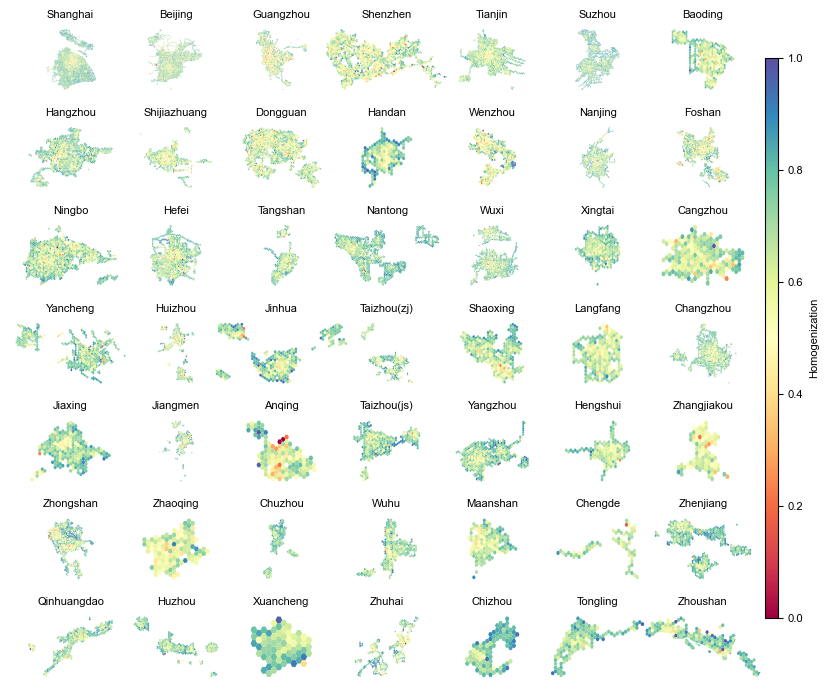

In [25]:

# 创建一个足够大的画布
# 设置默认单位为厘米
mpl.rcParams['figure.figsize'] = [9, 7] 
fig, axes = plt.subplots(7, 7)

norm = plt.Normalize(vmin=0, vmax=1)
# cmap = 'Blues'
cmap = 'Spectral'

savepath = '/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/'
# 为所有城市设置相同的颜色映射

# cl2= ['ZhaoQing', 'ChengDe', 'tongling', 'chizhou', 'ZhangJiaKou', 'anqing', 'LangFang', 'chuzhou', 'xuancheng', 'JiangMen', 'DongGuan', 'changzhou', 'HuiZhou', 'GuangZhou', 'HengShui', 'zhoushan', 'ShiJiaZhuang', 'tayzhou', 'ningbo', 'maanshan', 'wenzhou', 'jiaxing', 'hangzhou', 'beijing', 'Handan', 'nanjing', 'huzhou', 'ZhongShan', 'BaoDing', 'zhenjiang', 'hefei', 'ShenZhen', 'wuhu', 'ZhuHai', 'FoShan', 'nantong', 'yancheng', 'shaoxing', 'wuxi', 'shanghai', 'TianJin', 'jinhua', 'taizhou', 'yangzhou', 'XingTai', 'TangShan', 'CangZhou', 'suzhou', 'QinHuangDao']
cl2 = ['shanghai', 'beijing', 'GuangZhou', 'ShenZhen', 'TianJin', 'suzhou', 'BaoDing', 'hangzhou', 'ShiJiaZhuang', 'DongGuan', 'Handan', 'wenzhou', 'nanjing', 'FoShan', 'ningbo',
        'hefei', 'TangShan', 'nantong', 'wuxi', 'XingTai', 'CangZhou', 'yancheng', 'taizhou', 'HuiZhou', 'jinhua', 'shaoxing', 'LangFang', 'changzhou', 'jiaxing', 'JiangMen', 'anqing', 'tayzhou', 'yangzhou', 'HengShui', 'ZhangJiaKou', 'ZhongShan', 'ZhaoQing', 'chuzhou', 'wuhu', 'maanshan', 'ChengDe', 'zhenjiang', 'QinHuangDao', 'huzhou', 'xuancheng', 'ZhuHai', 'chizhou', 'tongling', 'zhoushan']

cl1 = ['shanghai', 'beijing', 'GuangZhou', 'ShenZhen', 'TianJin', 'suzhou', 'BaoDing', 'hangzhou', 'ShiJiaZhuang', 'DongGuan', 'Handan', 'wenzhou', 'nanjing', 'FoShan', 'ningbo',
        'hefei', 'TangShan', 'nantong', 'wuxi', 'XingTai', 'CangZhou', 'yancheng', 'HuiZhou', 'jinhua', 'shaoxing', 'LangFang', 'changzhou', 'jiaxing', 'JiangMen', 'anqing',  'yangzhou', 'HengShui', 'ZhangJiaKou', 'ZhongShan', 'ZhaoQing', 'chuzhou', 'wuhu', 'maanshan', 'ChengDe', 'zhenjiang', 'QinHuangDao', 'huzhou', 'xuancheng', 'ZhuHai', 'chizhou', 'tongling', 'zhoushan']
cl2 = ['Langfang', 'Baoding', 'Huzhou', 'Hangzhou', 'Tianjin', 'Hefei',
       'Dongguan', 'Shenzhen', 'Yancheng', 'Qinhuangdao', 'Ningbo',
       'Zhoushan', 'Tangshan', 'Changzhou', 'Wuxi', 'Suzhou', 'Guangzhou',
       'Huizhou', 'Maanshan', 'Nanjing', 'Cangzhou', 'Foshan', 'Beijing',
       'Nantong', 'Shanghai', 'Chuzhou', 'Handan', 'Chengde',
       'Zhangjiakou', 'Jinhua', 'Anqing', 'Chizhou', 'Tongling',
       'Zhenjiang', 'Yangzhou', 'Wuhu', 'Xuancheng', 'Zhaoqing',
       'Shijiazhuang', 'Zhongshan', 'Taizhou(JS)', 'Wenzhou', 'Jiangmen',
       'Zhuhai', 'Jiaxing', 'Shaoxing', 'Taizhou(ZJ)', 'Hengshui',
       'Xingtai'
       ]
cl2 = ['Shanghai', 'Beijing', 'Guangzhou', 'Shenzhen', 'Tianjin', 'Suzhou', 'Baoding', 
 'Hangzhou', 'Shijiazhuang', 'Dongguan', 'Handan', 'Wenzhou', 'Nanjing', 'Foshan', 
 'Ningbo', 'Hefei', 'Tangshan', 'Nantong', 'Wuxi', 'Xingtai', 'Cangzhou', 'Yancheng',
   'Huizhou', 'Jinhua', 'Taizhou(ZJ)','Shaoxing', 'Langfang', 'Changzhou', 'Jiaxing', 'Jiangmen', 
   'Anqing','Taizhou(JS)', 'Yangzhou', 'Hengshui', 'Zhangjiakou', 'Zhongshan', 'Zhaoqing', 
   'Chuzhou', 'Wuhu', 'Maanshan', 'Chengde', 'Zhenjiang', 'Qinhuangdao', 'Huzhou', 
   'Xuancheng', 'Zhuhai', 'Chizhou', 'Tongling', 'Zhoushan']

# 遍历每个城市的网格图并将其放置在画布上的适当位置
for i, city in enumerate(cl2):
    # city = city.lower()
    print(city)
    # 计算当前城市应该放置在画布的哪个位置
    row = i // 7  # 行数
    col = i % 7   # 列数
    
    # 读取城市的网格图
    grid_shp_path =  f'output/baidu/V3/results/train/shp/{city}/Hexagon_1000_epoch_300_city_level_homogeneity.shp'
    # Hexagon_1000_epoch_300_city_level_homogeneity
    city_grid = gpd.read_file(grid_shp_path)
    # 1. 裁剪数据到 [0.2, 0.6] 范围
    city_grid['homogeneit_clipped'] = np.clip(city_grid['homogeneit'], 0.2, 0.6)

    # 2. 线性变换到 [0, 1]
    city_grid['homogeneit_scaled'] = (city_grid['homogeneit_clipped'] - 0.2) / (0.6 - 0.2)

    
    # 绘制城市的网格图
    ax = axes[row, col]
    city_grid.plot(ax=ax, linewidth=0, categorical=False, column='homogeneit_scaled', cmap=cmap, edgecolor='grey', alpha=1, legend=False, norm=norm)
    
    # 隐藏坐标轴和边框
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    # 添加城市名称作为子图标题
    ax.set_title(city.capitalize(),fontsize=8)

# # 调整子图布局以留出足够的空间放置色标
plt.subplots_adjust(right=2.5)  # 可根据需要调整 right 的值


cax = fig.add_axes([0.92, 0.11, 0.015, 0.8]) # 色标放置的位置和大小  左、底、宽度和高度
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # 色标必须有一个虚拟的映射数组
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')
cbar.set_label('Homogenization', fontsize=8)  # 设置标签字体大小

# 设置色标刻度的字体大小
cbar.ax.tick_params(labelsize=8)


plt.tight_layout()

# 保存合并后的大图
# plt.savefig(savepath + 'merged_grid_map.png', dpi=300, bbox_inches='tight')
plt.savefig(savepath + 'homogeneization_map_train_city_level1.pdf', dpi=300, bbox_inches='tight')
plt.show()


### loss change figure

保存至 --> /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/loss_change_highlight_1_new.pdf


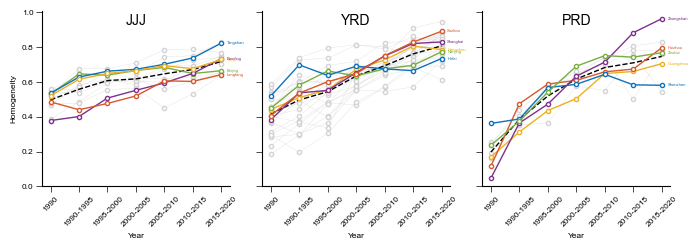

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files

# ---------------------
# 城市分组示例
# ---------------------
city_lists = {
    'JJJ': [
        'Beijing', 'Baoding', 'Cangzhou', 'Chengde', 'Handan',
        'Hengshui', 'Langfang', 'Qinhuangdao', 'Shijiazhuang',
        'Tangshan', 'Tianjin', 'Xingtai', 'Zhangjiakou'
    ],
    'PRD': [
        'Dongguan', 'Foshan', 'Guangzhou', 'Huizhou', 'Jiangmen',
        'Shenzhen', 'Zhaoqing', 'Zhongshan', 'Zhuhai'
    ],
    'YRD': [
        'Anqing', 'Chizhou', 'Hangzhou', 'Huzhou', 'Jinhua',
        'Nanjing', 'Ningbo', 'Shaoxing', 'Taizhou(ZJ)', 'Tongling',
        'Wuhu', 'Xuancheng', 'Yangzhou', 'Zhoushan', 'Changzhou',
        'Chuzhou', 'Hefei', 'Jiaxing', 'Maanshan', 'Nantong',
        'Shanghai', 'Suzhou', 'Taizhou(JS)', 'Wenzhou', 'Wuxi',
        'Yancheng', 'Zhenjiang'
    ]
}

# ---------------------
# 感兴趣的城市示例
# ---------------------
interesting_cities = {
    'JJJ': ['Beijing', 'Tianjin', 'Tangshan', 'Baoding', 'Langfang'],
    'PRD': ['Guangzhou', 'Huizhou', 'Shenzhen', 'Zhongshan', 'Zhuhai'],
    'YRD': ['Hefei', 'Nanjing','Shanghai','Hangzhou','Suzhou']
}
interesting_cities_2 = {
    'JJJ': ['Cangzhou',  'Handan', 'Qinhuangdao','Shijiazhuang','Xingtai'],
    'PRD': ['Foshan', 'Jiangmen'],
    'YRD': ['Wuhu',  'Ningbo','Jinhua','Taizhou(JS)','Zhenjiang' ]
}
interesting_cities_3 = {
    'JJJ': ['Hengshui', 'Zhangjiakou', 'Chengde'],
    'PRD': ['Dongguan','Zhaoqing'],
    'YRD': ['Chizhou', 'Yangzhou','Xuancheng','Huzhou','Shaoxing']
}

    # # my_cities = ['Cangzhou',  'Handan', 'Qinhuangdao','Shijiazhuang','Xingtai',] # 'Hengshui', 'Zhangjiakou'  'Chengde',JJJ 子图分布
    # # my_cities = [ 'Foshan', 'Jiangmen', ]  # 'Dongguan','Zhaoqing',
    # my_cities = [ 'Chizhou', 'Yangzhou','Xuancheng','Huzhou','Shaoxing']  # 'Wuhu',  'Ningbo','Jinhua','Taizhou','Zhenjiang' 

def format_year_labels(years):
    """
    将年份列表格式化为指定形式，如 ['1990', '1995_1990'] -> ['1990', '1990-1995']。
    对于包含下划线的年份，将其转换为 "end-start" 的格式。
    """
    formatted = []
    for year in years:
        if "_" in year:
            start, end = year.split("_")
            formatted.append(f"{end}-{start}")
        else:
            formatted.append(year)
    return formatted

def plot_metric_across_regions(csv_file, 
                               interesting_cities,
                               metric="mean",
                               save_fig=False,
                               out_path=None,
                               fontsize=12,
                               fig_size=(21,7),
                               offset_labels=True,
                               norm_flag=False):
    """
    在同一图中为 JJJ, PRD, YRD 三个子图绘制折线图，并在每个子图中增加一条平均线。
    
    参数说明：
    - csv_file: 数据 CSV 文件路径。
    - interesting_cities: 感兴趣城市列表（分区域）。
    - metric: 使用的指标名称。
    - save_fig: 是否保存图像。
    - out_path: 保存图像的路径。
    - fontsize: 字体大小。
    - fig_size: 图像尺寸 (宽, 高)。
    - offset_labels: 是否对 x 轴标签进行上下错位（防止拥挤）。
    - norm_flag: 如果为 True，则对 y 轴数值进行归一化展示，
                 归一化方式为全局 min–max 归一化并反转（即：归一化值 = (global_max - value) / (global_max - global_min)）。
    """
    if not os.path.exists(csv_file):
        print(f"Data file not found: {csv_file}")
        return

    # 读取数据
    data = pd.read_csv(csv_file)
    data.loc[(data["NAME_1"] == "Jiangsu") & (data["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(JS)"
    data.loc[(data["NAME_1"] == "Zhejiang") & (data["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(ZJ)"
        
    # 如果需要归一化，计算全局的最小值和最大值
    if norm_flag:
        # global_min = data[metric].min()
        # global_max = data[metric].max()
        # print(f"y range {global_min} ~ {global_max}")
        global_min = 4.16
        global_max = 4.33
        denominator = global_max - global_min
        if denominator == 0:
            denominator = 1  # 避免除以零

    # 创建 1x3 子图
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=fig_size, sharey=True)
    regions = ["JJJ", "YRD", "PRD"]
    
    plt.rcParams.update({'font.size': fontsize})
    
    # 定义 5 个颜色
    color_list = ["#1072BD", "#77AE43", "#EDB021", "#D7592C", "#7F318D"]
    
    for i, region in enumerate(regions):
        ax = axes[i]
        
        # 隐藏上/右边框
        for spine in ["top", "right"]:
            ax.spines[spine].set_visible(False)
        
        # 在坐标轴内部显示区域标题
        ax.text(0.5, 0.98, region, fontsize=fontsize+3,
                transform=ax.transAxes, ha='center', va='top')
        

        
        # 筛选对应区域数据
        region_cities = city_lists[region]
        df_region = data[data["NAME_2"].isin(region_cities)]
        if df_region.empty:
            ax.text(0.5, 0.5, f"No data for {region}",
                    ha='center', va='center', fontsize=fontsize, color='red')
            continue
        
        # 按 1990 年 metric 排序感兴趣城市并分配颜色
        city_color_map = {}
        df_region_1990 = df_region[df_region["year"] == '1990']
        if region in interesting_cities:
            city_1990_means = []
            for city in interesting_cities[region]:
                df_city_1990 = df_region_1990[df_region_1990["NAME_2"] == city]
                val = df_city_1990[metric].values[0] if not df_city_1990.empty else np.nan
                city_1990_means.append((city, val))
            city_1990_means.sort(key=lambda x: x[1])
            for idx, (city, val) in enumerate(city_1990_means):
                city_color_map[city] = color_list[idx] if idx < len(color_list) else "red"
        
        # 对年份排序，便于 x 轴绘图
        unique_years = sorted(df_region["year"].unique())
        year_to_index = {y: idx for idx, y in enumerate(unique_years)}
        grouped = df_region.groupby("NAME_2")
        
        # 绘制非感兴趣城市的灰色细线
        for city in region_cities:
            if city not in grouped.groups:
                continue
            df_city = grouped.get_group(city).sort_values(by="year")
            x_vals = df_city["year"].map(year_to_index).values
            if norm_flag:
                y_vals = (global_max - df_city[metric].values) / denominator
            else:
                y_vals = df_city[metric].values

            if city not in interesting_cities.get(region, []):
                ax.plot(x_vals, y_vals, color="lightgray", linewidth=0.2,
                        marker="o", markerfacecolor="white",
                        markeredgecolor="lightgray", markersize=3)
        
        # 计算每个年份的平均值（考虑所有城市的值）
        avg_metric_series = df_region.groupby("year")[metric].mean().reindex(unique_years)
        if norm_flag:
            avg_y_vals = (global_max - avg_metric_series.values) / denominator
        else:
            avg_y_vals = avg_metric_series.values
        # 绘制平均线，采用黑色虚线，线宽稍粗
        ax.plot(range(len(unique_years)), avg_y_vals, color='black', linewidth=1, linestyle='--')
        

        # 绘制感兴趣城市的彩色粗线
        for city in region_cities:
            if city not in grouped.groups:
                continue
            df_city = grouped.get_group(city).sort_values(by="year")
            x_vals = df_city["year"].map(year_to_index).values
            if norm_flag:
                y_vals = (global_max - df_city[metric].values) / denominator
            else:
                y_vals = df_city[metric].values

            if city in interesting_cities.get(region, []):
                color = city_color_map.get(city, "red")
                lw = 1
                ax.plot(x_vals, y_vals, color=color, linewidth=lw,
                        marker="o", markerfacecolor="white",
                        markeredgecolor=color, markersize=3)
                # 在折线终点处标注城市名称
                ax.text(x_vals[-1] + 0.2, y_vals[-1], city, fontsize=fontsize-4,
                        color=color, va='center')
        

        # 设置 x 轴刻度与标签（保证旋转 45°）
        formatted_years = format_year_labels(unique_years)
        ax.set_xticks(range(len(unique_years)))
        ax.set_xticklabels(formatted_years, ha='center', rotation=45)
        ax.set_yticks(np.arange(0.0, 1.1, 0.2))  # 设置y轴刻度从0.0到1.0，步长0.2
        # 明确设置刻度线参数，确保显示
        ax.tick_params(axis='x', which='major', length=4, width=0.5, color='black', direction='out', pad=2, labelsize=fontsize-1)
        ax.tick_params(axis='y', which='major', length=4, width=0.5, color='black', direction='out', pad=2, labelsize=fontsize-1)

        # 设置坐标轴标签
        ax.set_xlabel("Year", fontsize=fontsize-1)
        if i == 0:
            ylabel = 'Homogeneity'
            ax.set_ylabel(ylabel, fontsize=fontsize-1)
        
        ax.grid(False)
    
    plt.tight_layout()

    if save_fig and out_path:
        os.makedirs(os.path.dirname(out_path), exist_ok=True)
        plt.savefig(out_path, dpi=600, format='pdf')
        print(f"保存至 --> {out_path}")
    plt.show()

def main(save_fig=False, out_path=None, fontsize=12, fig_size=(21,7), city_group=1, offset_labels=True, norm_flag=False):
    """
    主函数
      - norm_flag: 如果为 True，则对 y 轴数值进行归一化展示（否则显示原始值）
    """
    root = '/home/liyong/code/CityHomogeneity/'
    csv_file = os.path.join(root, "output/baidu/V3/results/statistics/allcity_expand_train_loss_metric_NAME_2_new.csv")
    if city_group == 2:
        cities = interesting_cities_2
    elif city_group == 3:
        cities = interesting_cities_3
    else :
        cities = interesting_cities
    plot_metric_across_regions(
        csv_file=csv_file,
        interesting_cities=cities,
        metric="mean",
        save_fig=save_fig,
        out_path=out_path,
        fontsize=fontsize,
        fig_size=fig_size,
        offset_labels=offset_labels,
        norm_flag=norm_flag
    )

if __name__ == "__main__":
    # 若需要保存图表，请设置 save_fig=True 并提供 out_path
    city_group = 1
    pdf_path = f"/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/loss_change_highlight_{city_group}_new.pdf"
    
    main(
        save_fig=True,          # 保存图表
        out_path=pdf_path,
        fontsize=7,
        fig_size=(7, 2.5),        # 调整画布宽高
        city_group = city_group,  # 1代表主图分组 2 和3代表子图分组
        offset_labels=True,       # 是否开启 X 轴标签上下错位（目前注释掉）
        norm_flag=True            # 如果为 True，则对 y 轴数据进行归一化展示
    )


### Violin Plot + Box Plot + Scatter Plot

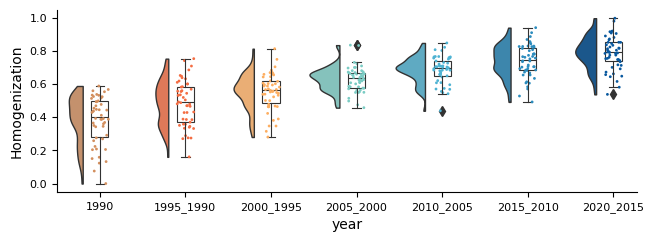

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt  # RainCloud Plot 库
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files
# 读取 CSV 文件
file_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/allcity_expand_train_loss_metric_NAME_2_new.csv"  # 请替换为你的 CSV 文件路径
df = pd.read_csv(file_path)

# 归一化 mean 值
scaler = MinMaxScaler()
df["normalized_mean"] = scaler.fit_transform(df[["mean"]])
df["homogenity"] = 1- df["normalized_mean"]


fig, ax = plt.subplots(figsize=(19/2.54,6/2.54))
custom_colors = [
    "#f0f9e8",
    "#ccebc5",
    "#a8ddb5",
    "#7bccc4",
    "#4eb3d3",
    "#2b8cbe",
    "#08589e"
]
custom_colors2 = [
    "#D38F5E",
    "#f46d43",
    "#fdae61",
    "#7bccc4",
    "#4eb3d3",
    "#2b8cbe",
    "#08589e"
]
# RainCloud Plot：一条命令就集成了半小提琴、箱线、散点/抖动点
pt.RainCloud(
    x="year",           # x 轴分组
    y="homogenity",     # y 轴数值
    data=df, 
    palette=custom_colors2,     # 颜色风格
    bw=0.3,             # 核密度估计带宽
    width_viol=0.7,     # 小提琴宽度
    pointplot=False,     # 是否叠加散点/均值
    move=0,           # 调整半小提琴左右偏移
    ax=ax,
    orient="v",
    linecolor = '#0B87BA',
    point_size = 2,
    width_box = .2
    # offset=0.1
)

ax.grid(False)  # 关闭网格线

# ② **去掉四周外框**
ax.spines['top'].set_visible(False)     # 去掉顶部边框
ax.spines['right'].set_visible(False)   # 去掉右侧边框
# ax.spines['left'].set_visible(False)    # 去掉左侧边框
# ax.spines['bottom'].set_visible(False)  # 去掉底部边框（可选）
ax.spines["bottom"].set_color("black")  # X 轴底部边框变成红色
ax.spines["left"].set_color("black")   # Y 轴左侧边框变成蓝色




# ③ **设置坐标轴标签**
ax.set_ylabel("Homogenization")  
ax.tick_params(axis="x", labelsize=8)  # X 轴刻度字体大小
ax.tick_params(axis="y", labelsize=8)  # Y 轴刻度字体大小
ax.yaxis.set_ticks_position("left")  # 确保 Y 轴刻度在线的左侧可见
ax.xaxis.set_ticks_position("bottom")  # 让 X 轴的刻度出现在底部


# ④ **调整 X 轴刻度角度**
plt.xticks(rotation=0)  # 让刻度水平（0度）

plt.savefig("/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/Violin.pdf", format="pdf")

plt.show()

### Statistical Test: Pairwise p-values for Homogeneity Index Between Time Periods

- Data type: The boxplots show the distribution of the homogeneity index for each time period (e.g., median, IQR, outliers), indicating that each period contains multiple observations (such as different cities or grids).
- Hypothesis: Test whether there are significant differences in the homogeneity index between different time periods (e.g., 1990-1995 vs. 1995-2000, 2000-2005 vs. 2005-2010, etc.).
- Goal: Calculate pairwise p-values between time periods to determine if the differences are statistically significant.

In [4]:
import pandas as pd
import scipy.stats as stats

# 假设 df 已经在前面定义并包含列: 'year' 和 'homogenity'
# 我们只比较相邻的年份（或时间段），计算 p 值，并计算 'delta'（这里用 median_delta / mean_delta 表示），
# 然后计算这些 'delta' 值之间的相邻差异。

years = sorted(df['year'].unique())
results = []

for i in range(len(years) - 1):
    y1 = years[i]
    y2 = years[i + 1]

    group1 = df.loc[df['year'] == y1, 'homogenity'].dropna()
    group2 = df.loc[df['year'] == y2, 'homogenity'].dropna()

    if len(group1) == 0 or len(group2) == 0:
        # 跳过空组
        continue

    # Mann-Whitney U 检验（非参数）
    u_stat, p_val = stats.mannwhitneyu(group1, group2, alternative='two-sided')

    # 这里把 'delta' 表示为相邻两组的中位数差 (median_delta) 和均值差 (mean_delta)
    median_delta = group2.median() - group1.median()
    mean_delta = group2.mean() - group1.mean()

    results.append({'year1': y1, 'year2': y2, 'p': p_val, 'median_delta': median_delta, 'mean_delta': mean_delta})

# 汇总为 DataFrame
res_df = pd.DataFrame(results)

# 计算 'delta'（这里以 median_delta 为主）的相邻差异：即相邻相邻对之间的差值
if not res_df.empty:
    res_df = res_df.reset_index(drop=True)
    res_df['median_delta_adj'] = res_df['median_delta'].diff()
    res_df['mean_delta_adj'] = res_df['mean_delta'].diff()

# 打印或显示结果
print(res_df.to_string(index=False))


    year1     year2        p  median_delta  mean_delta  median_delta_adj  mean_delta_adj
     1990 1995_1990 0.001431      0.087980    0.105318               NaN             NaN
1995_1990 2000_1995 0.012214      0.074429    0.067087         -0.013551       -0.038231
2000_1995 2005_2000 0.000200      0.074677    0.076468          0.000248        0.009381
2005_2000 2010_2005 0.000118      0.056771    0.056046         -0.017906       -0.020422
2010_2005 2015_2010 0.004000      0.050617    0.053289         -0.006154       -0.002757
2015_2010 2020_2015 0.019260      0.046111    0.049013         -0.004506       -0.004276


In [34]:
import pandas as pd
import scipy.stats as stats
from itertools import combinations

# 你的 DataFrame (示例)
# df = pd.read_csv("your_data.csv")

# 获取所有年份分组
years = df["year"].unique()

# 计算两两比较的 p 值
p_values = {}

for year1, year2 in combinations(years, 2):  # 遍历所有两两组合
    group1 = df[df["year"] == year1]["homogenity"]
    group2 = df[df["year"] == year2]["homogenity"]
    
    # 选用独立样本 t 检验（适用于正态分布数据）
    t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
    
    # 如果数据是非正态的，用 Mann-Whitney U 检验
    # u_stat, p_val = stats.mannwhitneyu(group1, group2, alternative="two-sided")
    
    p_values[(year1, year2)] = p_val

# 输出 p 值结果
for (y1, y2), p in p_values.items():
    print(f"P-value ({y1} vs {y2}): {p:.4f}")



P-value (1990 vs 1995_1990): 0.0003
P-value (1990 vs 2000_1995): 0.0000
P-value (1990 vs 2005_2000): 0.0000
P-value (1990 vs 2010_2005): 0.0000
P-value (1990 vs 2015_2010): 0.0000
P-value (1990 vs 2020_2015): 0.0000
P-value (1995_1990 vs 2000_1995): 0.0083
P-value (1995_1990 vs 2005_2000): 0.0000
P-value (1995_1990 vs 2010_2005): 0.0000
P-value (1995_1990 vs 2015_2010): 0.0000
P-value (1995_1990 vs 2020_2015): 0.0000
P-value (2000_1995 vs 2005_2000): 0.0001
P-value (2000_1995 vs 2010_2005): 0.0000
P-value (2000_1995 vs 2015_2010): 0.0000
P-value (2000_1995 vs 2020_2015): 0.0000
P-value (2005_2000 vs 2010_2005): 0.0005
P-value (2005_2000 vs 2015_2010): 0.0000
P-value (2005_2000 vs 2020_2015): 0.0000
P-value (2010_2005 vs 2015_2010): 0.0040
P-value (2010_2005 vs 2020_2015): 0.0000
P-value (2015_2010 vs 2020_2015): 0.0150


### distribute fig

{'Anqing': 0.4503640967745967, 'Baoding': 0.44981661906132286, 'Beijing': 0.4691294528185402, 'Cangzhou': 0.460706464090987, 'Changzhou': 0.47643602843117205, 'Chengde': 0.4593942599493687, 'Chizhou': 0.4955532791898798, 'Chuzhou': 0.4920805304493481, 'Dongguan': 0.45198894158074465, 'Foshan': 0.4541209542332224, 'Guangzhou': 0.43928147269311246, 'Handan': 0.46660118463700395, 'Hangzhou': 0.4757146507170474, 'Hefei': 0.4716049162037591, 'Hengshui': 0.46108357926744986, 'Huizhou': 0.4546707532032257, 'Huzhou': 0.4833324944208895, 'Jiangmen': 0.46522869790344323, 'Jiaxing': 0.4784162825262034, 'Jinhua': 0.4751803159948825, 'Langfang': 0.4538620603688983, 'Maanshan': 0.4699035764824518, 'Nanjing': 0.47412953819481485, 'Nantong': 0.49480418398079895, 'Ningbo': 0.46518712795599454, 'Qinhuangdao': 0.4781506122080615, 'Shanghai': 0.48448682415841793, 'Shaoxing': 0.4639262669385497, 'Shenzhen': 0.4499056336306293, 'Shijiazhuang': 0.4544597495751142, 'Suzhou': 0.49436277842610843, 'Taizhou(JS)'

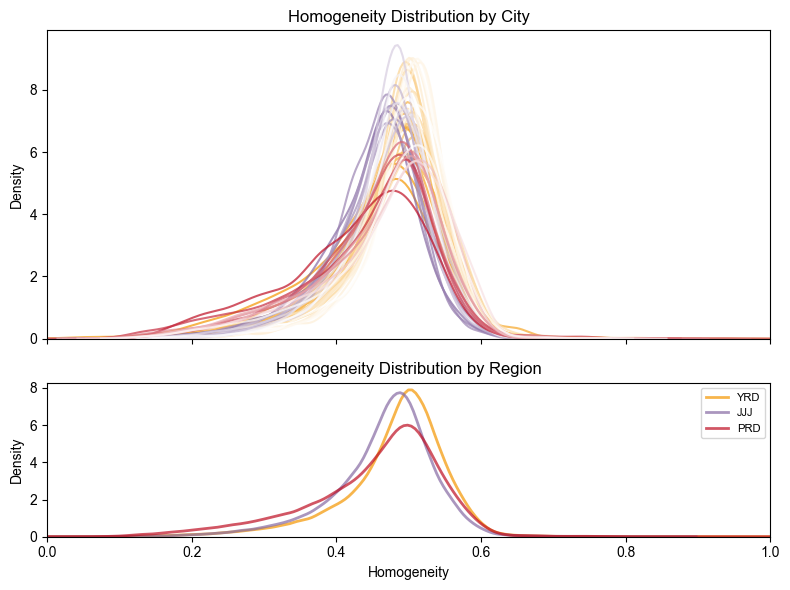

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb, to_hex
import numpy as np
import matplotlib.font_manager as fm
arial_font_path = "/home/liyong/code/CityHomogeneity/fronts/ARIAL.TTF"

# 添加 Arial 到 Matplotlib 字体库
fm.fontManager.addfont(arial_font_path)

# 设置全局字体为 Arial
plt.rcParams['font.family'] = 'Arial'

plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files

# 定义 lighten 函数
def lighten(color, amount):
    """Lighten a color by a given amount (0 to 1)."""
    color = np.array(to_rgb(color))
    white = np.array([1, 1, 1])
    return to_hex(color + (white - color) * (1 - amount))

# 读取数据
df = pd.read_pickle("/home/liyong/code/CityHomogeneity/output/baidu/V3/train_loss_feature_allcity_300ep_homogeneity.pkl")
df = df[df["homogeneity"] < 1.0]

# 定义城市群
JJJ13 = ['langfang', 'qinhuangdao', 'xingtai', 'tianjin', 'shijiazhuang', 'hengshui', 'tangshan', 'baoding', 'chengde', 'beijing', 'handan', 'zhangjiakou', 'cangzhou']
YRD27 = ['wuxi', 'hangzhou', 'ningbo', 'hefei', 'Taizhou(JS)', 'huzhou', 'wuhu', 'anqing', 'tongling', 'chuzhou', 'shanghai', 'yangzhou', 'suzhou', 'chizhou', 'jinhua', 'zhenjiang', 'nantong', 'maanshan', 'jiaxing', 'Taizhou(ZJ)', 'wenzhou', 'yancheng', 'shaoxing', 'zhoushan', 'changzhou', 'nanjing', 'xuancheng']

PRD9 = ['guangzhou', 'zhaoqing', 'huizhou', 'dongguan', 'foshan', 'shenzhen', 'zhongshan', 'jiangmen', 'zhuhai']

# 添加城市群标签
df["region"] = df["city"].str.lower().apply(
    lambda x: "YRD" if x in [city.lower() for city in YRD27] else
              ("JJJ" if x in [city.lower() for city in JJJ13] else
               ("PRD" if x in [city.lower() for city in PRD9] else "Other"))
)

# 定义城市群颜色
region_colors = {
    'JJJ': '#866AA3',  # 紫色
    'PRD': '#BE0E23',  # 红色
    'YRD': '#F49600'   # 橙色
}

# 计算每个城市的 homogeneity 均值并排序
regions = {"YRD": YRD27, "JJJ": JJJ13, "PRD": PRD9}
city_means = df.groupby("city")["homogeneity"].mean().to_dict()
print(city_means)
# 创建子图（2 行 1 列）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# 子图 1：每个城市一条 KDE 折线
for region, cities in regions.items():
    # 按均值排序城市（均值从小到大，颜色从浅到深）
    sorted_cities = sorted(cities, key=lambda x: city_means[x[0].upper() + x[1:]])

    # 生成颜色渐变（从浅到深）
    base_color = to_rgb(region_colors[region])
    colors = [lighten(base_color, 1 - i / (len(sorted_cities) - 1)) if len(sorted_cities) > 1 else base_color
              for i in range(len(sorted_cities))]

    # 为每个城市绘制 KDE 曲线（浅色先绘制）
    for i, city in enumerate(sorted_cities):
        city_data = df[df["city"].str.lower() == city.lower()]["homogeneity"]
        sns.kdeplot(
            data=city_data,
            label=f"{region}: {city.capitalize()}",
            color=to_hex(colors[i]),
            alpha=0.7,
            linewidth=1.5,
            ax=ax1
        )

ax1.set_title("Homogeneity Distribution by City")
ax1.set_ylabel("Density")
ax1.grid(False)

# 子图 2：每个城市群一条 KDE 折线
for region in regions.keys():
    region_data = df[df["region"] == region]["homogeneity"]
    sns.kdeplot(
        data=region_data,
        label=region,
        color=region_colors[region],
        alpha=0.7,
        linewidth=2,
        ax=ax2
    )

ax2.set_title("Homogeneity Distribution by Region")
ax2.set_xlabel("Homogeneity")
ax2.set_ylabel("Density")
ax2.set_xlim(0, 1.0)  # 设置 X 轴范围为 0 到 1.0
ax2.grid(False)
ax2.legend(fontsize=8)

plt.tight_layout()
plt.show()

## Fig3 

- fig, ax = plt.subplots(figsize=(7.09, 6.69))  # 图表尺寸最大为 180mm x 170mm
- mm / 26.4 = matplotlib size 

          NAME_2  true_y_1990  true_y_1995  true_y_2000  true_y_2005  \
0         Anqing    -3.290020    -3.268874    -3.248236    -3.250449   
1        Baoding    -3.265630    -3.261703    -3.243664    -3.236114   
2        Beijing    -3.239936    -3.220110    -3.221285    -3.216725   
3       Cangzhou    -3.238621    -3.238382    -3.227429    -3.228050   
4      Changzhou    -3.257598    -3.248607    -3.240263    -3.232028   
5        Chengde    -3.235446    -3.222296    -3.218210    -3.225273   
6        Chizhou    -3.237983    -3.234918    -3.249424    -3.219778   
7        Chuzhou    -3.230035    -3.204295    -3.194923    -3.191567   
8       Dongguan    -3.286937    -3.261216    -3.234151    -3.221883   
9         Foshan    -3.289363    -3.254994    -3.233355    -3.218676   
10     Guangzhou    -3.301208    -3.276810    -3.255825    -3.244209   
11        Handan    -3.234555    -3.235271    -3.225188    -3.227030   
12      Hangzhou    -3.254890    -3.243143    -3.235662    -3.21

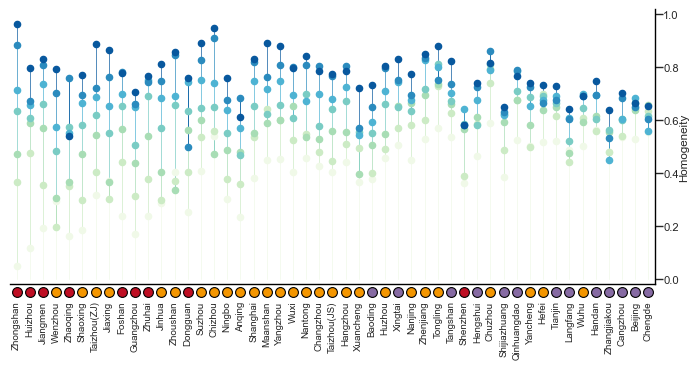

In [14]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

import matplotlib.font_manager as fm
arial_font_path = "/home/liyong/code/CityHomogeneity/fronts/ARIAL.TTF"
# 添加 Arial 到 Matplotlib 字体库
fm.fontManager.addfont(arial_font_path)
# 设置全局字体为 Arial
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files

# ========== 数据加载与预处理部分 ==========

def load_excel_data(excel_path, year):
    """
    根据文件类型（CSV 或 Excel）加载数据，并筛选包含指定年份的记录。
    """
    if not Path(excel_path).exists():
        raise FileNotFoundError(f"文件不存在: {excel_path}")

    ext = Path(excel_path).suffix.lower()

    if ext == '.csv':
        df = pd.read_csv(excel_path)
        df['year_clean'] = df['year'].astype(str).str[:4]
        df = df[df['year_clean'] == str(year)]
    elif ext in ['.xlsx', '.xls']:
        excel_data = pd.ExcelFile(excel_path)
        relevant_sheets = [sheet for sheet in excel_data.sheet_names if str(year) in sheet]

        if not relevant_sheets:
            print(f"警告: 未找到包含年份 {year} 的表格。")
            return pd.DataFrame()

        all_data = [
            pd.read_excel(excel_path, sheet_name=sheet).dropna(subset=['loss_mean'])
            for sheet in relevant_sheets
        ]
        df = pd.concat(all_data, ignore_index=True) if all_data else pd.DataFrame()
    else:
        raise ValueError("不支持的文件格式，仅支持 .csv 和 .xlsx")

    if not df.empty:
        # 特殊处理 Taizhou 的城市名
        df.loc[(df["NAME_1"] == "Jiangsu") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(JS)"
        df.loc[(df["NAME_1"] == "Zhejiang") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(ZJ)"
    
    return df


def calculate_group_mean(df, group_column='NAME_1', target_column='loss_mean'):
    """
    按照 group_column 分组，计算 target_column 的均值，并返回新的 DataFrame。
    """
    return df.groupby(group_column)[target_column].mean().reset_index()


def load_all_years_data(excel_path, years, group_column, target_column):
    """
    预先加载一系列年份的数据，每个年份都做分组均值，存储到字典 {year: grouped_df}。
    如果某年的数据缺失或不完整，则跳过。
    """
    all_data = {}
    for year in years:
        df = load_excel_data(excel_path, year)
        if not df.empty and {group_column, target_column}.issubset(df.columns):
            grouped_df = calculate_group_mean(df, group_column, target_column)
            # 转换为 true_y = 1 - loss_mean
            grouped_df[target_column] = 1 - grouped_df[target_column]
            all_data[year] = grouped_df
        else:
            print(f"警告: {year} 年份数据缺失或不完整，跳过。")
    return all_data


# ========== 绘图函数 ==========

def plot_loss_comparison_optimized(
    excel_path,
    years,
    sort_by='1990',  # 新增参数，默认为按 1990 排序
    group_column='NAME_1',
    target_column='loss_mean',
    city_lists={},
    region_colors={},
    save_plot=False,
    plot_save_dir='',
    plot_filename='',
    fig_size=(10, 6),
    base_font_size=12
):
    """
    根据 sort_by 参数排序并绘制散点图。
    - 如果 sort_by 是年份字符串，则按该年份的 true_y (1 - loss_mean) 排序。
    - 如果 sort_by 是 'diff'，则按 (2018_2015 - 1990) 的差值排序。
    """

    # ---------- 1) 确定城市排序 ----------
    if sort_by == 'diff':
        # 按 2018_2015 - 1990 的差值排序
        df_1990 = load_excel_data(excel_path, '1990')
        df_2018_2015 = load_excel_data(excel_path, '2018_2015')

        if df_1990.empty or df_2018_2015.empty or group_column not in df_1990.columns or group_column not in df_2018_2015.columns:
            raise ValueError("1990 或 2018_2015 年份数据不存在，或缺少必要列，无法进行差值排序。")

        # 计算分组均值
        # group_means_1990 = calculate_group_mean(df_1990, group_column, target_column)
        # group_means_2018_2015 = calculate_group_mean(df_2018_2015, group_column, target_column)

        # 计算 true_y = 1 - loss_mean
        group_means_1990["true_y"] = 1 - group_means_1990[target_column]
        group_means_2018_2015["true_y"] = 1 - group_means_2018_2015[target_column]

        # 合并并计算差值
        merged_df = pd.merge(
            group_means_1990[[group_column, "true_y"]],
            group_means_2018_2015[[group_column, "true_y"]],
            on=group_column,
            suffixes=("_1990", "_2018_2015")
        )
        merged_df["diff"] = merged_df["true_y_2018_2015"] - merged_df["true_y_1990"]

        # 按差值降序排序
        sorted_cities_custom = list(
            merged_df.sort_values(by="diff", ascending=False)[group_column]
        )
        print(sorted_cities_custom)
    elif sort_by == 'len':

        # 设置年份列表
        years = ["1990", "1995", "2000", "2005", "2010", "2015", "2020"]

        # 读取 CSV 文件
        df = pd.read_csv(excel_path)

        # 取前4位作为实际年份
        df['year_clean'] = df['year'].astype(str).str[:4]

        # 处理 Taizhou 特殊命名
        df.loc[(df["NAME_1"] == "Jiangsu") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(JS)"
        df.loc[(df["NAME_1"] == "Zhejiang") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(ZJ)"

        # 设置城市名为分组键
        group_column = "NAME_2"       # 用城市名分组
        target_column = "mean"        # 要转换的列

        # 存储每年计算结果
        group_means_dict = {}

        for year in years:
            df_year = df[df['year_clean'] == year]

            if df_year.empty or group_column not in df_year.columns:
                raise ValueError(f"{year} 年份数据不存在，或缺少必要列，无法进行计算。")

            # 分组求均值
            group_means = df_year.groupby(group_column)[target_column].mean().reset_index()

            # 计算表现指标：true_y = 1 - mean
            group_means["true_y"] = 1 - group_means[target_column]

            # 存入字典
            group_means_dict[year] = group_means[[group_column, "true_y"]]

        # 合并多个年份数据
        merged_df = group_means_dict[years[0]].rename(columns={"true_y": f"true_y_{years[0]}"})

        for year in years[1:]:
            merged_df = pd.merge(
                merged_df,
                group_means_dict[year].rename(columns={"true_y": f"true_y_{year}"}),
                on=group_column,
                how="outer"
            )
        print(merged_df)
        # 计算波动范围
        true_y_columns = [f"true_y_{year}" for year in years]
        merged_df["max_true_y"] = merged_df[true_y_columns].max(axis=1)
        merged_df["min_true_y"] = merged_df[true_y_columns].min(axis=1)
        merged_df["range_diff"] = merged_df["max_true_y"] - merged_df["min_true_y"]

        # 排序输出城市名列表
        sorted_cities_custom = list(
            merged_df.sort_values(by="range_diff", ascending=False)[group_column]
        )

        # 输出
        print("排序后的城市名（NAME_2）：")
        print(sorted_cities_custom)

    # else:
    #     # 按指定年份排序
    #     df_sorting_year = load_excel_data(excel_path, sort_by)
    #     if df_sorting_year.empty or group_column not in df_sorting_year.columns:
    #         raise ValueError(f"{sort_by} 年份数据不存在，或缺少必要列，无法进行排序。")

    #     group_means_sorting_year = calculate_group_mean(df_sorting_year, group_column, target_column)
    #     group_means_sorting_year["true_y"] = 1 - group_means_sorting_year[target_column]
    #     # 按 true_y 降序排序
    #     sorted_cities_custom = list(
    #         group_means_sorting_year.sort_values(by="true_y", ascending=False)[group_column]
    #     )

    city_to_xpos = {city: i for i, city in enumerate(sorted_cities_custom)}

    # ---------- 2) 预加载所有年份的数据 ----------
    all_data = load_all_years_data(excel_path, years, group_column, target_column)

    # ---------- 3) 统一计算全局归一化参数 ----------
    global_y_max = 1 - 4.16
    global_y_min = 1 - 4.33
    print(f'y range :{global_y_min} ~ {global_y_max}')

    # ---------- 4) 设置画布并绘图 ----------
    sns.set(style="whitegrid", font_scale=base_font_size / 12)
    fig, ax = plt.subplots(figsize=fig_size)

    # cmap = plt.get_cmap('coolwarm').reversed()
    # Define the custom color list
    colors = ['#f0f9e8', '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e']
    # colors = ['#08589e', '#2b8cbe', '#4eb3d3', '#7bccc4', '#a8ddb5', '#ccebc5','#f0f9e8']
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

    # Use the custom colormap in your plot
    # Replace 'plt.get_cmap('coolwarm').reversed()' with the custom_cmap
    cmap = custom_cmap

    df_pre_year = pd.DataFrame(index=range(49),columns=['normalized_y'])
    df_pre_year['normalized_y'] = 0
    for idx, year in enumerate(years):
        if year not in all_data:
            continue
    
        df_year = all_data[year].copy()
        print(len(df_year))
        all_cities = city_lists['JJJ'] + city_lists['PRD'] + city_lists['YRD']
        df_year = df_year[df_year[group_column].isin(all_cities)]
        df_year['x'] = df_year[group_column].map(city_to_xpos)
        df_year = df_year.dropna(subset=['x'])
        # 归一化
        df_year['normalized_y'] = (df_year[target_column] - global_y_min) / (global_y_max - global_y_min)


        ax.scatter(
            df_year['x'],
            df_year['normalized_y'],
            color=cmap(idx / (len(years) - 1)),
            s=20,
            zorder=5,
            alpha=1,
            label=year
        )
        
        for index, row in df_year.iterrows():
            
            ax.plot(
                [row['x'], row['x']],
                [df_pre_year.loc[index, 'normalized_y'], row['normalized_y']],  # 使用 .loc 访问
                color=cmap(idx / (len(years) - 1)),
                linewidth=0.7,
                alpha=0.7,
                zorder=4
            )
        df_pre_year['normalized_y'] = df_year['normalized_y']
           

    # ---------- 5) 美化 y 轴 ----------
    ax.set_ylabel("Homogeneity", fontsize=base_font_size * 1.2, labelpad=0)
    ax.tick_params(axis='y', pad=0)
    ax.set_ylim(-0.02, 1.02)

    # ---------- 6) 在 x 轴下方添加小矩形区域标识及城市名称 ----------
    ax.set_xticks(range(len(sorted_cities_custom)))
    ax.set_xticklabels([])

    y_min, y_max = ax.get_ylim()
    y_range = y_max - y_min
    rect_width = 0.4
    rect_height = y_range * 0.03
    print(y_range)


    for city, xpos in city_to_xpos.items():
        region = next((key for key, cities in city_lists.items() if city in cities), None)
        color = region_colors.get(region, "gray")

        # ax.add_patch(Rectangle(
        #     (xpos - rect_width / 2, y_min - rect_height),
        #     rect_width,
        #     rect_height * 0.8,
        #     color=color,
        #     alpha=0.8,
        #     transform=ax.transData,
        #     clip_on=False
        # ))

        # ax.scatter(xpos , y_min - rect_height, s=50, c='white', edgecolors=color, linewidth=1, alpha=1, zorder=2,clip_on=False)

        # 绘制内部彩色点
        ax.scatter(xpos , y_min - rect_height, s=50, c=color, edgecolors='black', linewidth=0.8, alpha=1, zorder=3,clip_on=False)

        ax.text(
            xpos,
            y_min - rect_height - y_range * 0.03,
            city,
            ha="center",
            va="top",
            fontsize=base_font_size,
            rotation=90,
            transform=ax.transData, zorder=6
        )

    ax.set_xlim(-0.5, len(sorted_cities_custom) - 0.5)
    ax.grid(True, axis='x', linestyle='--', linewidth=0.5)
    ax.grid(False, axis='y')
    
    # ---------- 7) 图例 ----------
    formatted_years = []
    for year in years:
        if '_' in year:
            start, end = year.split('_')
            formatted_years.append(f"{end}-{start}")
        else:
            formatted_years.append(year)
    formatted_years_sorted = sorted(
        formatted_years,
        key=lambda x: int(x.split('-')[0]) if '-' in x else int(x),
        reverse=True
    )

    region_patches = [Patch(color=color, label=region) for region, color in region_colors.items()]
    period_patches = [
        Line2D([0], [0],
               marker='o', color='w',
               label=formatted_years_sorted[idx],
               markerfacecolor=cmap(idx / (len(years) - 1)),
               markersize=8)
        for idx, _ in enumerate(years)
    ]

    # region_legend = ax.legend(
    #     region_patches,
    #     [patch.get_label() for patch in region_patches],
    #     loc='lower right',
    #     bbox_to_anchor=(0.3, 0.02),
    #     title='Regions',
    #     fontsize=base_font_size,
    #     title_fontsize=base_font_size
    # )
    # period_legend = ax.legend(
    #     period_patches,
    #     [patch.get_label() for patch in period_patches],
    #     loc='lower right',
    #     bbox_to_anchor=(0.2, 0.02),
    #     title='Construction Periods',
    #     fontsize=base_font_size,
    #     title_fontsize=base_font_size
    # )
    # ax.add_artist(region_legend)
    ax.grid(False)

    # ③ **设置坐标轴标签**
    ax.tick_params(axis="x",  width=1, labelsize=8)  # X 轴刻度字体大小
    ax.tick_params(axis="y", width=1, labelsize=8)  # Y 轴刻度字体大小
    # ax.yaxis.set_ticks_position("left")  # 确保 Y 轴刻度在线的左侧可见
    ax.yaxis.set_ticks_position("right")
    ax.yaxis.set_label_position("right")


    # ax.xaxis.set_ticks_position("bottom")  # 让 X 轴的刻度出现在底部

        # 设置四个边框颜色为黑色
    ax.spines["top"].set_color("black")
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["right"].set_color("black")

    # 可选：调整边框粗细（如果需要更明显）
    ax.spines["top"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    ax.spines["left"].set_visible(False) 

    ax.spines["top"].set_visible(False)  # 移除上边框


    # ---------- 8) 调整布局 ----------
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.35, top=0.9)


    # ---------- 9) 保存图像 ----------
    if save_plot:
        plot_save_dir = Path(plot_save_dir)
        plot_save_dir.mkdir(parents=True, exist_ok=True)
        out_pdf = os.path.join(plot_save_dir, plot_filename)
        plt.savefig(out_pdf, format='pdf', dpi=600, bbox_inches='tight')
        print(f"文件导出 --> {out_pdf}")

    # ---------- 10) 显示图像 ----------
    plt.show()


# ========== 全局配置：城市列表 & 区域颜色映射 ==========

city_lists = {
    'JJJ': [
        'Beijing', 'Baoding', 'Cangzhou', 'Chengde', 'Handan', 'Hengshui',
        'Langfang', 'Qinhuangdao', 'Shijiazhuang', 'Tangshan', 'Tianjin',
        'Xingtai', 'Zhangjiakou'
    ],
    'PRD': [
        'Dongguan', 'Foshan', 'Guangzhou', 'Huizhou', 'Jiangmen', 'Shenzhen',
        'Zhaoqing', 'Zhongshan', 'Zhuhai'
    ],
    'YRD': [
        'Anqing', 'Chizhou', 'Hangzhou', 'Huzhou', 'Jinhua', 'Nanjing', 'Ningbo',
        'Shaoxing', 'Taizhou(JS)', 'Tongling', 'Wuhu', 'Xuancheng', 'Yangzhou',
        'Zhoushan', 'Changzhou', 'Chuzhou', 'Hefei', 'Jiaxing', 'Maanshan',
        'Nantong', 'Shanghai', 'Suzhou', 'Taizhou(ZJ)', 'Wenzhou', 'Wuxi', 'Yancheng',
        'Zhenjiang', 'Tayzhou'
    ]
}

region_colors = {
    'JJJ': '#FBBC04',
    'PRD': '#4285F4',
    'YRD': '#34A853'
}
region_colors = {
    'JJJ': '#866AA3',   #
    'PRD': '#BE0E23',   # 
    'YRD': '#F49600'    # 
}

google_colors_hex = [
    {'color': 'Blue', 'hex': '#4285F4'},
    {'color': 'Red', 'hex': '#EA4335'},
    {'color': 'Yellow', 'hex': '#FBBC04'},
    {'color': 'Green', 'hex': '#34A853'}
]


# ========== 主函数入口 ==========

def main():
    """
    主入口函数：
      1. 配置参数，如 Excel 文件路径、需要的年份列表、分组/目标列名、是否保存图等。
      2. 调用绘图函数。注意：现在绘制的 y 值为归一化后的 true_y = 1 - loss_mean，
         绘制时棒子从 1 到当前值绘制，图例放置在右下角，Regions 图例在左，Period 图例在右。
    """

    #excel_path = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/allcity_train_loss_metric_statistics.xlsx'
    excel_path = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/allcity_expand_train_loss_metric_NAME_2_new.csv'
    years = [
        '1990',
        '1995_1990',
        '2000_1995',
        '2005_2000',
        '2010_2005',
        '2015_2010',
        '2020_2015'
    ]

    sorting_by = 'len' # diff
    group_column = 'NAME_2'
    target_column = 'loss_mean'  # 原始值，将用于计算 true_y = 1 - loss_mean

    fig_size = (7, 5)
    base_font_size = 7

    save_plot = True
    plot_save_dir = '/home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_3/'
    plot_filename = f'lollipop_city_expand_homogenerity_sortby_{sorting_by}2_new20.pdf'

    plot_loss_comparison_optimized(
        excel_path=excel_path,
        years=years,
        sort_by=sorting_by,
        group_column=group_column,
        target_column=target_column,
        city_lists=city_lists,
        region_colors=region_colors,
        save_plot=save_plot,
        plot_save_dir=plot_save_dir,
        plot_filename=plot_filename,
        fig_size=fig_size,
        base_font_size=base_font_size
    )


if __name__ == "__main__":
    main()


### Starting Year and Subsequent Loss

### Relationship Between Change in Loss and Change in Area

已保存图表: /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_3/GDP_multi/s-gdp_multi_comparison_002.pdf


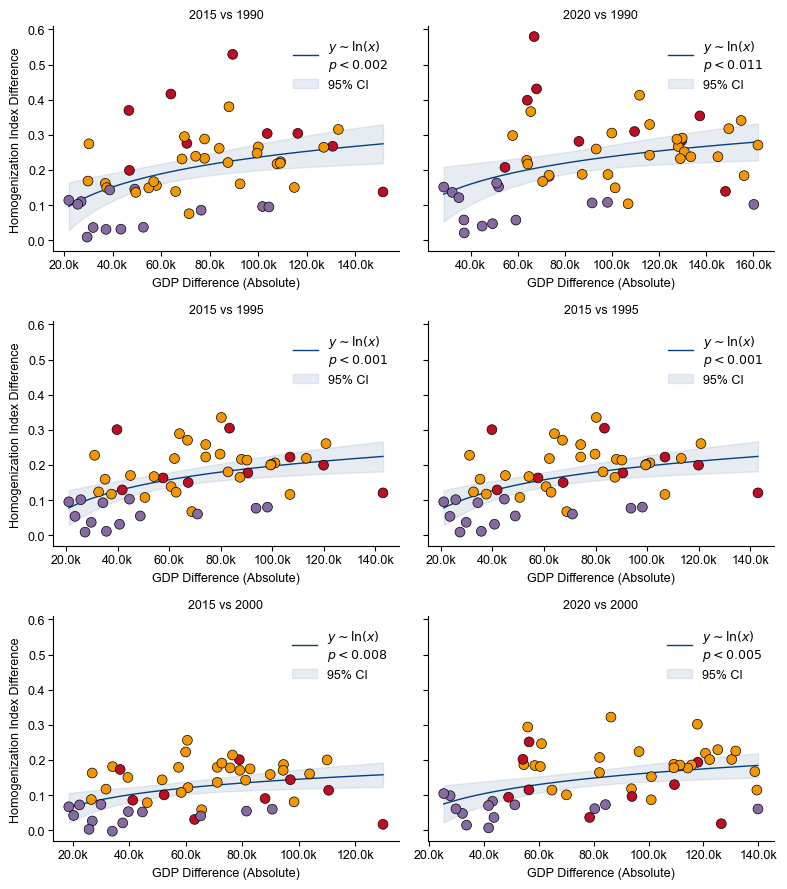

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import os
from scipy.stats import t
import matplotlib.font_manager as fm
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter

# 设置 Arial 字体
arial_font_path = "fronts/ARIAL.TTF"
fm.fontManager.addfont(arial_font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# 城市分类
city_lists = {
    'JJJ': [
        'Beijing', 'Baoding', 'Cangzhou', 'Chengde', 'Handan', 'Hengshui',
        'Langfang', 'Qinhuangdao', 'Shijiazhuang', 'Tangshan', 'Tianjin',
        'Xingtai', 'Zhangjiakou'
    ],
    'PRD': [
        'Dongguan', 'Foshan', 'Guangzhou', 'Huizhou', 'Jiangmen', 'Shenzhen',
        'Zhaoqing', 'Zhongshan', 'Zhuhai'
    ],
    'YRD': [
        'Anqing', 'Chizhou', 'Hangzhou', 'Huzhou', 'Jinhua', 'Nanjing', 'Ningbo',
        'Shaoxing', 'Taizhou(ZJ)', 'Tongling', 'Wuhu', 'Xuancheng', 'Yangzhou',
        'Zhoushan', 'Changzhou', 'Chuzhou', 'Hefei', 'Jiaxing', 'Maanshan',
        'Nantong', 'Shanghai', 'Suzhou', 'Taizhou(JS)', 'Wenzhou', 'Wuxi',
        'Yancheng', 'Zhenjiang'
    ]
}

city_to_region = {city: region for region, cities in city_lists.items() for city in cities}
color_map = {'JJJ': '#866AA3', 'PRD': '#BE0E23', 'YRD': '#F49600'}

# 添加格式化函数（用于 x 轴刻度）
def format_large_numbers(x, pos):
    """
    格式化数字为 '2k', '80k', '2M' 等形式，支持负数。
    """
    if abs(x) >= 1e6:
        return f"{x / 1e6:.1f}M"
    elif abs(x) >= 1e3:
        return f"{x / 1e3:.1f}k"
    else:
        return f"{x:.0f}"

def plot_scatter_subplots(
    region_class,
    df,
    comparison_pairs,
    output_folder,
    fig_size,
    base_font_size,
    plot_type="Area",
    save_pdf=True,
    ratio_flag=True,
    filename='2018',
):
    n_pairs = len(comparison_pairs)
    n_cols = 2
    n_rows = (n_pairs + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_size[0] * n_cols, fig_size[1] * n_rows), sharey=True)
    axes = axes.flatten() if n_pairs > 1 else [axes]

    for idx, pair in enumerate(comparison_pairs):
        yearA, yearB = map(int, pair.split('_'))
        groupA = f"{yearA} and before"
        groupB = f"{yearB} and before"
        ax = axes[idx]

        # 筛选数据
        dfA = df[df['grouping'] == groupA].copy()
        dfB = df[df['grouping'] == groupB].copy()
        dfA.set_index(region_class, inplace=True)
        dfB.set_index(region_class, inplace=True)
        merged_df = dfA.join(dfB, lsuffix='_A', rsuffix='_B', how='inner')

        # 根据 plot_type 计算 x 轴差值
        if plot_type == "Area":
            if ratio_flag:
                merged_df['x_diff'] = (merged_df['area_km2_A'] - merged_df['area_km2_B']) / merged_df['area_km2_B']
                x_label = "Area Difference (Ratio)"
            else:
                merged_df['x_diff'] = merged_df['area_km2_A'] - merged_df['area_km2_B']
                x_label = "Area Difference (km²)"
        elif plot_type == "GDP":
            gdpA, gdpB = f"{yearA}年_A", f"{yearB}年_B"
            if ratio_flag:
                # 避免除以 0
                merged_df['x_diff'] = (merged_df[gdpA] - merged_df[gdpB]) / merged_df[gdpB].replace(0, np.nan)
                x_label = "GDP Difference (Ratio)"
            else:
                merged_df['x_diff'] = merged_df[gdpA] - merged_df[gdpB]
                x_label = "GDP Difference (Absolute)"

        # 计算均值差
        merged_df['mean_diff'] = ((1 - merged_df['mean_A']) - (1 - merged_df['mean_B'])) * (1 / (4.33 - 4.16))
        merged_df['color'] = merged_df.index.map(city_to_region).map(color_map).fillna('gray')

        # 清理数据：移除 NaN 和 inf
        merged_df = merged_df.dropna(subset=['x_diff', 'mean_diff'])
        merged_df = merged_df[~merged_df['x_diff'].isin([np.inf, -np.inf])]
        merged_df = merged_df[~merged_df['mean_diff'].isin([np.inf, -np.inf])]

        # 散点图
        ax.scatter(
            merged_df['x_diff'], merged_df['mean_diff'],
            s=50, color=merged_df['color'], edgecolors="black", linewidth=0.5, alpha=1, zorder=5
        )

        # 对数拟合
        x, y = merged_df['x_diff'], merged_df['mean_diff']
        valid = x > 0
        x_valid, y_valid = x[valid], y[valid]
        if len(x_valid) > 2:
            X_log = sm.add_constant(np.log(x_valid))
            model = sm.OLS(y_valid, X_log).fit()
            a, b = model.params
            p_value_b = round(model.pvalues[1], 3)
            x_fit = np.linspace(x_valid.min(), x_valid.max(), 200)
            y_fit = a + b * np.log(x_fit)
            p_for_label = max(float(p_value_b), 0.001)
            ax.plot(x_fit, y_fit, color='#073E7F', linewidth=1,
                    label=fr"$y \sim \ln(x)$" + "\n" + fr"$p < {p_for_label:.3f}$", zorder=2)

            n = len(x_valid)
            y_pred = a + b * np.log(x_valid)
            SEE = np.sqrt(np.sum((y_valid - y_pred) ** 2) / (n - 2))
            t_critical = t.ppf(0.975, df=n-2)
            confidence_band = t_critical * SEE * np.sqrt(
                1/n + (np.log(x_fit) - np.mean(np.log(x_valid))) ** 2 / np.sum((np.log(x_valid) - np.mean(np.log(x_valid))) ** 2)
            )
            ax.fill_between(x_fit, y_fit - confidence_band, y_fit + confidence_band,
                            color='#83A0BE', alpha=0.2, label="95% CI")
        else:
            ax.text(0.05, 0.95, "Not enough valid points for log fit",
                    transform=ax.transAxes, va='top', fontsize=base_font_size, color='gray')

        # 设置样式
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_color("black")
        ax.spines['left'].set_color("black")
        ax.set_xlabel(x_label, fontsize=base_font_size, color="black")
        if idx % n_cols == 0:
            ax.set_ylabel("Homogenization Index Difference", fontsize=base_font_size, color="black")
        ax.tick_params(axis='both', labelsize=base_font_size, color="black", pad=2)
        ax.set_title(f"{yearA} vs {yearB}", fontsize=base_font_size, color="black")
        ax.legend(loc='upper right', frameon=False, fontsize=base_font_size)

        # 如果是 GDP 且使用绝对值模式，格式化 x 轴刻度
        if plot_type == "GDP" and not ratio_flag:
            ax.xaxis.set_major_formatter(FuncFormatter(format_large_numbers))

    for i in range(n_pairs, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    if save_pdf:
        os.makedirs(output_folder, exist_ok=True)
        out_pdf = os.path.join(output_folder, f"s-{plot_type.lower()}_multi_comparison_{filename}.pdf")
        plt.savefig(out_pdf, format='pdf', dpi=600)
        print(f"已保存图表: {out_pdf}")
    plt.show()
    plt.close()

def main(
    plot_type="Area",
    region_class='NAME_2',
    comparison_pairs=['2015_2000', '2018_2000', '2015_1990', '2018_1990'],
    fig_size=(4, 3),
    fontsize=9,
    save_pdf=True,
    ratio_flag=True,
    root_path='/home/liyong/code/CityHomogeneity/',
    filename='2018'
):
    if plot_type == "Area":
        csv_filename = f"city_circle_statistics_{region_class}_new.csv"
        csv_file = os.path.join(root_path, 'output/baidu/V3/results/statistics', csv_filename)
        output_folder = os.path.join(root_path, 'output/baidu/V3/visresult/Fig_3/Area_multi/')
    elif plot_type == "GDP":
        csv_filename = "city_gdp_loss.csv"
        csv_file = os.path.join(root_path, 'output/baidu/V3/results/statistics', csv_filename)
        output_folder = os.path.join(root_path, 'output/baidu/V3/visresult/Fig_3/GDP_multi/')
    else:
        print("plot_type 必须是 'Area' 或 'GDP'")
        return

    if not os.path.exists(csv_file):
        print(f"错误：文件不存在 - {csv_file}")
        return

    try:
        df = pd.read_csv(csv_file)
        df.loc[(df["NAME_1"] == "Jiangsu") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(JS)"
        df.loc[(df["NAME_1"] == "Zhejiang") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(ZJ)"
    except Exception as e:
        print(f"读取文件 {csv_file} 时出错: {e}")
        return

    plot_scatter_subplots(
        region_class,
        df,
        comparison_pairs,
        output_folder,
        fig_size,
        base_font_size=fontsize,
        plot_type=plot_type,
        save_pdf=save_pdf,
        ratio_flag=ratio_flag,
        filename = filename
    )

if __name__ == "__main__":
    main(
        plot_type="GDP", #"GDP" or "Area"
        comparison_pairs= ['2015_1990','2020_1990','2015_1995','2015_1995','2015_2000','2020_2000'],
        fig_size=(4, 3),
        fontsize=9,
        save_pdf=True,
        ratio_flag=False,  # GDP 用False Area 用True
        filename = '002'
    )

#AREA
 #1 ['2020_1990', '2020_1995', '2020_2000', '2020_2005', '2020_2010', '2020_2015']
 #2 ['2015_1990', '2015_1995', '2015_2000', '2015_2005', '2015_2010',]
 #3 ['2010_1990', '2010_1995', '2010_2000', '2010_2005', ]
 #4 ['2005_1990', '2005_1995', '2005_2000', ]
 #  ['2000_1990', '2000_1995', ]
 # ['1995_1990']

#1 ['2020_1990', '2015_1990', '2020_1995', '2015_1995', '2010_1990', '2020_2000']
#2 ['2015_2000', '2010_1995', '2005_1990', '2020_2005', '2015_2005', '2010_2000']
#3 ['2005_1995', '2000_1990', '2020_2010', '2015_2010', '2010_2005', '2005_2000']
#4 ['2000_1995', '1995_1990', '2020_2015']

# GDP
#['2015_1990','2020_1990','2015_1995','2015_1995','2015_2000','2020_2000']
 #['2005_1995', '2000_1990','2000_1995', '1995_1990', '2020_2015']



In [29]:
from itertools import chain

# 输入数据
lists = [
    ['2020_1990', '2020_1995', '2020_2000', '2020_2005', '2020_2010', '2020_2015'],
    ['2015_1990', '2015_1995', '2015_2000', '2015_2005', '2015_2010'],
    ['2010_1990', '2010_1995', '2010_2000', '2010_2005'],
    ['2005_1990', '2005_1995', '2005_2000'],
    ['2000_1990', '2000_1995'],
    ['1995_1990']
]

# 1. 合并所有列表
all_items = list(chain.from_iterable(lists))

# 2. 计算差值并排序
def sort_key(item):
    xxxx, yyyy = map(int, item.split('_'))
    diff = xxxx - yyyy
    return (-diff, -xxxx)  # 负号表示降序

sorted_items = sorted(all_items, key=sort_key)

print(sorted_items)
# # 3. 输出结果
# print("排序后的结果：")
# for item in sorted_items:
#     print(item)

['2020_1990', '2020_1995', '2015_1990', '2020_2000', '2015_1995', '2010_1990', '2020_2005', '2015_2000', '2010_1995', '2005_1990', '2020_2010', '2015_2005', '2010_2000', '2005_1995', '2000_1990', '2020_2015', '2015_2010', '2010_2005', '2005_2000', '2000_1995', '1995_1990']


### GDP

#### Data Merge
- Merge NAME_2 information into the GDP dataframe

In [25]:
import geopandas as gpd

# Path to the shapefile
shapefile_path = "/home/liyong/code/CityHomogeneity/data/gdp/city_gdp_merged.shp"

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Create a dictionary for city names mapping (with "市" suffix)
city_names = {
    'Beijing': '北京市', 'Baoding': '保定市', 'Cangzhou': '沧州市', 'Chengde': '承德市', 
    'Handan': '邯郸市', 'Hengshui': '衡水市', 'Langfang': '廊坊市', 'Qinhuangdao': '秦皇岛市', 
    'Shijiazhuang': '石家庄市', 'Tangshan': '唐山市', 'Tianjin': '天津市', 'Xingtai': '邢台市', 
    'Zhangjiakou': '张家口市', 'Dongguan': '东莞市', 'Foshan': '佛山市', 'Guangzhou': '广州市', 
    'Huizhou': '惠州市', 'Jiangmen': '江门市', 'Shenzhen': '深圳市', 'Zhaoqing': '肇庆市', 
    'Zhongshan': '中山市', 'Zhuhai': '珠海市', 'Anqing': '安庆市', 'Chizhou': '池州市', 
    'Hangzhou': '杭州市', 'Huzhou': '湖州市', 'Jinhua': '金华市', 'Nanjing': '南京市', 
    'Ningbo': '宁波市', 'Shaoxing': '绍兴市', 'Taizhou': '泰州市', 'Tongling': '铜陵市', 
    'Wuhu': '芜湖市', 'Xuancheng': '宣城市', 'Yangzhou': '扬州市', 'Zhoushan': '舟山市', 
    'Changzhou': '常州市', 'Chuzhou': '滁州市', 'Hefei': '合肥市', 'Jiaxing': '嘉兴市', 
    'Maanshan': '马鞍山市', 'Nantong': '南通市', 'Shanghai': '上海市', 'Suzhou': '苏州市', 
    'Wenzhou': '温州市', 'Wuxi': '无锡市', 'Yancheng': '盐城市', 'Zhenjiang': '镇江市',
    'Tayzhou': '台州市'
}

# Reverse mapping for Chinese names to English names
chinese_to_english = {v: k for k, v in city_names.items()}

# Filter GeoDataFrame to include only relevant cities based on the Chinese names
print(len(gdf))
gdf_filtered = gdf[gdf['地名'].isin(chinese_to_english.keys())]

# Add a new column with the English names
gdf_filtered['NAME_2'] = gdf_filtered['地名'].map(chinese_to_english)

# Drop original NAME_1, NAME_2, NAME_3, and geometry columns
columns_to_drop = ['NAME_1', 'NAME_3', gdf.geometry.name]
gdf_filtered = gdf_filtered.drop(columns=columns_to_drop, errors='ignore')

print(list(gdf_filtered.columns))
# Remove duplicate rows based on 'NAME_2'
gdf_filtered = gdf_filtered.drop_duplicates(subset=['NAME_2'])

# Arrange NAME_2 column to the front
columns = ['NAME_2'] + [col for col in gdf_filtered.columns if col != 'NAME_2']
gdf_filtered = gdf_filtered[columns]

# Display the length and column names after reordering
print(f"Number of rows after removing duplicates: {len(gdf_filtered)}")
print(f"Columns in the filtered DataFrame: {list(gdf_filtered.columns)}")

# Export the updated DataFrame to a CSV file
output_csv_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_gdp.csv"
gdf_filtered.to_csv(output_csv_path, index=False)
print(f"Exported to {output_csv_path}")


301
['NAME_2', 'index_righ', '地名', '地级码', '地级类', '省级', '省级码', '省级类', '1990年', '1991年', '1992年', '1993年', '1994年', '1995年', '1996年', '1997年', '1998年', '1999年', '2000年', '2001年', '2002年', '2003年', '2004年', '2005年', '2006年', '2007年', '2008年', '2009年', '2010年', '2011年', '2012年', '2013年', '2014年', '2015年', '2016年', '2017年', '2018年', '2019年', '2020年', '2021年', '2022年']
Number of rows after removing duplicates: 49
Columns in the filtered DataFrame: ['NAME_2', 'index_righ', '地名', '地级码', '地级类', '省级', '省级码', '省级类', '1990年', '1991年', '1992年', '1993年', '1994年', '1995年', '1996年', '1997年', '1998年', '1999年', '2000年', '2001年', '2002年', '2003年', '2004年', '2005年', '2006年', '2007年', '2008年', '2009年', '2010年', '2011年', '2012年', '2013年', '2014年', '2015年', '2016年', '2017年', '2018年', '2019年', '2020年', '2021年', '2022年']
Exported to /home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_gdp.csv


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [27]:
import pandas as pd
# File paths
gdp_csv_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_gdp.csv"
statistics_file_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_circle_statistics_NAME_2_new.csv"
output_file_path = "/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_gdp_loss.csv"

# Load the GDP data from CSV
gdp_df = pd.read_csv(gdp_csv_path)

# Load the statistics data
stats_df = pd.read_csv(statistics_file_path)

# Extract unique grouping information and map to corresponding GDP columns
grouping_to_year = {
    group: int(group.split()[0]) for group in stats_df['grouping'].unique() if 'and before' in group
}
print(grouping_to_year)
# Map GDP values to statistics based on grouping
for group, year in grouping_to_year.items():
    gdp_column = f"{year}年"
    if gdp_column in gdp_df.columns:
        stats_df[group] = stats_df['NAME_2'].map(gdp_df.set_index('NAME_2')[gdp_column])

# Merge statistics data with GDP information
merged_df = stats_df.merge(
    gdp_df[['NAME_2'] + [f"{year}年" for year in grouping_to_year.values()]],
    on="NAME_2",
    how="left"
)

# Select relevant columns for export
columns_to_export = [
    'NAME_1', 'NAME_2', 'mean', 'std', 'var', 'Q1', 'Q3', 'min', 'max', 'num',
    'area_km2', 'grouping'
] + [f"{year}年" for year in grouping_to_year.values()]

# Ensure only the desired columns are exported
final_df = merged_df[columns_to_export]

# Export the merged DataFrame to CSV
final_df.to_csv(output_file_path, index=False)
print(f"Merged file successfully exported to {output_file_path}")


{'1990 and before': 1990, '1995 and before': 1995, '2000 and before': 2000, '2005 and before': 2005, '2010 and before': 2010, '2015 and before': 2015, '2020 and before': 2020}
Merged file successfully exported to /home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_gdp_loss.csv


####  Data country and city homogenity

从 34 个城市中，共 476 个数据点计算得到全局 y 轴范围：min=4.191857549729729, max=4.32995354314727
图像已保存至: /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_4/s-city_county_avg_clip.pdf


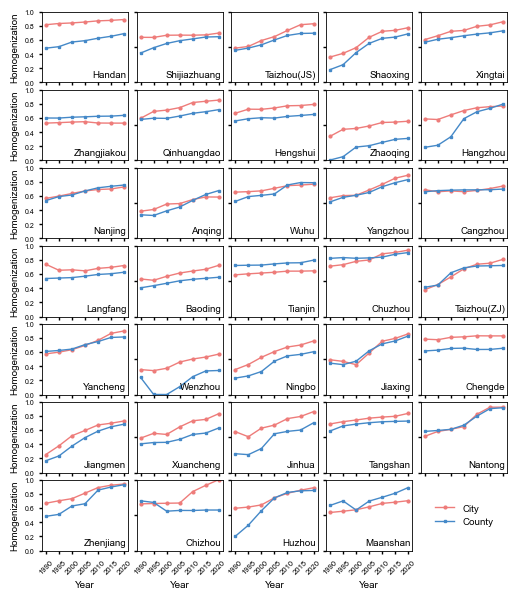

In [32]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import matplotlib.font_manager as fm
arial_font_path = "/home/liyong/code/CityHomogeneity/fronts/ARIAL.TTF"
# 添加 Arial 到 Matplotlib 字体库
fm.fontManager.addfont(arial_font_path)
# 设置全局字体为 Arial

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files


# ================================
# 全局配置和工具函数
# ================================

# 设置根目录和数据文件路径
ROOT_DIR = '/home/liyong/code/CityHomogeneity/'
META_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/city_county_meta_new.csv')
CLIP_STATS_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/city_circle_statistics_NAME_3_new.csv')
EXPAND_STATS_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/allcity_expand_train_loss_metric_NAME_3_new.csv')

def update_taizhou_names(df: pd.DataFrame) -> pd.DataFrame:
    """
    更新数据中 'Taizhou' 的名称：
        - 江苏省太原改为 'Taizhou(JS)'
        - 浙江省太原改为 'Taizhou(ZJ)'
    """
    df.loc[(df["NAME_1"] == "Jiangsu") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(JS)"
    df.loc[(df["NAME_1"] == "Zhejiang") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(ZJ)"
    return df

# ================================
# 数据加载与预处理
# ================================

# 读取 meta 数据，并更新太原名称
meta_df = pd.read_csv(META_FILE)
meta_df = update_taizhou_names(meta_df)

# ================================
# 解析函数
# ================================

def parse_year(year_str: str) -> int:
    """
    解析年份字符串，返回下划线前的第一个数字
    例如：'1995_1990' 返回 1995
    """
    return int(str(year_str).split('_')[0])

def parse_grouping(grouping_str: str) -> int:
    """
    解析分组字符串：
        - 如果字符串满足格式 "YYYY and before" 则返回年份 YYYY（整数形式）
        - 否则返回 None
    """
    parts = grouping_str.strip().split()
    if len(parts) >= 3 and parts[1] == 'and' and parts[2] == 'before':
        try:
            return int(parts[0])
        except ValueError:
            return None
    return None

# ================================
# 数据准备函数
# ================================

def prepare_stats_df(mode: str):
    """
    根据传入的 mode 参数加载统计数据文件，并进行预处理：
      - mode 为 "clip"：使用剪裁数据，x 轴列名为 "grouping"，解析函数为 parse_grouping
      - mode 为 "expand"：使用扩展数据，x 轴列名为 "year"，解析函数为 parse_year
    同时，对数据中的 'Taizhou' 进行名称更新。
    """
    if mode == "clip":
        stats_file = CLIP_STATS_FILE
        x_col = "grouping"
        parse_func = parse_grouping
        title_prefix = "[Clip]"
    elif mode == "expand":
        stats_file = EXPAND_STATS_FILE
        x_col = "year"
        parse_func = parse_year
        title_prefix = "[Expand]"
    else:
        raise ValueError(f"Invalid mode: {mode}, choose ['clip', 'expand']")
    
    # 读取统计数据
    stats_df = pd.read_csv(stats_file)
    # 更新 'Taizhou' 名称
    stats_df = update_taizhou_names(stats_df)
    
    # 如果使用 clip 模式，则仅保留包含 "and before" 的行
    if mode == "clip":
        stats_df = stats_df[stats_df[x_col].str.contains("and before", na=False)].copy()
    
    return stats_df, x_col, parse_func, title_prefix

# ================================
# 全局 Y 轴范围计算
# ================================

def compute_global_y_range(city_list: list, stats_df: pd.DataFrame, meta_df: pd.DataFrame, x_col: str, parse_func: callable):
    """
    计算所有有效城市中原始均值的全局 y 轴范围
    步骤：
      1. 遍历每个城市，依据 meta_df 筛选出城市和县的数据
      2. 对于每个城市和县，按年份分组计算均值
      3. 将所有年份的均值合并后，取最小值和最大值作为全局范围
    注意：此处假设 stats_df 中包含 'year' 列用于分组统计。
    """
    all_means = []  # 存放所有年份的均值

    for name in city_list:
        # 根据城市名称筛选对应的 meta 数据
        sub_meta = meta_df[meta_df['NAME_2'] == name]
        # 获取 city_flag 和 county_flag 为 True 的名称列表
        city_name_3_list = sub_meta[sub_meta['city_flag'] == True]['NAME_3'].unique()
        county_name_3_list = sub_meta[sub_meta['county_flag'] == True]['NAME_3'].unique()
        # 从统计数据中筛选出对应的城市和县数据
        city_stats = stats_df[(stats_df['NAME_2'] == name) & (stats_df['NAME_3'].isin(city_name_3_list))].copy()
        county_stats = stats_df[(stats_df['NAME_2'] == name) & (stats_df['NAME_3'].isin(county_name_3_list))].copy()

        # 按年份分组计算均值
        city_yearly_means = list(city_stats.groupby(x_col)['mean'].mean().reset_index()['mean'])
        county_yearly_means = list(county_stats.groupby(x_col)['mean'].mean().reset_index()['mean'])

        # 仅当城市和县的数据均不为空时，将均值加入列表
        if not city_stats.empty and not county_stats.empty:
            all_means.extend(city_yearly_means)
            all_means.extend(county_yearly_means)

    if not all_means:
        raise ValueError("未找到有效的均值数据，无法计算全局 y 轴范围！")
    
    min_mean, max_mean = min(all_means), max(all_means)
    print(f"从 {len(city_list)} 个城市中，共 {len(all_means)} 个数据点计算得到全局 y 轴范围：min={min_mean}, max={max_mean}")
    return min_mean, max_mean

# ================================
# 单个城市子图绘制
# ================================

def plot_city_county_avg_subplot(
    name_2_value: str,
    stats_df: pd.DataFrame,
    meta_df: pd.DataFrame,
    mode: str,
    x_col: str,
    parse_func: callable,
    ax,
    global_y_min: float,
    global_y_max: float,
    font_size: int
) -> bool:
    """
    绘制单个城市中城市和县的均值曲线对比子图
      - 数据转换步骤：
          1. 筛选出当前城市在 meta 数据中对应的城市和县数据
          2. 在统计数据中分别获取城市和县数据，并对 x 轴数据进行解析转换
          3. 按 x 轴数值分组计算均值，并对原始均值应用反转（y = 1 - y）和归一化
      - 绘图设置：
          - 设置曲线样式、图例、标题等
      - 如果数据不足则返回 False，不进行绘图
    """
    # 筛选当前城市的 meta 数据
    sub_meta = meta_df[meta_df['NAME_2'] == name_2_value]
    city_name_3_list = sub_meta[sub_meta['city_flag'] == True]['NAME_3'].unique()
    county_name_3_list = sub_meta[sub_meta['county_flag'] == True]['NAME_3'].unique()
    
    # 从统计数据中筛选出当前城市对应的城市和县数据
    city_stats = stats_df[(stats_df['NAME_2'] == name_2_value) & (stats_df['NAME_3'].isin(city_name_3_list))].copy()
    county_stats = stats_df[(stats_df['NAME_2'] == name_2_value) & (stats_df['NAME_3'].isin(county_name_3_list))].copy()
    
    if city_stats.empty or county_stats.empty:
        return False

    # 对 x 轴数据进行解析转换，生成数值型变量
    city_stats["x_numeric"] = city_stats[x_col].apply(parse_func)
    county_stats["x_numeric"] = county_stats[x_col].apply(parse_func)
    city_stats = city_stats.dropna(subset=["x_numeric"])
    county_stats = county_stats.dropna(subset=["x_numeric"])
    if city_stats.empty or county_stats.empty:
        return False

    # 按 x_numeric 分组，计算均值，并按照 x 值排序
    city_avg = city_stats.groupby("x_numeric")["mean"].mean().reset_index().sort_values("x_numeric")
    county_avg = county_stats.groupby("x_numeric")["mean"].mean().reset_index().sort_values("x_numeric")
    
    # 对原始均值进行反转处理：y = 1 - y
    city_inverted = 1 - city_avg["mean"]
    county_inverted = 1 - county_avg["mean"]
    
    # 定义归一化函数，将数据归一化到 [0, 1] 范围内
    def normalize(series, min_val, max_val):
        if max_val == min_val:
            return series * 0 + 0.5
        return (series - min_val) / (max_val - min_val)

    # 利用全局计算的最小值和最大值（反转后的范围）进行归一化
    city_norm = normalize(city_inverted, 1 - global_y_max, 1 - global_y_min)
    county_norm = normalize(county_inverted, 1 - global_y_max, 1 - global_y_min)
    
    # 获取所有 x 轴的唯一数值（用于设置 x 轴刻度）
    all_x = sorted(stats_df[x_col].dropna().apply(parse_func).unique())
    
    # 绘制城市和县的曲线
    ax.plot(city_avg["x_numeric"], city_norm, marker='o', markersize=2, color='#EE7C7AFF', linewidth=1, label='City')
    ax.plot(county_avg["x_numeric"], county_norm, marker='s', markersize=2, color='#4589c8ff', linewidth=1, label='County')
    
    ax.set_ylim(0, 1)
    ax.set_xticks(all_x)
    
    # 在图表上方添加城市名称标签
    ax.text(0.98, 0.05, name_2_value, transform=ax.transAxes, ha='right', va='bottom', fontsize=font_size)
    
    return True

# ================================
# 多城市绘图函数
# ================================

def plot_multiple_city_county_avg(
    city_list: list,
    mode: str = "expand",
    save_fig: bool = False,
    output_dir: str = None,
    fig_size: tuple = (15, 10),
    font_size: int = 12
):
    """
    绘制多个城市的城市与县均值对比图：
      1. 加载统计数据（clip 或 expand 模式），并根据 mode 参数选择解析方式
      2. 根据 meta 数据筛选有效的城市（同时存在城市和县数据）
      3. 计算所有城市中原始均值的全局 y 轴范围
      4. 针对每个城市绘制单独的子图，并设置统一的图例
      5. 根据参数决定是否保存绘图结果到文件或直接展示
    """
    # 加载统计数据及相关参数
    stats_df, x_col, parse_func, _ = prepare_stats_df(mode)
    
    # 筛选有效城市：确保当前城市同时存在城市和县数据，并且县数据数量大于等于2
    valid_cities = []
    for name in city_list:
        sub_meta = meta_df[meta_df['NAME_2'] == name]
        city_name_3_list = sub_meta[sub_meta['city_flag'] == True]['NAME_3'].unique()
        county_name_3_list = sub_meta[sub_meta['county_flag'] == True]['NAME_3'].unique()
        if len(county_name_3_list) < 2:
            continue
        city_stats = stats_df[(stats_df['NAME_2'] == name) & (stats_df['NAME_3'].isin(city_name_3_list))]
        county_stats = stats_df[(stats_df['NAME_2'] == name) & (stats_df['NAME_3'].isin(county_name_3_list))]
        if not city_stats.empty and not county_stats.empty:
            valid_cities.append(name)

    if not valid_cities:
        print("未找到有效城市数据。")
        return

    # 计算全局 y 轴范围（使用原始均值数据）
    global_y_min, global_y_max = compute_global_y_range(valid_cities, stats_df, meta_df, x_col, parse_func)
    
    # 设置子图行列数：每行最多显示 5 个城市子图
    ncols = 5
    nrows = math.ceil((len(valid_cities) + 1) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=fig_size, squeeze=False)

    # 绘制每个城市的子图
    for i, city_name in enumerate(valid_cities):
        r = i // ncols
        c = i % ncols
        ax = axes[r][c]
        plotted = plot_city_county_avg_subplot(
            city_name, stats_df, meta_df, mode, x_col, parse_func, ax, global_y_min, global_y_max, font_size
        )
        if not plotted:
            ax.set_visible(False)
        else:
            # 设置 y 轴标签仅在每行首列显示
            if c == 0:
                ax.set_ylabel("Homogenization", fontsize=font_size)
                ax.tick_params(axis='y', labelsize=font_size-2)
                
            else:
                ax.set_yticklabels([])
            ax.tick_params(axis='y',length=2, width=1, direction='out')
           
            # 设置 x 轴标签：仅在最后一行或者最后一个子图显示
            if r == nrows - 1 or i == len(valid_cities) - 1:
                ax.tick_params(axis='x', labelsize=font_size-1.5, rotation=45)
                ax.set_xlabel("Year", fontsize=font_size)
                ax.set_xticklabels([str(x) for x in ax.get_xticks()], rotation=45, ha='center')
            else:
                ax.set_xticklabels([])
            ax.tick_params(axis='x',length=2, width=1, direction='out')
            ax.spines["bottom"].set_linewidth(0.6)
            ax.spines["left"].set_linewidth(0.6)
            ax.spines["right"].set_linewidth(0.6)
            ax.spines["top"].set_linewidth(0.6) # 移除上边框
            ax.grid(False) # 移除网格线

    # 隐藏多余的子图区域，并在最后一个子图位置添加统一图例
    legend_r, legend_c = nrows - 1, ncols - 1
    for j in range(len(valid_cities), nrows * ncols):
        r = j // ncols
        c = j % ncols
        if (r, c) != (legend_r, legend_c):
            axes[r][c].set_visible(False)
    legend_ax = axes[legend_r][legend_c]
    legend_ax.axis('off')
    legend_lines = [
        mlines.Line2D([], [], color='#EE7C7AFF', marker='o', markersize=2, linewidth=1, label='City'),
        mlines.Line2D([], [], color='#4589c8ff', marker='s', markersize=2, linewidth=1, label='County')
    ]
    legend_ax.legend(handles=legend_lines, loc='center', fontsize=font_size, frameon=False, facecolor='white', edgecolor=None)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    # plt.tight_layout()

    # 根据参数决定保存或显示图片
    if save_fig:
        if output_dir is None:
            output_dir = os.path.join(ROOT_DIR, "output/baidu/V3/visresult/Fig_4")
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, f"s-city_county_avg_{mode}.pdf")
        plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
        print(f"图像已保存至: {output_file}")
    else:
        plt.show()

# ================================
# 主函数入口
# ================================

def main():
    """
    主函数：
      - 定义城市列表（按照区域分组）
      - 合并所有城市为总列表
      - 设置绘图模式、图像尺寸和字体大小
      - 调用绘图函数展示或保存结果
    """
    # 定义不同区域下的城市列表
    city_lists = {
        'JJJ': ['Beijing', 'Baoding', 'Cangzhou', 'Chengde', 'Handan', 'Hengshui', 'Langfang',
                'Qinhuangdao', 'Shijiazhuang', 'Tangshan', 'Tianjin', 'Xingtai', 'Zhangjiakou'],
        'PRD': ['Dongguan', 'Foshan', 'Guangzhou', 'Huizhou', 'Jiangmen', 'Shenzhen',
                'Zhaoqing', 'Zhongshan', 'Zhuhai'],
        'YRD': ['Anqing', 'Chizhou', 'Hangzhou', 'Huzhou', 'Jinhua', 'Nanjing', 'Ningbo',
                'Shaoxing', 'Taizhou(ZJ)', 'Tongling', 'Wuhu', 'Xuancheng', 'Yangzhou', 'Zhoushan',
                'Changzhou', 'Chuzhou', 'Hefei', 'Jiaxing', 'Maanshan', 'Nantong', 'Shanghai',
                'Suzhou', 'Taizhou(JS)', 'Wenzhou', 'Wuxi', 'Yancheng', 'Zhenjiang']
    }
    # 合并所有区域的城市列表，去重
    total_city_list = list({city for cities in city_lists.values() for city in cities})
    
    # 设置模式（"expand" 或 "clip"）、图像尺寸和字体大小
    mode = "clip"
    fig_size = (6, 7)
    font_size = 7
    
    # 绘制城市与县均值对比图（直接展示，不保存为文件）
    plot_multiple_city_county_avg(total_city_list, mode=mode, save_fig=True, 
                                  fig_size=fig_size, font_size=font_size)

if __name__ == "__main__":
    main()


### Supplementary: Visualization and Output

图像已保存至: /home/liyong/code/CityHomogeneity/output/baidu/V3/visresult/Fig_2/city_group_comparison.pdf


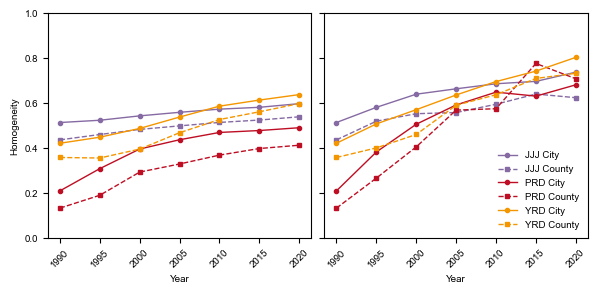

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.font_manager as fm


arial_font_path = "/home/liyong/code/CityHomogeneity/fronts/ARIAL.TTF"

# 添加 Arial 到 Matplotlib 字体库
fm.fontManager.addfont(arial_font_path)

# 设置全局字体为 Arial
plt.rcParams['font.family'] = 'Arial'

plt.rcParams['pdf.fonttype']=42 # Ensure fonts are embedded as editable text
plt.rcParams['ps.fonttype']= 42 #Same for Eps files

# ================================
# 全局配置和工具函数
# ================================

ROOT_DIR = '/home/liyong/code/CityHomogeneity/'
META_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/city_county_meta_new.csv')
CLIP_STATS_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/city_circle_statistics_NAME_3_new.csv')
EXPAND_STATS_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/train_loss_area_expand_statistics_NAME_3_new.csv')

def update_taizhou_names(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[(df["NAME_1"] == "Jiangsu") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(JS)"
    df.loc[(df["NAME_1"] == "Zhejiang") & (df["NAME_2"] == "Taizhou"), "NAME_2"] = "Taizhou(ZJ)"
    return df

meta_df = pd.read_csv(META_FILE)
meta_df = update_taizhou_names(meta_df)

def parse_year(year_str: str) -> int:
    return int(str(year_str).split('_')[0])

def parse_grouping(grouping_str: str) -> int:
    parts = grouping_str.strip().split()
    if len(parts) >= 3 and parts[1] == 'and' and parts[2] == 'before':
        try:
            return int(parts[0])
        except ValueError:
            return None
    return None

def prepare_stats_df(mode: str):
    if mode == "clip":
        stats_file = CLIP_STATS_FILE
        x_col = "grouping"
        parse_func = parse_grouping
        title_prefix = "[Clip]"
    elif mode == "expand":
        stats_file = EXPAND_STATS_FILE
        x_col = "year"
        parse_func = parse_year
        title_prefix = "[Expand]"
    else:
        raise ValueError(f"Invalid mode: {mode}, choose ['clip', 'expand']")
    
    stats_df = pd.read_csv(stats_file)
    stats_df = update_taizhou_names(stats_df)
    if mode == "clip":
        stats_df = stats_df[stats_df[x_col].str.contains("and before", na=False)].copy()
    
    return stats_df, x_col, parse_func, title_prefix

# ================================
# 新绘图函数
# ================================

def plot_city_group_comparison(
    city_groups: dict,
    save_fig: bool = False,
    output_dir: str = None,
    fig_size: tuple = (10, 4),  # 紧凑尺寸
    font_size: int = 10
):
    # 美观配色方案
    # colors = {'JJJ': '#FBBC04', 'PRD': '#4285F4', 'YRD': '#34A853'}
    colors = {'JJJ': '#eab946', 'PRD': '#aa1d25', 'YRD': '#7094d0'}
    linestyles = {'city': '-', 'county': '--'}
    markers = {'city': 'o', 'county': 's'}

    colors = {
    'JJJ': '#866AA3',   #
    'PRD': '#BE0E23',   # 
    'YRD': '#F49600'    # 
}

    # 设置全局字体
    plt.rcParams.update({'font.size': font_size})

    # 创建左右两个子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=fig_size, sharey=True)

    # 处理两种模式
    modes = [("clip", ax1), ("expand", ax2)]
    for mode, ax in modes:
        stats_df, x_col, parse_func, title_prefix = prepare_stats_df(mode)

        # 存储所有城市群的均值数据
        group_data = {}
        all_x_values = sorted(stats_df[x_col].dropna().apply(parse_func).unique())
        
        for group_name, city_list in city_groups.items():
            city_stats = stats_df[stats_df['NAME_2'].isin(city_list) & stats_df['NAME_3'].isin(
                meta_df[meta_df['city_flag'] == True]['NAME_3'])].copy()
            county_stats = stats_df[stats_df['NAME_2'].isin(city_list) & stats_df['NAME_3'].isin(
                meta_df[meta_df['county_flag'] == True]['NAME_3'])].copy()
            
            if city_stats.empty or county_stats.empty:
                continue
            
            city_stats['x_numeric'] = city_stats[x_col].apply(parse_func)
            county_stats['x_numeric'] = county_stats[x_col].apply(parse_func)
            city_stats = city_stats.dropna(subset=['x_numeric'])
            county_stats = county_stats.dropna(subset=['x_numeric'])
            
            city_avg = city_stats.groupby('x_numeric')['mean'].mean().reset_index().sort_values('x_numeric')
            county_avg = county_stats.groupby('x_numeric')['mean'].mean().reset_index().sort_values('x_numeric')
            
            group_data[f'{group_name}_city'] = dict(zip(city_avg['x_numeric'], 1 - city_avg['mean']))
            group_data[f'{group_name}_county'] = dict(zip(county_avg['x_numeric'], 1 - county_avg['mean']))
        
        # 计算绘制数据点的全局最大最小值
        all_values = []
        for x in all_x_values:
            values_at_x = [group_data[key].get(x, float('nan')) for key in group_data]
            values_at_x = [v for v in values_at_x if not pd.isna(v)]
            if values_at_x:
                all_values.extend(values_at_x)
        
        if not all_values:
            raise ValueError(f"Mode {mode} 未找到有效数据点！")
        # global_min, global_max = min(all_values), max(all_values)
        global_min, global_max = 1-4.33, 1-4.16
        def normalize(value):
            if global_max == global_min:
                return 0.5
            return (value - global_min) / (global_max - global_min)
        
        # 绘制曲线并设置图例标签
        for group_name in city_groups:
            for area_type in ['city', 'county']:
                data_dict = group_data[f'{group_name}_{area_type}']
                x_vals = [x for x in all_x_values if x in data_dict]
                y_vals = [normalize(data_dict[x]) for x in x_vals]
                ax.plot(x_vals, y_vals, 
                        color=colors[group_name], 
                        linestyle=linestyles[area_type], 
                        marker=markers[area_type], 
                        markersize=3, 
                        linewidth=1, 
                        alpha=1,
                        label=f'{group_name} {area_type.capitalize()}')  # 保留完整标签
        
        # 设置子图样式
        ax.set_ylim(0, 1)
        # ax.set_title(f'{title_prefix}')
        ax.set_xlabel('Year')
        if mode == 'clip':
            ax.set_ylabel('Homogeneity')
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.set_xticks(all_x_values)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(False)
        # 图例放在右下角，标注所有 6 项
        if ax == ax2:
            ax.legend(loc='lower right', frameon=False)  

    # 调整布局更紧凑
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05, hspace=0, top=0.9, bottom=0.15)

    # 保存或显示
    if save_fig:
        if output_dir is None:
            output_dir = os.path.join(ROOT_DIR, "output/baidu/V3/visresult/Fig_2")
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, "city_group_comparison.pdf")
        plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
        print(f"图像已保存至: {output_file}")
    else:
        plt.show()

# ================================
# 主函数入口
# ================================

def main():
    city_groups = {
        'JJJ': ['Beijing', 'Baoding', 'Cangzhou', 'Chengde', 'Handan', 'Hengshui', 'Langfang',
                'Qinhuangdao', 'Shijiazhuang', 'Tangshan', 'Tianjin', 'Xingtai', 'Zhangjiakou'],
        'PRD': ['Dongguan', 'Foshan', 'Guangzhou', 'Huizhou', 'Jiangmen', 'Shenzhen',
                'Zhaoqing', 'Zhongshan', 'Zhuhai'],
        'YRD': ['Anqing', 'Chizhou', 'Hangzhou', 'Huzhou', 'Jinhua', 'Nanjing', 'Ningbo',
                'Shaoxing', 'Taizhou(ZJ)', 'Tongling', 'Wuhu', 'Xuancheng', 'Yangzhou', 'Zhoushan',
                'Changzhou', 'Chuzhou', 'Hefei', 'Jiaxing', 'Maanshan', 'Nantong', 'Shanghai',
                'Suzhou', 'Taizhou(JS)', 'Wenzhou', 'Wuxi', 'Yancheng', 'Zhenjiang']
    }
    plot_city_group_comparison(city_groups, save_fig=True, fig_size=(6, 3), font_size=7)

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd

# 读取CSV文件
file_path = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/statistics/city_county_meta.csv'
df = pd.read_csv(file_path)

# 如果 city_flag 列是字符串 'true' / 'false'
city_true = df[df['city_flag'] == True].shape[0]
county_true = df[df['county_flag'] == True].shape[0]
# 如果 city_flag 列是布尔值 True / False，可以用：
# count_true = df[df['city_flag'] == True].shape[0]

print(f"city_flag 为 true 的数量: {city_true}")
print(f"county_flag 为 true 的数量: {county_true}")


In [ ]:
ROOT_DIR = '/home/liyong/code/CityHomogeneity/'
META_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/city_county_meta.csv')
CLIP_STATS_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/city_circle_statistics_NAME_3.csv')
EXPAND_STATS_FILE = os.path.join(ROOT_DIR, 'output/baidu/V3/results/statistics/train_loss_area_statistics_NAME_3.csv')

### Supplementary: Administrative Region Analysis

### Supplementary: City Level Analysis

### Supplementary: County Level Analysis

In [ ]:
import os
import pandas as pd

# 路径设置
root_dir = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/'
csv_file = os.path.join(root_dir, 'statistics/allcity_train_loss_metric_NAME_2.csv')

# 读取数据
df = pd.read_csv(csv_file)

# 清理字段名并创建城市唯一标识
df.columns = [col.strip() for col in df.columns]
df['city_key'] = df['NAME_2'].astype(str) + '_' + df['NAME_1'].astype(str)

# 只取 year 字段前四个字符作为实际年份
df['year_clean'] = df['year'].astype(str).str[:4].astype(int)

# 对每个 city_key 进行 min-max 归一化
df['mean_norm'] = df.groupby('city_key')['mean'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else 0
)

# 所有时间区间
lists = [
    ['2018_1990', '2018_1995', '2018_2000', '2018_2005', '2018_2010', '2018_2015'],
    ['2015_1990', '2015_1995', '2015_2000', '2015_2005', '2015_2010'],
    ['2010_1990', '2010_1995', '2010_2000', '2010_2005'],
    ['2005_1990', '2005_1995', '2005_2000'],
    ['2000_1990', '2000_1995'],
    ['1995_1990']
]
time_ranges = [item for sublist in lists for item in sublist]

# 遍历城市和时间区间计算归一化后的增长差
results = []

cities = df['city_key'].unique()

for city in cities:
    city_data = df[df['city_key'] == city]
    for time_range in time_ranges:
        end_year, start_year = map(int, time_range.split('_'))
        start_row = city_data[city_data['year_clean'] == start_year]
        end_row = city_data[city_data['year_clean'] == end_year]
        if not start_row.empty and not end_row.empty:
            norm_diff = end_row.iloc[0]['mean_norm'] - start_row.iloc[0]['mean_norm']
            results.append({
                'city': city,
                'NAME_2': end_row.iloc[0]['NAME_2'],
                'NAME_1': end_row.iloc[0]['NAME_1'],
                'start_year': start_year,
                'end_year': end_year,
                'time_range': time_range,
                'norm_mean_diff': norm_diff  # 使用归一化后的差值
            })

# 保存结果
result_df = pd.DataFrame(results)
print(result_df.head())
output_path = os.path.join(root_dir, 'city_mean_growth_diff_normalized.csv')
# result_df.to_csv(output_path, index=False)

print(f"处理完毕，保存路径：{output_path}")


### Supplementary: Other Notes

In [ ]:
import os
import pandas as pd

# 路径设置
root_dir = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/'
csv_file = os.path.join(root_dir, 'statistics/allcity_train_loss_metric_NAME_2.csv')

# 读取数据
df = pd.read_csv(csv_file)

# 清理字段名并创建城市唯一标识
df.columns = [col.strip() for col in df.columns]
df['city_key'] = df['NAME_2'].astype(str) + '_' + df['NAME_1'].astype(str)

# 只取 year 字段前四个字符作为实际年份
df['year_clean'] = df['year'].astype(str).str[:4].astype(int)

# 全局归一化
global_min = 1 - 4.33
global_max = 1 - 4.16

df['mean_norm'] = ( (1-df['mean']) - global_min) / ( global_max - global_min)

# 所有时间区间
lists = [
    ['2018_1990', '2018_1995', '2018_2000', '2018_2005', '2018_2010', '2018_2015'],
    ['2015_1990', '2015_1995', '2015_2000', '2015_2005', '2015_2010'],
    ['2010_1990', '2010_1995', '2010_2000', '2010_2005'],
    ['2005_1990', '2005_1995', '2005_2000'],
    ['2000_1990', '2000_1995'],
    ['1995_1990']
]
time_ranges = [item for sublist in lists for item in sublist]

# 遍历城市和时间区间计算归一化后的增长差和相对变化
results = []

cities = df['city_key'].unique()

for city in cities:
    city_data = df[df['city_key'] == city]
    for time_range in time_ranges:
        end_year, start_year = map(int, time_range.split('_'))
        start_row = city_data[city_data['year_clean'] == start_year]
        end_row = city_data[city_data['year_clean'] == end_year]
        if not start_row.empty and not end_row.empty:
            norm_start = start_row.iloc[0]['mean_norm']
            norm_end = end_row.iloc[0]['mean_norm']
            norm_diff = norm_end - norm_start
            # 加个保护防止除 0（如全为常数时归一化为0）
            relative_diff = norm_diff / norm_start if norm_start != 0 else None
            results.append({
                'city': city,
                'NAME_2': end_row.iloc[0]['NAME_2'],
                'NAME_1': end_row.iloc[0]['NAME_1'],
                'start_year': start_year,
                'end_year': end_year,
                'time_range': time_range,
                'norm_start_value': norm_start,
                'norm_mean_diff': norm_diff,
                'relative_diff': relative_diff
            })

# 保存结果
result_df = pd.DataFrame(results)
print(result_df.head(10))
output_path = os.path.join(root_dir, 'city_mean_growth_diff_global_norm_relative.csv')
# result_df.to_csv(output_path, index=False)

# print(f"处理完毕，保存路径：{output_path}")


In [ ]:
import os
import pandas as pd

# 路径设置
root_dir = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/'
csv_file = os.path.join(root_dir, 'statistics/allcity_train_loss_metric_NAME_2.csv')

# 读取数据
df = pd.read_csv(csv_file)

# 清理字段名并创建城市唯一标识
df.columns = [col.strip() for col in df.columns]
df['city_key'] = df['NAME_2'].astype(str) + '_' + df['NAME_1'].astype(str)

# 只取 year 字段前四个字符作为实际年份
df['year_clean'] = df['year'].astype(str).str[:4].astype(int)

# 全局归一化（使用 1 - mean）
global_min = 1 - 4.33
global_max = 1 - 4.16
df['mean_norm'] = ((1 - df['mean']) - global_min) / (global_max - global_min)

# 所有时间区间（用于计算 diff 和 ratio）
lists = [
    ['2018_1990', '2018_1995', '2018_2000', '2018_2005', '2018_2010', '2018_2015'],
    ['2015_1990', '2015_1995', '2015_2000', '2015_2005', '2015_2010'],
    ['2010_1990', '2010_1995', '2010_2000', '2010_2005'],
    ['2005_1990', '2005_1995', '2005_2000'],
    ['2000_1990', '2000_1995'],
    ['1995_1990']
]
time_ranges = [item for sublist in lists for item in sublist]

# ========== Step 1：构建宽表，每个城市一行，每年一列的 mean_norm ==========
yearly_homo = df.pivot_table(
    index=["city_key", "NAME_2", "NAME_1"],
    columns="year_clean",
    values="mean_norm"
).reset_index()

# 改列名，比如 1990 → 1990_homo
yearly_homo.columns = [f"{col}_homo" if isinstance(col, int) else col for col in yearly_homo.columns]

# ========== Step 2：计算时间区间的差值 diff 和 ratio ==========
for time_range in time_ranges:
    end_year, start_year = map(int, time_range.split('_'))
    col_end = f"{end_year}_homo"
    col_start = f"{start_year}_homo"

    if col_end in yearly_homo.columns and col_start in yearly_homo.columns:
        diff_col = f"{time_range}_diff"
        ratio_col = f"{time_range}_ratio"

        yearly_homo[diff_col] = yearly_homo[col_end] - yearly_homo[col_start]
        yearly_homo[ratio_col] = yearly_homo[diff_col] / yearly_homo[col_start]
    else:
        print(f"⚠️ 缺少年份列: {col_start} 或 {col_end}，跳过计算 {time_range}")

# ========== Step 3：导出最终宽表 ==========
output_path_final = os.path.join(root_dir,'statistics', 'city_homogeneity_summary.csv')
print(yearly_homo.head())
yearly_homo.to_csv(output_path_final, index=False)
print(f"\n✅ 处理完毕，结果已保存：{output_path_final}")


In [ ]:
import pandas as pd

# Excel 文件路径
excel_path = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/allcity_train_loss_metric_statistics.xlsx'

# 读取第一个 sheet
df = pd.read_excel(excel_path, sheet_name=2)

# 筛选 Name_2 为 Anqing 的行
anqing_data = df[df['NAME_2'] == 'Anqing']

# 计算 mean 列的均值
mean_value = anqing_data['loss_mean'].mean()

print(f"Anqing 所有记录的 mean 均值为: {mean_value:.6f}")


## clip 的差值计算

- loss差值

In [ ]:
import os
import pandas as pd

# 路径设置
root_dir = '/home/liyong/code/CityHomogeneity/output/baidu/V3/results/'
csv_file = os.path.join(root_dir, 'statistics/city_circle_statistics_NAME_2.csv')

# 读取数据
df = pd.read_csv(csv_file)

# 清理字段名并创建城市唯一标识
df.columns = [col.strip() for col in df.columns]
df['city_key'] = df['NAME_2'].astype(str) + '_' + df['NAME_1'].astype(str)

# 只取 year 字段前四个字符作为实际年份
df['year_clean'] = df['grouping'].astype(str).str[:4].astype(int)

# 所有时间区间
lists = [
    ['2018_1990', '2018_1995', '2018_2000', '2018_2005', '2018_2010', '2018_2015'],
    ['2015_1990', '2015_1995', '2015_2000', '2015_2005', '2015_2010'],
    ['2010_1990', '2010_1995', '2010_2000', '2010_2005'],
    ['2005_1990', '2005_1995', '2005_2000'],
    ['2000_1990', '2000_1995'],
    ['1995_1990']
]
time_ranges = [item for sublist in lists for item in sublist]

# 遍历城市和时间区间计算增长差
results = []

cities = df['city_key'].unique()

for city in cities:
    city_data = df[df['city_key'] == city]
    for time_range in time_ranges:
        end_year, start_year = map(int, time_range.split('_'))
        start_row = city_data[city_data['year_clean'] == start_year]
        end_row = city_data[city_data['year_clean'] == end_year]
        if not start_row.empty and not end_row.empty:
            mean_diff = end_row.iloc[0]['mean'] - start_row.iloc[0]['mean']
            results.append({
                'city': city,
                'NAME_2': end_row.iloc[0]['NAME_2'],  # 城市名
                'NAME_1': end_row.iloc[0]['NAME_1'],  # 省份
                'start_year': start_year,
                'end_year': end_year,
                'time_range': time_range,
                'mean_diff': mean_diff
            })

# 保存结果
result_df = pd.DataFrame(results)
print(result_df.head())
output_path = os.path.join(root_dir, 'city_mean_growth_diff.csv')
# result_df.to_csv(output_path, index=False)

print(f"处理完毕，保存路径：{output_path}")
